Deliverable 1: Preprocessing the Data for a Neural Network

## Optimization Attempt 3 - Leaving Name column in and bucketing names that appear less than 10 times

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

C:\Users\claud\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\claud\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\claud\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\claud\anaconda3\envs\PythonData\lib\site-packages

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN"])
application_df.head()

NAME APPLICATION_TYPE  \
0              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
name_counts = application_df.NAME.value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

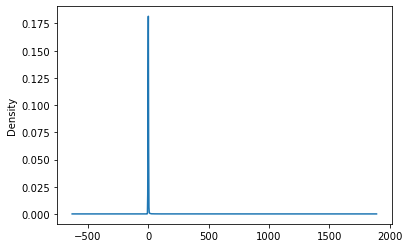

In [5]:
# Visualize the value counts of APPLICATION_TYPE
name_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_name = list(name_counts[name_counts < 10].index)

# Replace in dataframe
for app in replace_name:
    application_df.NAME = application_df.NAME.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                      21022
PARENT BOOSTER USA INC                      1260
TOPS CLUB INC                                765
UNITED STATES BOWLING CONGRESS INC           700
WASHINGTON STATE UNIVERSITY                  492
                                           ...  
CASCADE 4-H FOUNDATION                        10
FREE & ACCEPTED MASONS OF WASHINGTON          10
NEW MEXICO GARDEN CLUBS INC                   10
NATIONAL ASSOCIATION OF HISPANIC NURSES       10
UNION OF CALIFORNIA STATE WORKERS             10
Name: NAME, Length: 223, dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

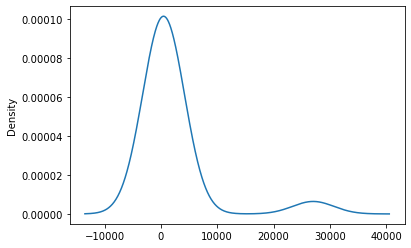

In [8]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type_counts[application_type_counts < 50].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
Other       54
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
calssification_counts = application_df.CLASSIFICATION.value_counts()
calssification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

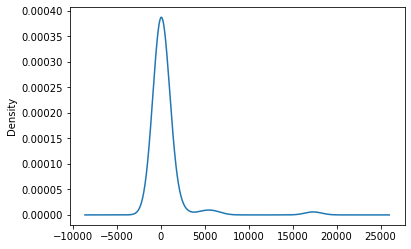

In [11]:
# Visualize the value counts of CLASSIFICATION
calssification_counts.plot.density()

In [12]:
# Determine which values to replace if counts are less than ..?
replace_class = list(calssification_counts[calssification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

NAME_ACE MENTOR PROGRAM OF AMERICA INC  NAME_AIR FORCE ASSOCIATION  \
0                                     0.0                         0.0   
1                                     0.0                         0.0   
2                                     0.0                         0.0   
3                                     0.0                         0.0   
4                                     0.0                         0.0   

   NAME_ALABAMA FEDERATION OF WOMENS CLUBS  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   NAME_ALABAMA TREASURE FOREST ASSOCIATION  NAME_ALPHA PHI SIGMA  \
0                                       0.0                   0.0   
1                                       0.0                   0.0   
2                                       0.0                   0.0   
3                                       0.0                   0.0   
4                                       0.0                   0.0   

   NAME_ALPHA PHI SIGMA INC  NAME_ALTRUSA INTERNATIONAL FOUNDATION INC  \
0                       0.0                                        0.0   
1                       0.0                                        0.0   
2                       0.0                                        0.0   
3                       0.0                                        0.0   
4                       0.0                                        0.0   

   NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   NAME_AMERICAN ART THERAPY ASSOCIATION INC  ...  INCOME_AMT_1-9999  \
0                                        0.0  ...                0.0   
1                                        0.0  ...                1.0   
2                                        0.0  ...                0.0   
3                                        0.0  ...                0.0   
4                                        0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 266 columns

In [15]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\claud\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


STATUS  ASK_AMT  IS_SUCCESSFUL  NAME_ACE MENTOR PROGRAM OF AMERICA INC  \
0       1     5000              1                                     0.0   
1       1   108590              1                                     0.0   
2       1     5000              0                                     0.0   
3       1     6692              1                                     0.0   
4       1   142590              1                                     0.0   

   NAME_AIR FORCE ASSOCIATION  NAME_ALABAMA FEDERATION OF WOMENS CLUBS  \
0                         0.0                                      0.0   
1                         0.0                                      0.0   
2                         0.0                                      0.0   
3                         0.0                                      0.0   
4                         0.0                                      0.0   

   NAME_ALABAMA TREASURE FOREST ASSOCIATION  NAME_ALPHA PHI SIGMA  \
0                                       0.0                   0.0   
1                                       0.0                   0.0   
2                                       0.0                   0.0   
3                                       0.0                   0.0   
4                                       0.0                   0.0   

   NAME_ALPHA PHI SIGMA INC  NAME_ALTRUSA INTERNATIONAL FOUNDATION INC  ...  \
0                       0.0                                        0.0  ...   
1                       0.0                                        0.0  ...   
2                       0.0                                        0.0  ...   
3                       0.0                                        0.0  ...   
4                       0.0                                        0.0  ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 269 columns]

In [16]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\claud\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Deliverable 2: Compile, Train, and Evaluate the Model

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 40
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                21520     
_________________________________________________________________
dense_1 (Dense)              (None, 40)                3240      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 24,801
Trainable params: 24,801
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
# Syntax for saving every 5 epochs found at: 
#https://towardsdatascience.com/checkpointing-deep-learning-models-in-keras-a652570b8de6
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [21]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100

Epoch 00001: saving model to checkpoints/weights.01.hdf5
   32/25724 [..............................] - ETA: 4:04 - loss: 0.8077 - acc: 0.5625
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
  160/25724 [..............................] - ETA: 58s - loss: 0.7111 - acc: 0.6125 
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
  256/25724 [..............................] - ETA: 41s - loss: 0.6756 - acc: 0.6523
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
  384/25724 [.........................

 3136/25724 [==>...........................] - ETA: 14s - loss: 0.5815 - acc: 0.7251
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3232/25724 [==>...........................] - ETA: 13s - loss: 0.5782 - acc: 0.7259
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3328/25724 [==>...........................] - ETA: 13s - loss: 0.5753 - acc: 0.7272
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3424/25724 [==>...........................] - ETA: 13s - loss: 0.5733 - acc: 0.7275
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model


Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6304/25724 [======>.......................] - ETA: 11s - loss: 0.5245 - acc: 0.7513
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6432/25724 [======>.......................] - ETA: 11s - loss: 0.5233 - acc: 0.7516
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6528/25724 [======>.......................] - ETA: 11s - loss: 0.5232 - acc: 0.7508
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6624/25724 [======>.......................] - ETA: 

 9408/25724 [=========>....................] - ETA: 9s - loss: 0.5104 - acc: 0.7571
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 9504/25724 [==========>...................] - ETA: 9s - loss: 0.5108 - acc: 0.7570
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 9600/25724 [==========>...................] - ETA: 9s - loss: 0.5101 - acc: 0.7572
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 9728/25724 [==========>...................] - ETA: 9s - loss: 0.5088 - acc: 0.7577
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to 


Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
12640/25724 [=============>................] - ETA: 7s - loss: 0.5000 - acc: 0.7620
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
12736/25724 [=============>................] - ETA: 7s - loss: 0.5002 - acc: 0.7617
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
12832/25724 [=============>................] - ETA: 7s - loss: 0.5001 - acc: 0.7616
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
12928/25724 [==============>...............] - ETA: 7s - loss: 0.4998 - acc: 0.7617
Epoch 00001: saving model to 


Epoch 00001: saving model to checkpoints/weights.01.hdf5
15808/25724 [=================>............] - ETA: 5s - loss: 0.4904 - acc: 0.7663
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
15904/25724 [=================>............] - ETA: 5s - loss: 0.4906 - acc: 0.7664
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
16032/25724 [=================>............] - ETA: 5s - loss: 0.4906 - acc: 0.7662
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
16160/25724 [=================>............] - ETA: 5s 

18976/25724 [=====================>........] - ETA: 3s - loss: 0.4851 - acc: 0.7678
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
19104/25724 [=====================>........] - ETA: 3s - loss: 0.4859 - acc: 0.7672
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
19232/25724 [=====================>........] - ETA: 3s - loss: 0.4854 - acc: 0.7675
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
19328/25724 [=====================>........] - ETA: 3s - loss: 0.4849 - acc: 0.7678
Epoch 00001: saving model to 

22240/25724 [========================>.....] - ETA: 1s - loss: 0.4802 - acc: 0.7696
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
22368/25724 [=========================>....] - ETA: 1s - loss: 0.4798 - acc: 0.7700
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
22464/25724 [=========================>....] - ETA: 1s - loss: 0.4799 - acc: 0.7700
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
22592/25724 [=========================>....] - ETA: 1s - loss: 0.4798 - acc: 0.7700
Epoch 00001: saving model to 


Epoch 00001: saving model to checkpoints/weights.01.hdf5
25472/25724 [============================>.] - ETA: 0s - loss: 0.4764 - acc: 0.7717
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
25568/25724 [============================>.] - ETA: 0s - loss: 0.4761 - acc: 0.7719
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
25696/25724 [============================>.] - ETA: 0s - loss: 0.4766 - acc: 0.7713
Epoch 00001: saving model to checkpoints/weights.01.hdf5
25724/25724 [==============================] - 14s 553us/sample - loss: 0.4767 - acc: 0.7712
Epoch 2/100

Epoch 00002: saving model to checkpoints/weights.02.hdf5
   32/25724 [..............................] - ETA: 12s - loss: 0.

 2848/25724 [==>...........................] - ETA: 11s - loss: 0.4345 - acc: 0.7904
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 2976/25724 [==>...........................] - ETA: 11s - loss: 0.4333 - acc: 0.7913
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 3072/25724 [==>...........................] - ETA: 11s - loss: 0.4315 - acc: 0.7933
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 3168/25724 [==>...........................] - ETA: 11s - loss: 0.4344 - acc: 0.7932
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model


Epoch 00002: saving model to checkpoints/weights.02.hdf5
 6080/25724 [======>.......................] - ETA: 10s - loss: 0.4391 - acc: 0.7933
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 6176/25724 [======>.......................] - ETA: 10s - loss: 0.4402 - acc: 0.7927
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 6304/25724 [======>.......................] - ETA: 10s - loss: 0.4386 - acc: 0.7933
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 6432/25724 [======>.......................] - ETA: 

 9280/25724 [=========>....................] - ETA: 8s - loss: 0.4403 - acc: 0.7904
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 9376/25724 [=========>....................] - ETA: 8s - loss: 0.4393 - acc: 0.7911
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 9472/25724 [==========>...................] - ETA: 8s - loss: 0.4389 - acc: 0.7915
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 9600/25724 [==========>...................] - ETA: 8s - loss: 0.4391 - acc: 0.7914
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to 


Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
12544/25724 [=============>................] - ETA: 6s - loss: 0.4430 - acc: 0.7846
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
12672/25724 [=============>................] - ETA: 6s - loss: 0.4427 - acc: 0.7848
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
12800/25724 [=============>................] - ETA: 6s - loss: 0.4432 - acc: 0.7845
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hd

15808/25724 [=================>............] - ETA: 5s - loss: 0.4436 - acc: 0.7823
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
15936/25724 [=================>............] - ETA: 5s - loss: 0.4439 - acc: 0.7823
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
16064/25724 [=================>............] - ETA: 4s - loss: 0.4442 - acc: 0.7823
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
16192/25724 [=================>............] - ETA: 4s 

19072/25724 [=====================>........] - ETA: 3s - loss: 0.4449 - acc: 0.7821
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
19200/25724 [=====================>........] - ETA: 3s - loss: 0.4452 - acc: 0.7820
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
19328/25724 [=====================>........] - ETA: 3s - loss: 0.4455 - acc: 0.7820
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
19424/25724 [=====================>........] - ETA: 3s - loss: 0.4455 - acc: 0.7819
Epoch 00002: saving model to 


Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
22336/25724 [=========================>....] - ETA: 1s - loss: 0.4444 - acc: 0.7823
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
22432/25724 [=========================>....] - ETA: 1s - loss: 0.4442 - acc: 0.7824
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
22528/25724 [=========================>....] - ETA: 1s - loss: 0.4441 - acc: 0.7824
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
22656/25724 [=========================>....] - ETA: 1s 


Epoch 00002: saving model to checkpoints/weights.02.hdf5
25472/25724 [============================>.] - ETA: 0s - loss: 0.4459 - acc: 0.7820
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
25568/25724 [============================>.] - ETA: 0s - loss: 0.4460 - acc: 0.7818
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
25696/25724 [============================>.] - ETA: 0s - loss: 0.4460 - acc: 0.7818
Epoch 00002: saving model to checkpoints/weights.02.hdf5
25724/25724 [==============================] - 13s 517us/sample - loss: 0.4462 - acc: 0.7818
Epoch 3/100

Epoch 00003: saving model to checkpoints/weights.03.hdf5
   32/25724 [..............................] - ETA: 15s - loss: 0.

 2848/25724 [==>...........................] - ETA: 12s - loss: 0.4341 - acc: 0.7886
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 2944/25724 [==>...........................] - ETA: 12s - loss: 0.4349 - acc: 0.7870
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 3040/25724 [==>...........................] - ETA: 12s - loss: 0.4365 - acc: 0.7855
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 3168/25724 [==>...........................] - ETA: 11s - loss: 0.4378 - acc: 0.7857
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model

 6048/25724 [======>.......................] - ETA: 10s - loss: 0.4362 - acc: 0.7867
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 6176/25724 [======>.......................] - ETA: 10s - loss: 0.4355 - acc: 0.7868
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 6272/25724 [======>.......................] - ETA: 10s - loss: 0.4364 - acc: 0.7862
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 6400/25724 [======>.......................] - ETA: 10s - loss: 0.4358 - acc: 0.7867
Epoch 00003: saving model

 9248/25724 [=========>....................] - ETA: 8s - loss: 0.4391 - acc: 0.7838
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9376/25724 [=========>....................] - ETA: 8s - loss: 0.4388 - acc: 0.7841
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9504/25724 [==========>...................] - ETA: 8s - loss: 0.4397 - acc: 0.7834
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9600/25724 [==========>...................] - ETA: 8s - loss: 0.4384 - acc: 0.7844
Epoch 00003: saving model to 

12384/25724 [=============>................] - ETA: 7s - loss: 0.4393 - acc: 0.7856
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
12512/25724 [=============>................] - ETA: 7s - loss: 0.4394 - acc: 0.7857
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
12640/25724 [=============>................] - ETA: 7s - loss: 0.4391 - acc: 0.7863
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
12768/25724 [=============>................] - ETA: 6s 

15616/25724 [=================>............] - ETA: 5s - loss: 0.4397 - acc: 0.7869
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
15744/25724 [=================>............] - ETA: 5s - loss: 0.4396 - acc: 0.7870
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
15840/25724 [=================>............] - ETA: 5s - loss: 0.4395 - acc: 0.7871
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
15936/25724 [=================>............] - ETA: 5s - loss: 0.4395 - acc: 0.7870
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to 

18720/25724 [====================>.........] - ETA: 3s - loss: 0.4408 - acc: 0.7860
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
18816/25724 [====================>.........] - ETA: 3s - loss: 0.4408 - acc: 0.7859
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
18912/25724 [=====================>........] - ETA: 3s - loss: 0.4411 - acc: 0.7859
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
19040/25724 [=====================>........] - ETA: 3s - loss: 0.4412 - acc: 0.7859
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to 


Epoch 00003: saving model to checkpoints/weights.03.hdf5
21984/25724 [========================>.....] - ETA: 2s - loss: 0.4422 - acc: 0.7860
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
22080/25724 [========================>.....] - ETA: 1s - loss: 0.4427 - acc: 0.7855
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
22208/25724 [========================>.....] - ETA: 1s - loss: 0.4424 - acc: 0.7856
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
22336/25724 [=========================>....] - ETA: 1s 

25120/25724 [============================>.] - ETA: 0s - loss: 0.4427 - acc: 0.7851
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.4427 - acc: 0.7850
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
25376/25724 [============================>.] - ETA: 0s - loss: 0.4429 - acc: 0.7851
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
25504/25724 [============================>.] - ETA: 0s 

 2528/25724 [=>............................] - ETA: 12s - loss: 0.4264 - acc: 0.7935
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 2656/25724 [==>...........................] - ETA: 12s - loss: 0.4253 - acc: 0.7952
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 2784/25724 [==>...........................] - ETA: 12s - loss: 0.4242 - acc: 0.7971
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 2912/25724 [==>...........................] - ETA: 


Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 5856/25724 [=====>........................] - ETA: 10s - loss: 0.4310 - acc: 0.7942
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 5984/25724 [=====>........................] - ETA: 10s - loss: 0.4298 - acc: 0.7946
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 6112/25724 [======>.......................] - ETA: 10s - loss: 0.4303 - acc: 0.7945
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04


Epoch 00004: saving model to checkpoints/weights.04.hdf5
 9088/25724 [=========>....................] - ETA: 8s - loss: 0.4319 - acc: 0.7943
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 9216/25724 [=========>....................] - ETA: 8s - loss: 0.4324 - acc: 0.7941
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 9344/25724 [=========>....................] - ETA: 8s - loss: 0.4318 - acc: 0.7947
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 9440/25724 [==========>...................] - ETA: 8s 

12320/25724 [=============>................] - ETA: 6s - loss: 0.4361 - acc: 0.7898
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
12448/25724 [=============>................] - ETA: 6s - loss: 0.4361 - acc: 0.7896
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
12576/25724 [=============>................] - ETA: 6s - loss: 0.4355 - acc: 0.7901
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
12704/25724 [=============>................] - ETA: 6s 


Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
15680/25724 [=================>............] - ETA: 5s - loss: 0.4382 - acc: 0.7883
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
15808/25724 [=================>............] - ETA: 5s - loss: 0.4380 - acc: 0.7886
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
15904/25724 [=================>............] - ETA: 5s - loss: 0.4377 - acc: 0.7888
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hd


Epoch 00004: saving model to checkpoints/weights.04.hdf5
18912/25724 [=====================>........] - ETA: 3s - loss: 0.4389 - acc: 0.7882
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
19040/25724 [=====================>........] - ETA: 3s - loss: 0.4389 - acc: 0.7880
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
19136/25724 [=====================>........] - ETA: 3s - loss: 0.4389 - acc: 0.7879
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
19264/25724 [=====================>........] - ETA: 3s 

22144/25724 [========================>.....] - ETA: 1s - loss: 0.4402 - acc: 0.7872
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
22240/25724 [========================>.....] - ETA: 1s - loss: 0.4403 - acc: 0.7871
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
22368/25724 [=========================>....] - ETA: 1s - loss: 0.4402 - acc: 0.7875
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
22496/25724 [=========================>....] - ETA: 1s - loss: 0.4399 - acc: 0.7877
Epoch 00004: saving model to 


Epoch 00004: saving model to checkpoints/weights.04.hdf5
25376/25724 [============================>.] - ETA: 0s - loss: 0.4395 - acc: 0.7877
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
25504/25724 [============================>.] - ETA: 0s - loss: 0.4396 - acc: 0.7876
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
25600/25724 [============================>.] - ETA: 0s - loss: 0.4395 - acc: 0.7875
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
25724/25724 [==============================] - 13s 515u


Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 2848/25724 [==>...........................] - ETA: 11s - loss: 0.4312 - acc: 0.7855
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 2976/25724 [==>...........................] - ETA: 11s - loss: 0.4280 - acc: 0.7890
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 3104/25724 [==>...........................] - ETA: 11s - loss: 0.4284 - acc: 0.7903
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05


Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 6112/25724 [======>.......................] - ETA: 9s - loss: 0.4415 - acc: 0.7842 
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 6240/25724 [======>.......................] - ETA: 9s - loss: 0.4424 - acc: 0.7845
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 6336/25724 [======>.......................] - ETA: 9s - loss: 0.4418 - acc: 0.7850
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.h

 9280/25724 [=========>....................] - ETA: 8s - loss: 0.4383 - acc: 0.7884
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 9376/25724 [=========>....................] - ETA: 8s - loss: 0.4384 - acc: 0.7884
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 9472/25724 [==========>...................] - ETA: 8s - loss: 0.4383 - acc: 0.7880
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 9600/25724 [==========>...................] - ETA: 8s - loss: 0.4377 - acc: 0.7886
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to 

12480/25724 [=============>................] - ETA: 6s - loss: 0.4381 - acc: 0.7884
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
12608/25724 [=============>................] - ETA: 6s - loss: 0.4380 - acc: 0.7887
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
12704/25724 [=============>................] - ETA: 6s - loss: 0.4378 - acc: 0.7891
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
12800/25724 [=============>................] - ETA: 6s - loss: 0.4373 - acc: 0.7894
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to 


Epoch 00005: saving model to checkpoints/weights.05.hdf5
15744/25724 [=================>............] - ETA: 5s - loss: 0.4361 - acc: 0.7887
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
15840/25724 [=================>............] - ETA: 5s - loss: 0.4364 - acc: 0.7882
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
15968/25724 [=================>............] - ETA: 5s - loss: 0.4363 - acc: 0.7884
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
16096/25724 [=================>............] - ETA: 4s 

18976/25724 [=====================>........] - ETA: 3s - loss: 0.4368 - acc: 0.7881
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
19104/25724 [=====================>........] - ETA: 3s - loss: 0.4369 - acc: 0.7878
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
19200/25724 [=====================>........] - ETA: 3s - loss: 0.4370 - acc: 0.7876
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
19328/25724 [=====================>........] - ETA: 3s - loss: 0.4379 - acc: 0.7871
Epoch 00005: saving model to 

22176/25724 [========================>.....] - ETA: 1s - loss: 0.4376 - acc: 0.7878
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
22304/25724 [=========================>....] - ETA: 1s - loss: 0.4376 - acc: 0.7878
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
22432/25724 [=========================>....] - ETA: 1s - loss: 0.4376 - acc: 0.7879
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
22560/25724 [=========================>....] - ETA: 1s 

25440/25724 [============================>.] - ETA: 0s - loss: 0.4389 - acc: 0.7871
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
25568/25724 [============================>.] - ETA: 0s - loss: 0.4390 - acc: 0.7872
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
25664/25724 [============================>.] - ETA: 0s - loss: 0.4391 - acc: 0.7871
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
25724/25724 [==============================] - 13s 512us/sample - loss: 0.4389 - acc: 0.7872
Epoch 6/100

Epoch 00006: saving model to checkpoints/weights.06.hdf5
   32/25724 [..............................] - ETA: 16s - loss: 0.


Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 2944/25724 [==>...........................] - ETA: 11s - loss: 0.4354 - acc: 0.7880
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 3072/25724 [==>...........................] - ETA: 11s - loss: 0.4329 - acc: 0.7913
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 3168/25724 [==>...........................] - ETA: 11s - loss: 0.4319 - acc: 0.7920
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06

 6144/25724 [======>.......................] - ETA: 10s - loss: 0.4401 - acc: 0.7882
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 6240/25724 [======>.......................] - ETA: 10s - loss: 0.4395 - acc: 0.7885
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 6368/25724 [======>.......................] - ETA: 10s - loss: 0.4398 - acc: 0.7875
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 6464/25724 [======>.......................] - ETA: 10s - loss: 0.4406 - acc: 0.7868
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model

 9312/25724 [=========>....................] - ETA: 8s - loss: 0.4358 - acc: 0.7880
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 9440/25724 [==========>...................] - ETA: 8s - loss: 0.4352 - acc: 0.7886
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 9536/25724 [==========>...................] - ETA: 8s - loss: 0.4350 - acc: 0.7886
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 9664/25724 [==========>...................] - ETA: 8s - loss: 0.4345 - acc: 0.7884
Epoch 00006: saving model to 


Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
12576/25724 [=============>................] - ETA: 6s - loss: 0.4335 - acc: 0.7893
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
12672/25724 [=============>................] - ETA: 6s - loss: 0.4334 - acc: 0.7895
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
12800/25724 [=============>................] - ETA: 6s - loss: 0.4334 - acc: 0.7893
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hd

15776/25724 [=================>............] - ETA: 5s - loss: 0.4329 - acc: 0.7900
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
15872/25724 [=================>............] - ETA: 5s - loss: 0.4326 - acc: 0.7901
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
15968/25724 [=================>............] - ETA: 5s - loss: 0.4321 - acc: 0.7904
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
16096/25724 [=================>............] - ETA: 5s - loss: 0.4320 - acc: 0.7903
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to 

18976/25724 [=====================>........] - ETA: 3s - loss: 0.4351 - acc: 0.7884
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
19072/25724 [=====================>........] - ETA: 3s - loss: 0.4354 - acc: 0.7882
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
19168/25724 [=====================>........] - ETA: 3s - loss: 0.4357 - acc: 0.7881
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
19264/25724 [=====================>........] - ETA: 3s - loss: 0.4359 - acc: 0.7878
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to 


Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
22240/25724 [========================>.....] - ETA: 1s - loss: 0.4363 - acc: 0.7877
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
22368/25724 [=========================>....] - ETA: 1s - loss: 0.4363 - acc: 0.7879
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
22464/25724 [=========================>....] - ETA: 1s - loss: 0.4364 - acc: 0.7878
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
22560/25724 [=========================>....] - ETA: 1s 

25376/25724 [============================>.] - ETA: 0s - loss: 0.4369 - acc: 0.7870
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
25504/25724 [============================>.] - ETA: 0s - loss: 0.4371 - acc: 0.7870
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
25600/25724 [============================>.] - ETA: 0s - loss: 0.4370 - acc: 0.7871
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
25696/25724 [============================>.] - ETA: 0s - loss: 0.4370 - acc: 0.7871
Epoch 00006: saving model to checkpoints/weights.06.hdf5
25724/25724 [=================

 2752/25724 [==>...........................] - ETA: 12s - loss: 0.4245 - acc: 0.7954
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 2880/25724 [==>...........................] - ETA: 11s - loss: 0.4220 - acc: 0.7986
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 2976/25724 [==>...........................] - ETA: 11s - loss: 0.4209 - acc: 0.7994
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 3104/25724 [==>...........................] - ETA: 11s - loss: 0.4212 - acc: 0.7986
Epoch 00007: saving model


Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 6048/25724 [======>.......................] - ETA: 10s - loss: 0.4216 - acc: 0.7989
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 6144/25724 [======>.......................] - ETA: 10s - loss: 0.4218 - acc: 0.7987
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 6272/25724 [======>.......................] - ETA: 10s - loss: 0.4213 - acc: 0.7983
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07


Epoch 00007: saving model to checkpoints/weights.07.hdf5
 9184/25724 [=========>....................] - ETA: 8s - loss: 0.4211 - acc: 0.7978
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 9312/25724 [=========>....................] - ETA: 8s - loss: 0.4213 - acc: 0.7975
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 9408/25724 [=========>....................] - ETA: 8s - loss: 0.4218 - acc: 0.7974
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 9504/25724 [==========>...................] - ETA: 8s - loss: 0.4220 - acc: 0.7972
Epoch 00007: saving model to 


Epoch 00007: saving model to checkpoints/weights.07.hdf5
12448/25724 [=============>................] - ETA: 6s - loss: 0.4280 - acc: 0.7927
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
12544/25724 [=============>................] - ETA: 6s - loss: 0.4278 - acc: 0.7927
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
12640/25724 [=============>................] - ETA: 6s - loss: 0.4285 - acc: 0.7922
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
12736/25724 [=============>................] - ETA: 6s - loss: 0.4287 - acc: 0.7918
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to 

15584/25724 [=================>............] - ETA: 5s - loss: 0.4323 - acc: 0.7909
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
15712/25724 [=================>............] - ETA: 5s - loss: 0.4326 - acc: 0.7905
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
15808/25724 [=================>............] - ETA: 5s - loss: 0.4320 - acc: 0.7909
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
15904/25724 [=================>............] - ETA: 5s - loss: 0.4322 - acc: 0.7908
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to 

18816/25724 [====================>.........] - ETA: 3s - loss: 0.4334 - acc: 0.7899
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
18912/25724 [=====================>........] - ETA: 3s - loss: 0.4334 - acc: 0.7897
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
19008/25724 [=====================>........] - ETA: 3s - loss: 0.4333 - acc: 0.7896
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
19104/25724 [=====================>........] - ETA: 3s - loss: 0.4336 - acc: 0.7892
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to 


Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
22112/25724 [========================>.....] - ETA: 1s - loss: 0.4345 - acc: 0.7885
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
22208/25724 [========================>.....] - ETA: 1s - loss: 0.4346 - acc: 0.7884
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
22336/25724 [=========================>....] - ETA: 1s - loss: 0.4342 - acc: 0.7887
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hd


Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
25280/25724 [============================>.] - ETA: 0s - loss: 0.4358 - acc: 0.7884
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
25408/25724 [============================>.] - ETA: 0s - loss: 0.4359 - acc: 0.7885
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
25504/25724 [============================>.] - ETA: 0s - loss: 0.4358 - acc: 0.7884
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hd

 2688/25724 [==>...........................] - ETA: 12s - loss: 0.4240 - acc: 0.7939
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 2784/25724 [==>...........................] - ETA: 11s - loss: 0.4234 - acc: 0.7931
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 2912/25724 [==>...........................] - ETA: 11s - loss: 0.4233 - acc: 0.7946
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 3040/25724 [==>...........................] - ETA: 11s - loss: 0.4276 - acc: 0.7914
Epoch 00008: saving model

 5920/25724 [=====>........................] - ETA: 10s - loss: 0.4296 - acc: 0.7943
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 6016/25724 [======>.......................] - ETA: 10s - loss: 0.4294 - acc: 0.7942
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 6112/25724 [======>.......................] - ETA: 10s - loss: 0.4296 - acc: 0.7937
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 6208/25724 [======>.......................] - ETA: 10s - loss: 0.4304 - acc: 0.7935
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model


Epoch 00008: saving model to checkpoints/weights.08.hdf5
 9184/25724 [=========>....................] - ETA: 8s - loss: 0.4328 - acc: 0.7908
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 9280/25724 [=========>....................] - ETA: 8s - loss: 0.4326 - acc: 0.7909
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 9376/25724 [=========>....................] - ETA: 8s - loss: 0.4330 - acc: 0.7907
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 9504/25724 [==========>...................] - ETA: 8s - loss: 0.4326 - acc: 0.7910
Epoch 00008: saving model to 

12384/25724 [=============>................] - ETA: 6s - loss: 0.4348 - acc: 0.7888
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
12480/25724 [=============>................] - ETA: 6s - loss: 0.4347 - acc: 0.7889
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
12608/25724 [=============>................] - ETA: 6s - loss: 0.4343 - acc: 0.7889
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
12736/25724 [=============>................] - ETA: 6s - loss: 0.4345 - acc: 0.7886
Epoch 00008: saving model to 

15648/25724 [=================>............] - ETA: 5s - loss: 0.4333 - acc: 0.7894
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
15776/25724 [=================>............] - ETA: 5s - loss: 0.4337 - acc: 0.7890
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
15904/25724 [=================>............] - ETA: 5s - loss: 0.4344 - acc: 0.7887
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
16032/25724 [=================>............] - ETA: 5s 

18848/25724 [====================>.........] - ETA: 3s - loss: 0.4363 - acc: 0.7875
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
18944/25724 [=====================>........] - ETA: 3s - loss: 0.4362 - acc: 0.7875
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
19040/25724 [=====================>........] - ETA: 3s - loss: 0.4363 - acc: 0.7874
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
19136/25724 [=====================>........] - ETA: 3s - loss: 0.4360 - acc: 0.7878
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to 


Epoch 00008: saving model to checkpoints/weights.08.hdf5
22112/25724 [========================>.....] - ETA: 1s - loss: 0.4354 - acc: 0.7884
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
22208/25724 [========================>.....] - ETA: 1s - loss: 0.4356 - acc: 0.7884
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
22304/25724 [=========================>....] - ETA: 1s - loss: 0.4352 - acc: 0.7888
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
22432/25724 [=========================>....] - ETA: 1s - loss: 0.4352 - acc: 0.7889
Epoch 00008: saving model to 


Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
25312/25724 [============================>.] - ETA: 0s - loss: 0.4352 - acc: 0.7888
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
25440/25724 [============================>.] - ETA: 0s - loss: 0.4349 - acc: 0.7888
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
25536/25724 [============================>.] - ETA: 0s - loss: 0.4349 - acc: 0.7889
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hd

 2656/25724 [==>...........................] - ETA: 12s - loss: 0.4207 - acc: 0.7993
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 2752/25724 [==>...........................] - ETA: 12s - loss: 0.4218 - acc: 0.7983
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 2880/25724 [==>...........................] - ETA: 11s - loss: 0.4231 - acc: 0.7972
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 3008/25724 [==>...........................] - ETA: 11s - loss: 0.4207 - acc: 0.7989
Epoch 00009: saving model


Epoch 00009: saving model to checkpoints/weights.09.hdf5
 5888/25724 [=====>........................] - ETA: 10s - loss: 0.4233 - acc: 0.7945
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 6016/25724 [======>.......................] - ETA: 10s - loss: 0.4234 - acc: 0.7939
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 6144/25724 [======>.......................] - ETA: 10s - loss: 0.4244 - acc: 0.7936
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 6240/25724 [======>.......................] - ETA: 

 9088/25724 [=========>....................] - ETA: 8s - loss: 0.4288 - acc: 0.7909
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 9216/25724 [=========>....................] - ETA: 8s - loss: 0.4287 - acc: 0.7916
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 9312/25724 [=========>....................] - ETA: 8s - loss: 0.4286 - acc: 0.7917
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 9440/25724 [==========>...................] - ETA: 8s - loss: 0.4276 - acc: 0.7924
Epoch 00009: saving model to 

12256/25724 [=============>................] - ETA: 7s - loss: 0.4340 - acc: 0.7893
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
12384/25724 [=============>................] - ETA: 6s - loss: 0.4338 - acc: 0.7898
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
12480/25724 [=============>................] - ETA: 6s - loss: 0.4333 - acc: 0.7901
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
12576/25724 [=============>................] - ETA: 6s - loss: 0.4335 - acc: 0.7900
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to 


Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
15520/25724 [=================>............] - ETA: 5s - loss: 0.4325 - acc: 0.7910
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
15616/25724 [=================>............] - ETA: 5s - loss: 0.4330 - acc: 0.7905
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
15712/25724 [=================>............] - ETA: 5s - loss: 0.4335 - acc: 0.7900
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
15808/25724 [=================>............] - ETA: 5s 


Epoch 00009: saving model to checkpoints/weights.09.hdf5
18624/25724 [====================>.........] - ETA: 3s - loss: 0.4348 - acc: 0.7882
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
18752/25724 [====================>.........] - ETA: 3s - loss: 0.4343 - acc: 0.7884
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
18880/25724 [=====================>........] - ETA: 3s - loss: 0.4342 - acc: 0.7885
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hd

21856/25724 [========================>.....] - ETA: 2s - loss: 0.4336 - acc: 0.7890
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
21952/25724 [========================>.....] - ETA: 1s - loss: 0.4333 - acc: 0.7892
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
22080/25724 [========================>.....] - ETA: 1s - loss: 0.4336 - acc: 0.7889
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
22208/25724 [========================>.....] - ETA: 1s - loss: 0.4336 - acc: 0.7889
Epoch 00009: saving model to 


Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
25088/25724 [============================>.] - ETA: 0s - loss: 0.4344 - acc: 0.7893
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
25184/25724 [============================>.] - ETA: 0s - loss: 0.4342 - acc: 0.7894
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
25312/25724 [============================>.] - ETA: 0s - loss: 0.4342 - acc: 0.7894
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hd


Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 2496/25724 [=>............................] - ETA: 12s - loss: 0.4295 - acc: 0.7881
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 2592/25724 [==>...........................] - ETA: 12s - loss: 0.4297 - acc: 0.7886
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 2720/25724 [==>...........................] - ETA: 12s - loss: 0.4309 - acc: 0.7875
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 2816/25724 [==>...........................] - ETA: 

 5632/25724 [=====>........................] - ETA: 10s - loss: 0.4323 - acc: 0.7875
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 5760/25724 [=====>........................] - ETA: 10s - loss: 0.4322 - acc: 0.7872
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 5856/25724 [=====>........................] - ETA: 10s - loss: 0.4323 - acc: 0.7872
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 5984/25724 [=====>........................] - ETA: 10s - loss: 0.4320 - acc: 0.7874
Epoch 00010: saving model


Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 8896/25724 [=========>....................] - ETA: 8s - loss: 0.4312 - acc: 0.7901
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 8992/25724 [=========>....................] - ETA: 8s - loss: 0.4318 - acc: 0.7901
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 9088/25724 [=========>....................] - ETA: 8s - loss: 0.4324 - acc: 0.7895
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 9216/25724 [=========>....................] - ETA: 8s 

12000/25724 [============>.................] - ETA: 7s - loss: 0.4337 - acc: 0.7899
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
12128/25724 [=============>................] - ETA: 7s - loss: 0.4335 - acc: 0.7902
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
12256/25724 [=============>................] - ETA: 7s - loss: 0.4337 - acc: 0.7901
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
12384/25724 [=============>................] - ETA: 7s 

15296/25724 [================>.............] - ETA: 5s - loss: 0.4351 - acc: 0.7893
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
15392/25724 [================>.............] - ETA: 5s - loss: 0.4355 - acc: 0.7888
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
15488/25724 [=================>............] - ETA: 5s - loss: 0.4353 - acc: 0.7889
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
15616/25724 [=================>............] - ETA: 5s - loss: 0.4354 - acc: 0.7889
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to 

18528/25724 [====================>.........] - ETA: 3s - loss: 0.4337 - acc: 0.7897
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
18656/25724 [====================>.........] - ETA: 3s - loss: 0.4338 - acc: 0.7897
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
18784/25724 [====================>.........] - ETA: 3s - loss: 0.4336 - acc: 0.7896
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
18880/25724 [=====================>........] - ETA: 3s - loss: 0.4333 - acc: 0.7899
Epoch 00010: saving model to 

21792/25724 [========================>.....] - ETA: 2s - loss: 0.4342 - acc: 0.7901
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
21920/25724 [========================>.....] - ETA: 1s - loss: 0.4344 - acc: 0.7899
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
22016/25724 [========================>.....] - ETA: 1s - loss: 0.4348 - acc: 0.7897
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
22112/25724 [========================>.....] - ETA: 1s - loss: 0.4350 - acc: 0.7897
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to 

25024/25724 [============================>.] - ETA: 0s - loss: 0.4345 - acc: 0.7901
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 0.4343 - acc: 0.7902
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.4341 - acc: 0.7903
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
25344/25724 [============================>.] - ETA: 0s - loss: 0.4338 - acc: 0.7904
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to 

 2464/25724 [=>............................] - ETA: 11s - loss: 0.4248 - acc: 0.7983
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 2592/25724 [==>...........................] - ETA: 11s - loss: 0.4240 - acc: 0.7982
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 2720/25724 [==>...........................] - ETA: 11s - loss: 0.4238 - acc: 0.7982
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 2816/25724 [==>...........................] - ETA: 11s - loss: 0.4235 - acc: 0.7990
Epoch 00011: saving model


Epoch 00011: saving model to checkpoints/weights.11.hdf5
 5696/25724 [=====>........................] - ETA: 10s - loss: 0.4293 - acc: 0.7971
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 5824/25724 [=====>........................] - ETA: 10s - loss: 0.4304 - acc: 0.7964
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 5920/25724 [=====>........................] - ETA: 10s - loss: 0.4299 - acc: 0.7965
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 6016/25724 [======>.......................] - ETA: 10s - loss: 0.4311 - acc: 0.7967
Epoch 00011: saving model

 8864/25724 [=========>....................] - ETA: 8s - loss: 0.4330 - acc: 0.7915
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 8960/25724 [=========>....................] - ETA: 8s - loss: 0.4329 - acc: 0.7914
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 9088/25724 [=========>....................] - ETA: 8s - loss: 0.4340 - acc: 0.7904
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 9216/25724 [=========>....................] - ETA: 8s - loss: 0.4336 - acc: 0.7911
Epoch 00011: saving model to 


Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
12160/25724 [=============>................] - ETA: 7s - loss: 0.4353 - acc: 0.7905
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
12288/25724 [=============>................] - ETA: 6s - loss: 0.4350 - acc: 0.7906
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
12384/25724 [=============>................] - ETA: 6s - loss: 0.4348 - acc: 0.7905
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hd

15328/25724 [================>.............] - ETA: 5s - loss: 0.4348 - acc: 0.7918
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
15456/25724 [=================>............] - ETA: 5s - loss: 0.4345 - acc: 0.7917
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
15584/25724 [=================>............] - ETA: 5s - loss: 0.4348 - acc: 0.7916
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
15680/25724 [=================>............] - ETA: 5s - loss: 0.4342 - acc: 0.7917
Epoch 00011: saving model to 

18528/25724 [====================>.........] - ETA: 3s - loss: 0.4342 - acc: 0.7911
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
18624/25724 [====================>.........] - ETA: 3s - loss: 0.4341 - acc: 0.7913
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
18720/25724 [====================>.........] - ETA: 3s - loss: 0.4339 - acc: 0.7915
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
18816/25724 [====================>.........] - ETA: 3s - loss: 0.4334 - acc: 0.7915
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to 

21760/25724 [========================>.....] - ETA: 2s - loss: 0.4330 - acc: 0.7911
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
21856/25724 [========================>.....] - ETA: 2s - loss: 0.4332 - acc: 0.7910
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
21984/25724 [========================>.....] - ETA: 1s - loss: 0.4336 - acc: 0.7907
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
22080/25724 [========================>.....] - ETA: 1s - loss: 0.4335 - acc: 0.7906
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to 

24928/25724 [============================>.] - ETA: 0s - loss: 0.4335 - acc: 0.7916
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.4334 - acc: 0.7916
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 0.4334 - acc: 0.7917
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.4331 - acc: 0.7919
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to 


Epoch 00012: saving model to checkpoints/weights.12.hdf5
 2368/25724 [=>............................] - ETA: 12s - loss: 0.4316 - acc: 0.7880
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 2496/25724 [=>............................] - ETA: 12s - loss: 0.4327 - acc: 0.7861
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 2624/25724 [==>...........................] - ETA: 12s - loss: 0.4329 - acc: 0.7862
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12

 5568/25724 [=====>........................] - ETA: 10s - loss: 0.4293 - acc: 0.7935
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 5696/25724 [=====>........................] - ETA: 10s - loss: 0.4299 - acc: 0.7928
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 5824/25724 [=====>........................] - ETA: 10s - loss: 0.4304 - acc: 0.7921
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 5952/25724 [=====>........................] - ETA: 


Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 8896/25724 [=========>....................] - ETA: 8s - loss: 0.4305 - acc: 0.7902
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 9024/25724 [=========>....................] - ETA: 8s - loss: 0.4313 - acc: 0.7898
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 9152/25724 [=========>....................] - ETA: 8s - loss: 0.4308 - acc: 0.7903
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hd

12032/25724 [=============>................] - ETA: 7s - loss: 0.4295 - acc: 0.7928
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
12128/25724 [=============>................] - ETA: 7s - loss: 0.4304 - acc: 0.7925
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
12256/25724 [=============>................] - ETA: 6s - loss: 0.4300 - acc: 0.7923
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
12352/25724 [=============>................] - ETA: 6s - loss: 0.4301 - acc: 0.7924
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to 

15232/25724 [================>.............] - ETA: 5s - loss: 0.4313 - acc: 0.7915
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
15360/25724 [================>.............] - ETA: 5s - loss: 0.4316 - acc: 0.7910
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
15488/25724 [=================>............] - ETA: 5s - loss: 0.4316 - acc: 0.7909
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
15584/25724 [=================>............] - ETA: 5s - loss: 0.4313 - acc: 0.7910
Epoch 00012: saving model to 

18464/25724 [====================>.........] - ETA: 3s - loss: 0.4307 - acc: 0.7916
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
18560/25724 [====================>.........] - ETA: 3s - loss: 0.4306 - acc: 0.7916
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
18656/25724 [====================>.........] - ETA: 3s - loss: 0.4307 - acc: 0.7915
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
18784/25724 [====================>.........] - ETA: 3s - loss: 0.4307 - acc: 0.7916
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to 

21696/25724 [========================>.....] - ETA: 2s - loss: 0.4325 - acc: 0.7905
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
21824/25724 [========================>.....] - ETA: 2s - loss: 0.4324 - acc: 0.7906
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
21952/25724 [========================>.....] - ETA: 1s - loss: 0.4327 - acc: 0.7905
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
22048/25724 [========================>.....] - ETA: 1s - loss: 0.4326 - acc: 0.7905
Epoch 00012: saving model to 

24928/25724 [============================>.] - ETA: 0s - loss: 0.4325 - acc: 0.7906
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.4326 - acc: 0.7904
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 0.4325 - acc: 0.7904
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
25280/25724 [============================>.] - ETA: 0s - loss: 0.4327 - acc: 0.7905
Epoch 00012: saving model to 


Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 2400/25724 [=>............................] - ETA: 12s - loss: 0.4300 - acc: 0.7871
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 2496/25724 [=>............................] - ETA: 12s - loss: 0.4293 - acc: 0.7889
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 2592/25724 [==>...........................] - ETA: 12s - loss: 0.4316 - acc: 0.7874
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 2688/25724 [==>...........................] - ETA: 12s - loss: 0.4279 - acc: 0.7902
Epoch 00013: saving model

 5536/25724 [=====>........................] - ETA: 10s - loss: 0.4304 - acc: 0.7899
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 5632/25724 [=====>........................] - ETA: 10s - loss: 0.4313 - acc: 0.7889
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 5760/25724 [=====>........................] - ETA: 10s - loss: 0.4310 - acc: 0.7889
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 5888/25724 [=====>........................] - ETA: 10s - loss: 0.4310 - acc: 0.7892
Epoch 00013: saving model

 8768/25724 [=========>....................] - ETA: 8s - loss: 0.4325 - acc: 0.7914
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 8896/25724 [=========>....................] - ETA: 8s - loss: 0.4315 - acc: 0.7919
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 9024/25724 [=========>....................] - ETA: 8s - loss: 0.4311 - acc: 0.7922
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 9152/25724 [=========>....................] - ETA: 8s 

11968/25724 [============>.................] - ETA: 7s - loss: 0.4310 - acc: 0.7924
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
12064/25724 [=============>................] - ETA: 7s - loss: 0.4309 - acc: 0.7929
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
12192/25724 [=============>................] - ETA: 7s - loss: 0.4308 - acc: 0.7929
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
12320/25724 [=============>................] - ETA: 6s - loss: 0.4313 - acc: 0.7924
Epoch 00013: saving model to 


Epoch 00013: saving model to checkpoints/weights.13.hdf5
15264/25724 [================>.............] - ETA: 5s - loss: 0.4307 - acc: 0.7932
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
15392/25724 [================>.............] - ETA: 5s - loss: 0.4302 - acc: 0.7933
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
15520/25724 [=================>............] - ETA: 5s - loss: 0.4301 - acc: 0.7935
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hd

18496/25724 [====================>.........] - ETA: 3s - loss: 0.4308 - acc: 0.7917
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
18624/25724 [====================>.........] - ETA: 3s - loss: 0.4308 - acc: 0.7917
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
18720/25724 [====================>.........] - ETA: 3s - loss: 0.4311 - acc: 0.7915
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
18848/25724 [====================>.........] - ETA: 3s - loss: 0.4309 - acc: 0.7918
Epoch 00013: saving model to 


Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
21760/25724 [========================>.....] - ETA: 2s - loss: 0.4315 - acc: 0.7914
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
21888/25724 [========================>.....] - ETA: 1s - loss: 0.4316 - acc: 0.7913
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
21984/25724 [========================>.....] - ETA: 1s - loss: 0.4314 - acc: 0.7915
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
22080/25724 [========================>.....] - ETA: 1s 


Epoch 00013: saving model to checkpoints/weights.13.hdf5
24928/25724 [============================>.] - ETA: 0s - loss: 0.4320 - acc: 0.7904
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.4318 - acc: 0.7905
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
25120/25724 [============================>.] - ETA: 0s - loss: 0.4317 - acc: 0.7906
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.4319 - acc: 0.7903
Epoch 00013: saving model to 

 2368/25724 [=>............................] - ETA: 12s - loss: 0.4285 - acc: 0.7969
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 2464/25724 [=>............................] - ETA: 12s - loss: 0.4300 - acc: 0.7963
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 2592/25724 [==>...........................] - ETA: 11s - loss: 0.4291 - acc: 0.7971
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 2688/25724 [==>...........................] - ETA: 11s - loss: 0.4282 - acc: 0.7961
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model


Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 5632/25724 [=====>........................] - ETA: 10s - loss: 0.4277 - acc: 0.7942
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 5760/25724 [=====>........................] - ETA: 10s - loss: 0.4280 - acc: 0.7943
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 5888/25724 [=====>........................] - ETA: 10s - loss: 0.4275 - acc: 0.7948
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14


Epoch 00014: saving model to checkpoints/weights.14.hdf5
 8864/25724 [=========>....................] - ETA: 8s - loss: 0.4245 - acc: 0.7973
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 8960/25724 [=========>....................] - ETA: 8s - loss: 0.4252 - acc: 0.7967
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 9056/25724 [=========>....................] - ETA: 8s - loss: 0.4255 - acc: 0.7965
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 9184/25724 [=========>....................] - ETA: 8s - loss: 0.4251 - acc: 0.7967
Epoch 00014: saving model to 

12032/25724 [=============>................] - ETA: 7s - loss: 0.4268 - acc: 0.7958
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
12128/25724 [=============>................] - ETA: 7s - loss: 0.4261 - acc: 0.7962
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
12224/25724 [=============>................] - ETA: 7s - loss: 0.4254 - acc: 0.7965
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
12320/25724 [=============>................] - ETA: 7s - loss: 0.4250 - acc: 0.7968
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to 

15104/25724 [================>.............] - ETA: 5s - loss: 0.4294 - acc: 0.7940
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
15200/25724 [================>.............] - ETA: 5s - loss: 0.4295 - acc: 0.7939
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
15296/25724 [================>.............] - ETA: 5s - loss: 0.4295 - acc: 0.7937
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
15392/25724 [================>.............] - ETA: 5s - loss: 0.4293 - acc: 0.7937
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to 


Epoch 00014: saving model to checkpoints/weights.14.hdf5
18240/25724 [====================>.........] - ETA: 4s - loss: 0.4318 - acc: 0.7917
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
18368/25724 [====================>.........] - ETA: 4s - loss: 0.4318 - acc: 0.7914
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
18464/25724 [====================>.........] - ETA: 3s - loss: 0.4315 - acc: 0.7916
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
18560/25724 [====================>.........] - ETA: 3s - loss: 0.4314 - acc: 0.7915
Epoch 00014: saving model to 


Epoch 00014: saving model to checkpoints/weights.14.hdf5
21504/25724 [========================>.....] - ETA: 2s - loss: 0.4311 - acc: 0.7914
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
21632/25724 [========================>.....] - ETA: 2s - loss: 0.4307 - acc: 0.7917
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
21728/25724 [========================>.....] - ETA: 2s - loss: 0.4306 - acc: 0.7917
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
21824/25724 [========================>.....] - ETA: 2s - loss: 0.4306 - acc: 0.7917
Epoch 00014: saving model to 

24672/25724 [===========================>..] - ETA: 0s - loss: 0.4311 - acc: 0.7917
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
24800/25724 [===========================>..] - ETA: 0s - loss: 0.4314 - acc: 0.7916
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
24928/25724 [============================>.] - ETA: 0s - loss: 0.4310 - acc: 0.7917
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.4308 - acc: 0.7919
Epoch 00014: saving model to 

 2112/25724 [=>............................] - ETA: 12s - loss: 0.4408 - acc: 0.7874
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 2208/25724 [=>............................] - ETA: 12s - loss: 0.4401 - acc: 0.7880
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 2304/25724 [=>............................] - ETA: 12s - loss: 0.4385 - acc: 0.7882
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 2432/25724 [=>............................] - ETA: 12s - loss: 0.4395 - acc: 0.7878
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model


Epoch 00015: saving model to checkpoints/weights.15.hdf5
 5376/25724 [=====>........................] - ETA: 10s - loss: 0.4291 - acc: 0.7958
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 5472/25724 [=====>........................] - ETA: 10s - loss: 0.4302 - acc: 0.7948
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 5600/25724 [=====>........................] - ETA: 10s - loss: 0.4305 - acc: 0.7948
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 5728/25724 [=====>........................] - ETA: 

 8544/25724 [========>.....................] - ETA: 8s - loss: 0.4327 - acc: 0.7913
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 8640/25724 [=========>....................] - ETA: 8s - loss: 0.4318 - acc: 0.7917
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 8768/25724 [=========>....................] - ETA: 8s - loss: 0.4323 - acc: 0.7913
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 8864/25724 [=========>....................] - ETA: 8s - loss: 0.4318 - acc: 0.7917
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to 

11744/25724 [============>.................] - ETA: 7s - loss: 0.4282 - acc: 0.7944
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
11840/25724 [============>.................] - ETA: 7s - loss: 0.4289 - acc: 0.7939
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
11968/25724 [============>.................] - ETA: 7s - loss: 0.4296 - acc: 0.7936
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
12064/25724 [=============>................] - ETA: 7s - loss: 0.4293 - acc: 0.7938
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to 

14912/25724 [================>.............] - ETA: 5s - loss: 0.4299 - acc: 0.7908
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
15008/25724 [================>.............] - ETA: 5s - loss: 0.4300 - acc: 0.7908
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
15136/25724 [================>.............] - ETA: 5s - loss: 0.4300 - acc: 0.7908
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
15232/25724 [================>.............] - ETA: 5s - loss: 0.4299 - acc: 0.7908
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to 

18112/25724 [====================>.........] - ETA: 3s - loss: 0.4287 - acc: 0.7920
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
18240/25724 [====================>.........] - ETA: 3s - loss: 0.4289 - acc: 0.7918
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
18336/25724 [====================>.........] - ETA: 3s - loss: 0.4293 - acc: 0.7916
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
18464/25724 [====================>.........] - ETA: 3s - loss: 0.4296 - acc: 0.7913
Epoch 00015: saving model to 

21376/25724 [=======================>......] - ETA: 2s - loss: 0.4295 - acc: 0.7923
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
21472/25724 [========================>.....] - ETA: 2s - loss: 0.4298 - acc: 0.7924
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
21568/25724 [========================>.....] - ETA: 2s - loss: 0.4297 - acc: 0.7925
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
21696/25724 [========================>.....] - ETA: 2s - loss: 0.4303 - acc: 0.7919
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to 

24576/25724 [===========================>..] - ETA: 0s - loss: 0.4318 - acc: 0.7904
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.4318 - acc: 0.7906
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
24800/25724 [===========================>..] - ETA: 0s - loss: 0.4318 - acc: 0.7906
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
24896/25724 [============================>.] - ETA: 0s - loss: 0.4320 - acc: 0.7903
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to 

 1952/25724 [=>............................] - ETA: 12s - loss: 0.4389 - acc: 0.7864
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 2048/25724 [=>............................] - ETA: 12s - loss: 0.4368 - acc: 0.7866
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 2144/25724 [=>............................] - ETA: 12s - loss: 0.4322 - acc: 0.7906
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 2240/25724 [=>............................] - ETA: 12s - loss: 0.4287 - acc: 0.7942
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model

 5216/25724 [=====>........................] - ETA: 10s - loss: 0.4281 - acc: 0.7945
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 5344/25724 [=====>........................] - ETA: 10s - loss: 0.4277 - acc: 0.7947
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 5472/25724 [=====>........................] - ETA: 10s - loss: 0.4286 - acc: 0.7940
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 5568/25724 [=====>........................] - ETA: 10s - loss: 0.4291 - acc: 0.7935
Epoch 00016: saving model


Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 8512/25724 [========>.....................] - ETA: 9s - loss: 0.4255 - acc: 0.7963
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 8608/25724 [=========>....................] - ETA: 8s - loss: 0.4255 - acc: 0.7964
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 8736/25724 [=========>....................] - ETA: 8s - loss: 0.4241 - acc: 0.7972
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 8832/25724 [=========>....................] - ETA: 8s 

11680/25724 [============>.................] - ETA: 7s - loss: 0.4243 - acc: 0.7968
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
11776/25724 [============>.................] - ETA: 7s - loss: 0.4247 - acc: 0.7966
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
11872/25724 [============>.................] - ETA: 7s - loss: 0.4247 - acc: 0.7964
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
12000/25724 [============>.................] - ETA: 7s - loss: 0.4238 - acc: 0.7971
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to 

14784/25724 [================>.............] - ETA: 5s - loss: 0.4241 - acc: 0.7983
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
14880/25724 [================>.............] - ETA: 5s - loss: 0.4250 - acc: 0.7976
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
15008/25724 [================>.............] - ETA: 5s - loss: 0.4256 - acc: 0.7972
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
15136/25724 [================>.............] - ETA: 5s - loss: 0.4251 - acc: 0.7976
Epoch 00016: saving model to 

17952/25724 [===================>..........] - ETA: 4s - loss: 0.4263 - acc: 0.7970
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
18080/25724 [====================>.........] - ETA: 4s - loss: 0.4259 - acc: 0.7973
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
18208/25724 [====================>.........] - ETA: 3s - loss: 0.4263 - acc: 0.7971
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
18336/25724 [====================>.........] - ETA: 3s 


Epoch 00016: saving model to checkpoints/weights.16.hdf5
21152/25724 [=======================>......] - ETA: 2s - loss: 0.4271 - acc: 0.7959
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
21248/25724 [=======================>......] - ETA: 2s - loss: 0.4276 - acc: 0.7955
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
21376/25724 [=======================>......] - ETA: 2s - loss: 0.4278 - acc: 0.7955
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
21472/25724 [========================>.....] - ETA: 2s - loss: 0.4276 - acc: 0.7955
Epoch 00016: saving model to 

24224/25724 [===========================>..] - ETA: 0s - loss: 0.4284 - acc: 0.7947
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 0.4284 - acc: 0.7946
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
24448/25724 [===========================>..] - ETA: 0s - loss: 0.4285 - acc: 0.7945
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.4287 - acc: 0.7946
Epoch 00016: saving model to 

 1632/25724 [>.............................] - ETA: 12s - loss: 0.4199 - acc: 0.8027
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 1760/25724 [=>............................] - ETA: 12s - loss: 0.4204 - acc: 0.8006
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 1888/25724 [=>............................] - ETA: 12s - loss: 0.4261 - acc: 0.7982
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 1984/25724 [=>............................] - ETA: 12s - loss: 0.4257 - acc: 0.7959
Epoch 00017: saving model


Epoch 00017: saving model to checkpoints/weights.17.hdf5
 4864/25724 [====>.........................] - ETA: 11s - loss: 0.4263 - acc: 0.7948
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 4960/25724 [====>.........................] - ETA: 11s - loss: 0.4263 - acc: 0.7952
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 5056/25724 [====>.........................] - ETA: 11s - loss: 0.4251 - acc: 0.7959
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 5152/25724 [=====>........................] - ETA: 11s - loss: 0.4263 - acc: 0.7950
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model


Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 8096/25724 [========>.....................] - ETA: 9s - loss: 0.4330 - acc: 0.7934
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 8192/25724 [========>.....................] - ETA: 9s - loss: 0.4337 - acc: 0.7927
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 8288/25724 [========>.....................] - ETA: 9s - loss: 0.4333 - acc: 0.7931
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 8384/25724 [========>.....................] - ETA: 9s - loss: 0.4333 - acc: 0.7933
Epoch 00017: saving model to 

11264/25724 [============>.................] - ETA: 7s - loss: 0.4314 - acc: 0.7939
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
11360/25724 [============>.................] - ETA: 7s - loss: 0.4310 - acc: 0.7942
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
11488/25724 [============>.................] - ETA: 7s - loss: 0.4305 - acc: 0.7944
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
11616/25724 [============>.................] - ETA: 7s - loss: 0.4304 - acc: 0.7945
Epoch 00017: saving model to 

14464/25724 [===============>..............] - ETA: 5s - loss: 0.4296 - acc: 0.7945
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
14560/25724 [===============>..............] - ETA: 5s - loss: 0.4299 - acc: 0.7943
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
14624/25724 [================>.............] - ETA: 5s - loss: 0.4298 - acc: 0.7942
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
14720/25724 [================>.............] - ETA: 5s - loss: 0.4296 - acc: 0.7942
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
14816/25724 [================>

17600/25724 [===================>..........] - ETA: 4s - loss: 0.4284 - acc: 0.7952
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
17728/25724 [===================>..........] - ETA: 4s - loss: 0.4287 - acc: 0.7951
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
17856/25724 [===================>..........] - ETA: 4s - loss: 0.4289 - acc: 0.7950
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
17984/25724 [===================>..........] - ETA: 4s 

20832/25724 [=======================>......] - ETA: 2s - loss: 0.4290 - acc: 0.7950
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
20928/25724 [=======================>......] - ETA: 2s - loss: 0.4290 - acc: 0.7950
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
21024/25724 [=======================>......] - ETA: 2s - loss: 0.4289 - acc: 0.7949
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
21120/25724 [=======================>......] - ETA: 2s - loss: 0.4292 - acc: 0.7947
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to 

24032/25724 [===========================>..] - ETA: 0s - loss: 0.4284 - acc: 0.7943
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.4282 - acc: 0.7943
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
24288/25724 [===========================>..] - ETA: 0s - loss: 0.4284 - acc: 0.7940
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
24416/25724 [===========================>..] - ETA: 0s 


Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 1600/25724 [>.............................] - ETA: 11s - loss: 0.4149 - acc: 0.7969
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 1728/25724 [=>............................] - ETA: 11s - loss: 0.4180 - acc: 0.7969
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 1856/25724 [=>............................] - ETA: 11s - loss: 0.4191 - acc: 0.7985
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18

 4832/25724 [====>.........................] - ETA: 10s - loss: 0.4181 - acc: 0.7968
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 4960/25724 [====>.........................] - ETA: 9s - loss: 0.4164 - acc: 0.7982 
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 5088/25724 [====>.........................] - ETA: 9s - loss: 0.4150 - acc: 0.7997
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 5216/25724 [=====>........................] - ETA: 9


Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 8192/25724 [========>.....................] - ETA: 8s - loss: 0.4195 - acc: 0.7976
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 8320/25724 [========>.....................] - ETA: 8s - loss: 0.4195 - acc: 0.7981
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 8448/25724 [========>.....................] - ETA: 8s - loss: 0.4193 - acc: 0.7982
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hd


Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
11488/25724 [============>.................] - ETA: 6s - loss: 0.4228 - acc: 0.7963
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
11584/25724 [============>.................] - ETA: 6s - loss: 0.4232 - acc: 0.7960
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
11680/25724 [============>.................] - ETA: 6s - loss: 0.4233 - acc: 0.7958
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
11776/25724 [============>.................] - ETA: 6s - loss: 0.4235 - acc: 0.7957
Epoch 00018: saving model to 


Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
14784/25724 [================>.............] - ETA: 5s - loss: 0.4247 - acc: 0.7955
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
14912/25724 [================>.............] - ETA: 5s - loss: 0.4246 - acc: 0.7957
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
15040/25724 [================>.............] - ETA: 5s - loss: 0.4249 - acc: 0.7956
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hd

18016/25724 [====================>.........] - ETA: 3s - loss: 0.4257 - acc: 0.7953
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
18144/25724 [====================>.........] - ETA: 3s - loss: 0.4256 - acc: 0.7954
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
18272/25724 [====================>.........] - ETA: 3s - loss: 0.4251 - acc: 0.7958
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
18400/25724 [====================>.........] - ETA: 3s 

21312/25724 [=======================>......] - ETA: 2s - loss: 0.4280 - acc: 0.7945
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
21408/25724 [=======================>......] - ETA: 2s - loss: 0.4276 - acc: 0.7947
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
21504/25724 [========================>.....] - ETA: 2s - loss: 0.4275 - acc: 0.7947
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
21600/25724 [========================>.....] - ETA: 2s - loss: 0.4275 - acc: 0.7946
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to 


Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 0.4264 - acc: 0.7952
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.4265 - acc: 0.7952
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
24672/25724 [===========================>..] - ETA: 0s - loss: 0.4267 - acc: 0.7950
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
24768/25724 [===========================>..] - ETA: 0s - loss: 0.4265 - acc: 0.7951
Epoch 00018: saving model to 

 1792/25724 [=>............................] - ETA: 12s - loss: 0.4280 - acc: 0.7896
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 1888/25724 [=>............................] - ETA: 12s - loss: 0.4271 - acc: 0.7897
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 2016/25724 [=>............................] - ETA: 12s - loss: 0.4237 - acc: 0.7917
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 2144/25724 [=>............................] - ETA: 12s - loss: 0.4238 - acc: 0.7929
Epoch 00019: saving model


Epoch 00019: saving model to checkpoints/weights.19.hdf5
 5024/25724 [====>.........................] - ETA: 10s - loss: 0.4253 - acc: 0.7910
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 5120/25724 [====>.........................] - ETA: 10s - loss: 0.4238 - acc: 0.7916
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 5216/25724 [=====>........................] - ETA: 10s - loss: 0.4252 - acc: 0.7906
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 5312/25724 [=====>........................] - ETA: 10s - loss: 0.4243 - acc: 0.7912
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model


Epoch 00019: saving model to checkpoints/weights.19.hdf5
 8160/25724 [========>.....................] - ETA: 9s - loss: 0.4251 - acc: 0.7906
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 8256/25724 [========>.....................] - ETA: 9s - loss: 0.4246 - acc: 0.7908
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 8352/25724 [========>.....................] - ETA: 9s - loss: 0.4248 - acc: 0.7907
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 8480/25724 [========>.....................] - ETA: 9s - loss: 0.4260 - acc: 0.7903
Epoch 00019: saving model to 

11296/25724 [============>.................] - ETA: 7s - loss: 0.4262 - acc: 0.7929
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
11424/25724 [============>.................] - ETA: 7s - loss: 0.4267 - acc: 0.7926
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
11520/25724 [============>.................] - ETA: 7s - loss: 0.4261 - acc: 0.7930
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
11648/25724 [============>.................] - ETA: 7s - loss: 0.4258 - acc: 0.7932
Epoch 00019: saving model to 

14560/25724 [===============>..............] - ETA: 5s - loss: 0.4274 - acc: 0.7927
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
14688/25724 [================>.............] - ETA: 5s - loss: 0.4272 - acc: 0.7924
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
14816/25724 [================>.............] - ETA: 5s - loss: 0.4276 - acc: 0.7920
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
14944/25724 [================>.............] - ETA: 5s 


Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
17888/25724 [===================>..........] - ETA: 4s - loss: 0.4293 - acc: 0.7918
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
17984/25724 [===================>..........] - ETA: 4s - loss: 0.4294 - acc: 0.7917
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
18080/25724 [====================>.........] - ETA: 4s - loss: 0.4297 - acc: 0.7914
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
18208/25724 [====================>.........] - ETA: 3s 

21056/25724 [=======================>......] - ETA: 2s - loss: 0.4296 - acc: 0.7922
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
21184/25724 [=======================>......] - ETA: 2s - loss: 0.4298 - acc: 0.7920
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
21280/25724 [=======================>......] - ETA: 2s - loss: 0.4299 - acc: 0.7918
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
21408/25724 [=======================>......] - ETA: 2s - loss: 0.4299 - acc: 0.7918
Epoch 00019: saving model to 

24224/25724 [===========================>..] - ETA: 0s - loss: 0.4288 - acc: 0.7933
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.4286 - acc: 0.7935
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
24448/25724 [===========================>..] - ETA: 0s - loss: 0.4285 - acc: 0.7935
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
24544/25724 [===========================>..] - ETA: 0s - loss: 0.4285 - acc: 0.7936
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to 

 1600/25724 [>.............................] - ETA: 13s - loss: 0.4139 - acc: 0.8050
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 1664/25724 [>.............................] - ETA: 13s - loss: 0.4147 - acc: 0.8041
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 1760/25724 [=>............................] - ETA: 13s - loss: 0.4122 - acc: 0.8074
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 1888/25724 [=>............................] - ETA: 13s - loss: 0.4098 - acc: 0.8088
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model

 4736/25724 [====>.........................] - ETA: 11s - loss: 0.4185 - acc: 0.8038
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 4832/25724 [====>.........................] - ETA: 11s - loss: 0.4188 - acc: 0.8032
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 4960/25724 [====>.........................] - ETA: 11s - loss: 0.4182 - acc: 0.8040
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 5056/25724 [====>.........................] - ETA: 11s - loss: 0.4180 - acc: 0.8038
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model

 7936/25724 [========>.....................] - ETA: 9s - loss: 0.4213 - acc: 0.8015
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 8032/25724 [========>.....................] - ETA: 9s - loss: 0.4211 - acc: 0.8018
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 8160/25724 [========>.....................] - ETA: 9s - loss: 0.4214 - acc: 0.8016
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 8256/25724 [========>.....................] - ETA: 9s - loss: 0.4219 - acc: 0.8012
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to 

11104/25724 [===========>..................] - ETA: 7s - loss: 0.4259 - acc: 0.7968
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
11200/25724 [============>.................] - ETA: 7s - loss: 0.4263 - acc: 0.7969
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
11296/25724 [============>.................] - ETA: 7s - loss: 0.4268 - acc: 0.7966
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
11424/25724 [============>.................] - ETA: 7s - loss: 0.4270 - acc: 0.7959
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to 

14336/25724 [===============>..............] - ETA: 6s - loss: 0.4251 - acc: 0.7965
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
14432/25724 [===============>..............] - ETA: 5s - loss: 0.4244 - acc: 0.7972
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
14528/25724 [===============>..............] - ETA: 5s - loss: 0.4242 - acc: 0.7974
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
14656/25724 [================>.............] - ETA: 5s - loss: 0.4239 - acc: 0.7977
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to 

17536/25724 [===================>..........] - ETA: 4s - loss: 0.4253 - acc: 0.7960
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
17664/25724 [===================>..........] - ETA: 4s - loss: 0.4251 - acc: 0.7960
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
17792/25724 [===================>..........] - ETA: 4s - loss: 0.4253 - acc: 0.7958
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
17920/25724 [===================>..........] - ETA: 4s 

20768/25724 [=======================>......] - ETA: 2s - loss: 0.4275 - acc: 0.7947
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
20864/25724 [=======================>......] - ETA: 2s - loss: 0.4273 - acc: 0.7947
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
20960/25724 [=======================>......] - ETA: 2s - loss: 0.4273 - acc: 0.7947
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
21088/25724 [=======================>......] - ETA: 2s - loss: 0.4276 - acc: 0.7945
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to 


Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
24000/25724 [==========================>...] - ETA: 0s - loss: 0.4283 - acc: 0.7938
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
24128/25724 [===========================>..] - ETA: 0s - loss: 0.4282 - acc: 0.7938
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
24224/25724 [===========================>..] - ETA: 0s - loss: 0.4281 - acc: 0.7937
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
24320/25724 [===========================>..] - ETA: 0s 


Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 1440/25724 [>.............................] - ETA: 13s - loss: 0.3967 - acc: 0.8160
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 1536/25724 [>.............................] - ETA: 13s - loss: 0.4024 - acc: 0.8112
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 1664/25724 [>.............................] - ETA: 13s - loss: 0.4095 - acc: 0.8071
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21


Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 4640/25724 [====>.........................] - ETA: 10s - loss: 0.4146 - acc: 0.8037
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 4768/25724 [====>.........................] - ETA: 10s - loss: 0.4168 - acc: 0.8020
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 4896/25724 [====>.........................] - ETA: 10s - loss: 0.4193 - acc: 0.8004
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21

 7808/25724 [========>.....................] - ETA: 9s - loss: 0.4229 - acc: 0.7988
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 7904/25724 [========>.....................] - ETA: 9s - loss: 0.4229 - acc: 0.7983
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 8000/25724 [========>.....................] - ETA: 9s - loss: 0.4226 - acc: 0.7985
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 8128/25724 [========>.....................] - ETA: 9s - loss: 0.4211 - acc: 0.7991
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to 

11040/25724 [===========>..................] - ETA: 7s - loss: 0.4248 - acc: 0.7948
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
11168/25724 [============>.................] - ETA: 7s - loss: 0.4248 - acc: 0.7946
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
11264/25724 [============>.................] - ETA: 7s - loss: 0.4248 - acc: 0.7943
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
11392/25724 [============>.................] - ETA: 7s - loss: 0.4244 - acc: 0.7942
Epoch 00021: saving model to 


Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
14400/25724 [===============>..............] - ETA: 5s - loss: 0.4251 - acc: 0.7938
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
14496/25724 [===============>..............] - ETA: 5s - loss: 0.4247 - acc: 0.7942
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
14592/25724 [================>.............] - ETA: 5s - loss: 0.4246 - acc: 0.7941
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
14688/25724 [================>.............] - ETA: 5s - loss: 0.4246 - acc: 0.7939
Epoch 00021: saving model to 

17568/25724 [===================>..........] - ETA: 4s - loss: 0.4241 - acc: 0.7951
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
17696/25724 [===================>..........] - ETA: 4s - loss: 0.4238 - acc: 0.7952
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
17824/25724 [===================>..........] - ETA: 4s - loss: 0.4249 - acc: 0.7945
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
17920/25724 [===================>..........] - ETA: 4s - loss: 0.4246 - acc: 0.7949
Epoch 00021: saving model to 


Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
20896/25724 [=======================>......] - ETA: 2s - loss: 0.4274 - acc: 0.7937
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
20992/25724 [=======================>......] - ETA: 2s - loss: 0.4273 - acc: 0.7938
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
21088/25724 [=======================>......] - ETA: 2s - loss: 0.4273 - acc: 0.7940
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
21184/25724 [=======================>......] - ETA: 2s - loss: 0.4275 - acc: 0.7940
Epoch 00021: saving model to 

24096/25724 [===========================>..] - ETA: 0s - loss: 0.4269 - acc: 0.7939
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.4271 - acc: 0.7937
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
24288/25724 [===========================>..] - ETA: 0s - loss: 0.4272 - acc: 0.7935
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.4273 - acc: 0.7935
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to 


Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 1568/25724 [>.............................] - ETA: 12s - loss: 0.4175 - acc: 0.7997
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 1696/25724 [>.............................] - ETA: 12s - loss: 0.4191 - acc: 0.8001
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 1792/25724 [=>............................] - ETA: 12s - loss: 0.4189 - acc: 0.7997
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22


Epoch 00022: saving model to checkpoints/weights.22.hdf5
 4800/25724 [====>.........................] - ETA: 10s - loss: 0.4208 - acc: 0.8017
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 4896/25724 [====>.........................] - ETA: 10s - loss: 0.4211 - acc: 0.8015
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 4992/25724 [====>.........................] - ETA: 10s - loss: 0.4206 - acc: 0.8013
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 5120/25724 [====>.........................] - ETA: 10s - loss: 0.4214 - acc: 0.8006
Epoch 00022: saving model


Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 8032/25724 [========>.....................] - ETA: 9s - loss: 0.4263 - acc: 0.7966
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 8128/25724 [========>.....................] - ETA: 9s - loss: 0.4264 - acc: 0.7968
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 8224/25724 [========>.....................] - ETA: 9s - loss: 0.4280 - acc: 0.7957
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 8320/25724 [========>.....................] - ETA: 8s - loss: 0.4283 - acc: 0.7959
Epoch 00022: saving model to 

11200/25724 [============>.................] - ETA: 7s - loss: 0.4264 - acc: 0.7979
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
11296/25724 [============>.................] - ETA: 7s - loss: 0.4256 - acc: 0.7981
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
11392/25724 [============>.................] - ETA: 7s - loss: 0.4259 - acc: 0.7979
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
11488/25724 [============>.................] - ETA: 7s - loss: 0.4260 - acc: 0.7980
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to 


Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
14432/25724 [===============>..............] - ETA: 5s - loss: 0.4258 - acc: 0.7971
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
14560/25724 [===============>..............] - ETA: 5s - loss: 0.4251 - acc: 0.7974
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
14688/25724 [================>.............] - ETA: 5s - loss: 0.4255 - acc: 0.7972
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hd

17600/25724 [===================>..........] - ETA: 4s - loss: 0.4242 - acc: 0.7981
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
17728/25724 [===================>..........] - ETA: 4s - loss: 0.4248 - acc: 0.7974
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
17856/25724 [===================>..........] - ETA: 4s - loss: 0.4246 - acc: 0.7974
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
17952/25724 [===================>..........] - ETA: 4s - loss: 0.4252 - acc: 0.7968
Epoch 00022: saving model to 

20864/25724 [=======================>......] - ETA: 2s - loss: 0.4254 - acc: 0.7959
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
20960/25724 [=======================>......] - ETA: 2s - loss: 0.4257 - acc: 0.7957
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
21056/25724 [=======================>......] - ETA: 2s - loss: 0.4256 - acc: 0.7957
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
21184/25724 [=======================>......] - ETA: 2s - loss: 0.4261 - acc: 0.7955
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to 

24096/25724 [===========================>..] - ETA: 0s - loss: 0.4268 - acc: 0.7945
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
24224/25724 [===========================>..] - ETA: 0s - loss: 0.4267 - acc: 0.7946
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 0.4268 - acc: 0.7945
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
24480/25724 [===========================>..] - ETA: 0s 

 1600/25724 [>.............................] - ETA: 12s - loss: 0.4227 - acc: 0.7944
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 1728/25724 [=>............................] - ETA: 12s - loss: 0.4252 - acc: 0.7928
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 1824/25724 [=>............................] - ETA: 12s - loss: 0.4196 - acc: 0.7971
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 1920/25724 [=>............................] - ETA: 12s - loss: 0.4184 - acc: 0.7964
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model


Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 4896/25724 [====>.........................] - ETA: 10s - loss: 0.4276 - acc: 0.7911
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 4992/25724 [====>.........................] - ETA: 10s - loss: 0.4272 - acc: 0.7911
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 5088/25724 [====>.........................] - ETA: 10s - loss: 0.4259 - acc: 0.7928
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 5184/25724 [=====>........................] - ETA: 10s - loss: 0.4249 - acc: 0.7940
Epoch 00023: saving model

 8096/25724 [========>.....................] - ETA: 9s - loss: 0.4230 - acc: 0.7955
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 8192/25724 [========>.....................] - ETA: 9s - loss: 0.4218 - acc: 0.7960
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 8320/25724 [========>.....................] - ETA: 8s - loss: 0.4212 - acc: 0.7969
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 8416/25724 [========>.....................] - ETA: 8s - loss: 0.4204 - acc: 0.7973
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to 

11328/25724 [============>.................] - ETA: 7s - loss: 0.4238 - acc: 0.7948
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
11456/25724 [============>.................] - ETA: 7s - loss: 0.4237 - acc: 0.7949
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
11552/25724 [============>.................] - ETA: 7s - loss: 0.4232 - acc: 0.7953
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
11648/25724 [============>.................] - ETA: 7s - loss: 0.4238 - acc: 0.7947
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to 


Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
14592/25724 [================>.............] - ETA: 5s - loss: 0.4274 - acc: 0.7927
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
14688/25724 [================>.............] - ETA: 5s - loss: 0.4268 - acc: 0.7931
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
14784/25724 [================>.............] - ETA: 5s - loss: 0.4264 - acc: 0.7933
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
14912/25724 [================>.............] - ETA: 5s 


Epoch 00023: saving model to checkpoints/weights.23.hdf5
17856/25724 [===================>..........] - ETA: 4s - loss: 0.4271 - acc: 0.7936
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
17952/25724 [===================>..........] - ETA: 3s - loss: 0.4267 - acc: 0.7940
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
18048/25724 [====================>.........] - ETA: 3s - loss: 0.4266 - acc: 0.7940
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
18176/25724 [====================>.........] - ETA: 3s - loss: 0.4269 - acc: 0.7940
Epoch 00023: saving model to 


Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
21120/25724 [=======================>......] - ETA: 2s - loss: 0.4270 - acc: 0.7939
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
21216/25724 [=======================>......] - ETA: 2s - loss: 0.4270 - acc: 0.7940
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
21344/25724 [=======================>......] - ETA: 2s - loss: 0.4270 - acc: 0.7939
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hd

24224/25724 [===========================>..] - ETA: 0s - loss: 0.4270 - acc: 0.7938
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.4274 - acc: 0.7935
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
24416/25724 [===========================>..] - ETA: 0s - loss: 0.4274 - acc: 0.7934
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
24544/25724 [===========================>..] - ETA: 0s - loss: 0.4271 - acc: 0.7936
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to 


Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 1696/25724 [>.............................] - ETA: 12s - loss: 0.4133 - acc: 0.8042
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 1792/25724 [=>............................] - ETA: 12s - loss: 0.4121 - acc: 0.8069
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 1920/25724 [=>............................] - ETA: 12s - loss: 0.4091 - acc: 0.8104
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24


Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 4928/25724 [====>.........................] - ETA: 10s - loss: 0.4221 - acc: 0.7971
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 5024/25724 [====>.........................] - ETA: 10s - loss: 0.4218 - acc: 0.7972
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 5152/25724 [=====>........................] - ETA: 10s - loss: 0.4215 - acc: 0.7976
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24

 8064/25724 [========>.....................] - ETA: 9s - loss: 0.4265 - acc: 0.7961
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 8192/25724 [========>.....................] - ETA: 9s - loss: 0.4262 - acc: 0.7964
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 8320/25724 [========>.....................] - ETA: 8s - loss: 0.4259 - acc: 0.7962
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 8416/25724 [========>.....................] - ETA: 8s - loss: 0.4261 - acc: 0.7956
Epoch 00024: saving model to 

11232/25724 [============>.................] - ETA: 7s - loss: 0.4265 - acc: 0.7927
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
11328/25724 [============>.................] - ETA: 7s - loss: 0.4260 - acc: 0.7933
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
11424/25724 [============>.................] - ETA: 7s - loss: 0.4258 - acc: 0.7934
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
11520/25724 [============>.................] - ETA: 7s - loss: 0.4252 - acc: 0.7939
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to 


Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
14496/25724 [===============>..............] - ETA: 5s - loss: 0.4264 - acc: 0.7942
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
14624/25724 [================>.............] - ETA: 5s - loss: 0.4258 - acc: 0.7942
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
14752/25724 [================>.............] - ETA: 5s - loss: 0.4256 - acc: 0.7943
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hd


Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
17728/25724 [===================>..........] - ETA: 4s - loss: 0.4269 - acc: 0.7943
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
17824/25724 [===================>..........] - ETA: 4s - loss: 0.4270 - acc: 0.7941
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
17920/25724 [===================>..........] - ETA: 4s - loss: 0.4268 - acc: 0.7943
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
18016/25724 [====================>.........] - ETA: 3s - loss: 0.4274 - acc: 0.7942
Epoch 00024: saving model to 

20896/25724 [=======================>......] - ETA: 2s - loss: 0.4285 - acc: 0.7930
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
20992/25724 [=======================>......] - ETA: 2s - loss: 0.4289 - acc: 0.7927
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
21120/25724 [=======================>......] - ETA: 2s - loss: 0.4287 - acc: 0.7929
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
21216/25724 [=======================>......] - ETA: 2s - loss: 0.4289 - acc: 0.7931
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to 

24160/25724 [===========================>..] - ETA: 0s - loss: 0.4269 - acc: 0.7954
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
24288/25724 [===========================>..] - ETA: 0s - loss: 0.4268 - acc: 0.7955
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.4271 - acc: 0.7953
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
24512/25724 [===========================>..] - ETA: 0s - loss: 0.4271 - acc: 0.7954
Epoch 00024: saving model to 

 1600/25724 [>.............................] - ETA: 12s - loss: 0.4291 - acc: 0.7894
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 1696/25724 [>.............................] - ETA: 12s - loss: 0.4250 - acc: 0.7936
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 1792/25724 [=>............................] - ETA: 12s - loss: 0.4195 - acc: 0.7991
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 1888/25724 [=>............................] - ETA: 12s - loss: 0.4196 - acc: 0.7998
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model


Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 4864/25724 [====>.........................] - ETA: 10s - loss: 0.4290 - acc: 0.7938
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 4960/25724 [====>.........................] - ETA: 10s - loss: 0.4304 - acc: 0.7929
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 5056/25724 [====>.........................] - ETA: 10s - loss: 0.4307 - acc: 0.7929
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 5152/25724 [=====>........................] - ETA: 10s - loss: 0.4299 - acc: 0.7931
Epoch 00025: saving model


Epoch 00025: saving model to checkpoints/weights.25.hdf5
 8064/25724 [========>.....................] - ETA: 9s - loss: 0.4321 - acc: 0.7883
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 8192/25724 [========>.....................] - ETA: 9s - loss: 0.4309 - acc: 0.7892
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 8288/25724 [========>.....................] - ETA: 9s - loss: 0.4314 - acc: 0.7887
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 8384/25724 [========>.....................] - ETA: 9s - loss: 0.4316 - acc: 0.7890
Epoch 00025: saving model to 

Epoch 00025: saving model to checkpoints/weights.25.hdf5
11296/25724 [============>.................] - ETA: 7s - loss: 0.4311 - acc: 0.7897
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
11424/25724 [============>.................] - ETA: 7s - loss: 0.4311 - acc: 0.7896
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
11520/25724 [============>.................] - ETA: 7s - loss: 0.4309 - acc: 0.7898
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
11648/25724 [============>.................] - ETA: 7s -

14528/25724 [===============>..............] - ETA: 5s - loss: 0.4307 - acc: 0.7910
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
14656/25724 [================>.............] - ETA: 5s - loss: 0.4308 - acc: 0.7908
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
14784/25724 [================>.............] - ETA: 5s - loss: 0.4307 - acc: 0.7911
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
14912/25724 [================>.............] - ETA: 5s 

17792/25724 [===================>..........] - ETA: 4s - loss: 0.4313 - acc: 0.7902
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
17920/25724 [===================>..........] - ETA: 4s - loss: 0.4309 - acc: 0.7903
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
18016/25724 [====================>.........] - ETA: 3s - loss: 0.4308 - acc: 0.7905
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
18144/25724 [====================>.........] - ETA: 3s - loss: 0.4307 - acc: 0.7906
Epoch 00025: saving model to 


Epoch 00025: saving model to checkpoints/weights.25.hdf5
21024/25724 [=======================>......] - ETA: 2s - loss: 0.4276 - acc: 0.7935
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
21120/25724 [=======================>......] - ETA: 2s - loss: 0.4277 - acc: 0.7935
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
21248/25724 [=======================>......] - ETA: 2s - loss: 0.4279 - acc: 0.7936
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
21344/25724 [=======================>......] - ETA: 2s - loss: 0.4279 - acc: 0.7936
Epoch 00025: saving model to 

24224/25724 [===========================>..] - ETA: 0s - loss: 0.4277 - acc: 0.7934
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 0.4278 - acc: 0.7931
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
24448/25724 [===========================>..] - ETA: 0s - loss: 0.4275 - acc: 0.7933
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.4272 - acc: 0.7935
Epoch 00025: saving model to 

 1696/25724 [>.............................] - ETA: 12s - loss: 0.4208 - acc: 0.7989
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 1760/25724 [=>............................] - ETA: 12s - loss: 0.4230 - acc: 0.7960
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 1856/25724 [=>............................] - ETA: 12s - loss: 0.4214 - acc: 0.7969
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 1952/25724 [=>............................] - ETA: 13s - loss: 0.4201 - acc: 0.7971
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model

 4896/25724 [====>.........................] - ETA: 11s - loss: 0.4179 - acc: 0.8015
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 5024/25724 [====>.........................] - ETA: 10s - loss: 0.4178 - acc: 0.8014
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 5152/25724 [=====>........................] - ETA: 10s - loss: 0.4177 - acc: 0.8018
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 5248/25724 [=====>........................] - ETA: 10s - loss: 0.4169 - acc: 0.8026
Epoch 00026: saving model

 8096/25724 [========>.....................] - ETA: 9s - loss: 0.4188 - acc: 0.7976
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 8224/25724 [========>.....................] - ETA: 9s - loss: 0.4203 - acc: 0.7964
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 8320/25724 [========>.....................] - ETA: 9s - loss: 0.4203 - acc: 0.7959
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 8416/25724 [========>.....................] - ETA: 9s - loss: 0.4207 - acc: 0.7957
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to 

11296/25724 [============>.................] - ETA: 7s - loss: 0.4222 - acc: 0.7951
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
11424/25724 [============>.................] - ETA: 7s - loss: 0.4225 - acc: 0.7947
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
11552/25724 [============>.................] - ETA: 7s - loss: 0.4225 - acc: 0.7946
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
11680/25724 [============>.................] - ETA: 7s 


Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
14560/25724 [===============>..............] - ETA: 5s - loss: 0.4236 - acc: 0.7931
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
14688/25724 [================>.............] - ETA: 5s - loss: 0.4230 - acc: 0.7936
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
14816/25724 [================>.............] - ETA: 5s - loss: 0.4241 - acc: 0.7927
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hd


Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
17760/25724 [===================>..........] - ETA: 4s - loss: 0.4241 - acc: 0.7951
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
17888/25724 [===================>..........] - ETA: 4s - loss: 0.4237 - acc: 0.7954
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
18016/25724 [====================>.........] - ETA: 4s - loss: 0.4232 - acc: 0.7957
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hd


Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
20992/25724 [=======================>......] - ETA: 2s - loss: 0.4256 - acc: 0.7941
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
21088/25724 [=======================>......] - ETA: 2s - loss: 0.4255 - acc: 0.7942
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
21184/25724 [=======================>......] - ETA: 2s - loss: 0.4251 - acc: 0.7944
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
21280/25724 [=======================>......] - ETA: 2s 

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
24128/25724 [===========================>..] - ETA: 0s - loss: 0.4250 - acc: 0.7949
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
24224/25724 [===========================>..] - ETA: 0s - loss: 0.4251 - acc: 0.7947
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.4252 - acc: 0.7948
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
24416/25724 [===========================>..] - ETA: 0s -


Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 1600/25724 [>.............................] - ETA: 11s - loss: 0.4166 - acc: 0.8037
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 1728/25724 [=>............................] - ETA: 11s - loss: 0.4233 - acc: 0.7969
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 1856/25724 [=>............................] - ETA: 11s - loss: 0.4280 - acc: 0.7926
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27

 4768/25724 [====>.........................] - ETA: 10s - loss: 0.4256 - acc: 0.7951
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 4896/25724 [====>.........................] - ETA: 10s - loss: 0.4254 - acc: 0.7960
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 5024/25724 [====>.........................] - ETA: 10s - loss: 0.4250 - acc: 0.7962
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 5152/25724 [=====>........................] - ETA: 

 7968/25724 [========>.....................] - ETA: 8s - loss: 0.4230 - acc: 0.7977
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 8064/25724 [========>.....................] - ETA: 8s - loss: 0.4221 - acc: 0.7980
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 8192/25724 [========>.....................] - ETA: 8s - loss: 0.4237 - acc: 0.7972
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 8320/25724 [========>.....................] - ETA: 8s - loss: 0.4229 - acc: 0.7980
Epoch 00027: saving model to 

11168/25724 [============>.................] - ETA: 7s - loss: 0.4198 - acc: 0.8004
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
11296/25724 [============>.................] - ETA: 7s - loss: 0.4196 - acc: 0.8006
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
11424/25724 [============>.................] - ETA: 7s - loss: 0.4191 - acc: 0.8009
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
11520/25724 [============>.................] - ETA: 7s - loss: 0.4200 - acc: 0.8003
Epoch 00027: saving model to 

14432/25724 [===============>..............] - ETA: 5s - loss: 0.4205 - acc: 0.7998
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
14560/25724 [===============>..............] - ETA: 5s - loss: 0.4210 - acc: 0.7997
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
14688/25724 [================>.............] - ETA: 5s - loss: 0.4207 - acc: 0.8000
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
14816/25724 [================>.............] - ETA: 5s 


Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
17664/25724 [===================>..........] - ETA: 4s - loss: 0.4241 - acc: 0.7979
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
17760/25724 [===================>..........] - ETA: 4s - loss: 0.4236 - acc: 0.7984
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
17888/25724 [===================>..........] - ETA: 4s - loss: 0.4234 - acc: 0.7985
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
17984/25724 [===================>..........] - ETA: 3s 

20864/25724 [=======================>......] - ETA: 2s - loss: 0.4252 - acc: 0.7969
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
20992/25724 [=======================>......] - ETA: 2s - loss: 0.4254 - acc: 0.7966
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
21088/25724 [=======================>......] - ETA: 2s - loss: 0.4258 - acc: 0.7962
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
21216/25724 [=======================>......] - ETA: 2s - loss: 0.4258 - acc: 0.7960
Epoch 00027: saving model to 


Epoch 00027: saving model to checkpoints/weights.27.hdf5
24096/25724 [===========================>..] - ETA: 0s - loss: 0.4246 - acc: 0.7966
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
24224/25724 [===========================>..] - ETA: 0s - loss: 0.4246 - acc: 0.7965
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 0.4252 - acc: 0.7961
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hd


Epoch 00028: saving model to checkpoints/weights.28.hdf5
 1600/25724 [>.............................] - ETA: 12s - loss: 0.4434 - acc: 0.7769
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 1696/25724 [>.............................] - ETA: 12s - loss: 0.4414 - acc: 0.7783
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 1824/25724 [=>............................] - ETA: 12s - loss: 0.4358 - acc: 0.7840
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 1920/25724 [=>............................] - ETA: 12s - loss: 0.4339 - acc: 0.7865
Epoch 00028: saving model

 4768/25724 [====>.........................] - ETA: 10s - loss: 0.4233 - acc: 0.7949
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 4896/25724 [====>.........................] - ETA: 10s - loss: 0.4232 - acc: 0.7945
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 4992/25724 [====>.........................] - ETA: 10s - loss: 0.4217 - acc: 0.7955
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 5088/25724 [====>.........................] - ETA: 10s - loss: 0.4213 - acc: 0.7956
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model


Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 8032/25724 [========>.....................] - ETA: 9s - loss: 0.4222 - acc: 0.7961
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 8160/25724 [========>.....................] - ETA: 9s - loss: 0.4229 - acc: 0.7958
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 8288/25724 [========>.....................] - ETA: 8s - loss: 0.4221 - acc: 0.7962
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hd

11232/25724 [============>.................] - ETA: 7s - loss: 0.4209 - acc: 0.7975
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
11360/25724 [============>.................] - ETA: 7s - loss: 0.4212 - acc: 0.7975
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
11456/25724 [============>.................] - ETA: 7s - loss: 0.4216 - acc: 0.7974
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
11584/25724 [============>.................] - ETA: 7s - loss: 0.4210 - acc: 0.7979
Epoch 00028: saving model to 

14432/25724 [===============>..............] - ETA: 5s - loss: 0.4216 - acc: 0.7992
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
14560/25724 [===============>..............] - ETA: 5s - loss: 0.4217 - acc: 0.7990
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
14656/25724 [================>.............] - ETA: 5s - loss: 0.4215 - acc: 0.7991
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
14784/25724 [================>.............] - ETA: 5s - loss: 0.4219 - acc: 0.7986
Epoch 00028: saving model to 

17632/25724 [===================>..........] - ETA: 4s - loss: 0.4238 - acc: 0.7973
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
17760/25724 [===================>..........] - ETA: 4s - loss: 0.4237 - acc: 0.7975
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
17856/25724 [===================>..........] - ETA: 4s - loss: 0.4240 - acc: 0.7975
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
17952/25724 [===================>..........] - ETA: 4s - loss: 0.4242 - acc: 0.7973
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to 


Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
20896/25724 [=======================>......] - ETA: 2s - loss: 0.4231 - acc: 0.7983
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
21024/25724 [=======================>......] - ETA: 2s - loss: 0.4227 - acc: 0.7983
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
21152/25724 [=======================>......] - ETA: 2s - loss: 0.4225 - acc: 0.7983
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hd

24032/25724 [===========================>..] - ETA: 0s - loss: 0.4251 - acc: 0.7963
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
24128/25724 [===========================>..] - ETA: 0s - loss: 0.4252 - acc: 0.7962
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
24224/25724 [===========================>..] - ETA: 0s - loss: 0.4251 - acc: 0.7963
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 0.4255 - acc: 0.7961
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to 

 1440/25724 [>.............................] - ETA: 12s - loss: 0.4206 - acc: 0.8042
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 1536/25724 [>.............................] - ETA: 12s - loss: 0.4251 - acc: 0.8001
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 1632/25724 [>.............................] - ETA: 12s - loss: 0.4200 - acc: 0.8015
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 1760/25724 [=>............................] - ETA: 12s - loss: 0.4188 - acc: 0.8023
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model

 4672/25724 [====>.........................] - ETA: 10s - loss: 0.4196 - acc: 0.8007
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 4800/25724 [====>.........................] - ETA: 10s - loss: 0.4193 - acc: 0.8000
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 4928/25724 [====>.........................] - ETA: 10s - loss: 0.4191 - acc: 0.7993
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 5056/25724 [====>.........................] - ETA: 

 7936/25724 [========>.....................] - ETA: 9s - loss: 0.4194 - acc: 0.8023
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 8064/25724 [========>.....................] - ETA: 9s - loss: 0.4210 - acc: 0.8011
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 8160/25724 [========>.....................] - ETA: 8s - loss: 0.4213 - acc: 0.8009
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 8256/25724 [========>.....................] - ETA: 8s - loss: 0.4203 - acc: 0.8015
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to 

11200/25724 [============>.................] - ETA: 7s - loss: 0.4217 - acc: 0.7993
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
11296/25724 [============>.................] - ETA: 7s - loss: 0.4212 - acc: 0.7998
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
11392/25724 [============>.................] - ETA: 7s - loss: 0.4215 - acc: 0.7998
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
11520/25724 [============>.................] - ETA: 7s - loss: 0.4214 - acc: 0.7997
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to 


Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
14432/25724 [===============>..............] - ETA: 5s - loss: 0.4229 - acc: 0.7988
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
14528/25724 [===============>..............] - ETA: 5s - loss: 0.4224 - acc: 0.7992
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
14624/25724 [================>.............] - ETA: 5s - loss: 0.4222 - acc: 0.7995
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
14752/25724 [================>.............] - ETA: 5s 


Epoch 00029: saving model to checkpoints/weights.29.hdf5
17600/25724 [===================>..........] - ETA: 4s - loss: 0.4246 - acc: 0.7973
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
17696/25724 [===================>..........] - ETA: 4s - loss: 0.4249 - acc: 0.7971
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
17792/25724 [===================>..........] - ETA: 4s - loss: 0.4254 - acc: 0.7968
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
17888/25724 [===================>..........] - ETA: 4s - loss: 0.4250 - acc: 0.7971
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to 


Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
20832/25724 [=======================>......] - ETA: 2s - loss: 0.4250 - acc: 0.7960
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
20960/25724 [=======================>......] - ETA: 2s - loss: 0.4251 - acc: 0.7960
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
21088/25724 [=======================>......] - ETA: 2s - loss: 0.4252 - acc: 0.7958
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hd

24000/25724 [==========================>...] - ETA: 0s - loss: 0.4248 - acc: 0.7955
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
24128/25724 [===========================>..] - ETA: 0s - loss: 0.4247 - acc: 0.7955
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
24224/25724 [===========================>..] - ETA: 0s - loss: 0.4245 - acc: 0.7958
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 0.4250 - acc: 0.7955
Epoch 00029: saving model to 

 1408/25724 [>.............................] - ETA: 12s - loss: 0.4069 - acc: 0.8054
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 1536/25724 [>.............................] - ETA: 12s - loss: 0.4095 - acc: 0.8008
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 1632/25724 [>.............................] - ETA: 12s - loss: 0.4109 - acc: 0.7978
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 1728/25724 [=>............................] - ETA: 12s - loss: 0.4065 - acc: 0.7980
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model

 4640/25724 [====>.........................] - ETA: 10s - loss: 0.4189 - acc: 0.7950
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 4768/25724 [====>.........................] - ETA: 10s - loss: 0.4192 - acc: 0.7949
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 4896/25724 [====>.........................] - ETA: 10s - loss: 0.4190 - acc: 0.7945
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 4992/25724 [====>.........................] - ETA: 10s - loss: 0.4195 - acc: 0.7945
Epoch 00030: saving model

 7808/25724 [========>.....................] - ETA: 9s - loss: 0.4111 - acc: 0.7999
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 7936/25724 [========>.....................] - ETA: 9s - loss: 0.4107 - acc: 0.8002
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 8064/25724 [========>.....................] - ETA: 9s - loss: 0.4111 - acc: 0.8001
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 8192/25724 [========>.....................] - ETA: 9s 


Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
11136/25724 [===========>..................] - ETA: 7s - loss: 0.4180 - acc: 0.7972
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
11264/25724 [============>.................] - ETA: 7s - loss: 0.4189 - acc: 0.7965
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
11360/25724 [============>.................] - ETA: 7s - loss: 0.4196 - acc: 0.7960
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
11456/25724 [============>.................] - ETA: 7s 


Epoch 00030: saving model to checkpoints/weights.30.hdf5
14304/25724 [===============>..............] - ETA: 5s - loss: 0.4203 - acc: 0.7968
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
14432/25724 [===============>..............] - ETA: 5s - loss: 0.4208 - acc: 0.7967
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
14560/25724 [===============>..............] - ETA: 5s - loss: 0.4211 - acc: 0.7964
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
14656/25724 [================>.............] - ETA: 5s 


Epoch 00030: saving model to checkpoints/weights.30.hdf5
17504/25724 [===================>..........] - ETA: 4s - loss: 0.4216 - acc: 0.7963
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
17632/25724 [===================>..........] - ETA: 4s - loss: 0.4214 - acc: 0.7967
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
17760/25724 [===================>..........] - ETA: 4s - loss: 0.4212 - acc: 0.7967
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hd


Epoch 00030: saving model to checkpoints/weights.30.hdf5
20704/25724 [=======================>......] - ETA: 2s - loss: 0.4231 - acc: 0.7955
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
20832/25724 [=======================>......] - ETA: 2s - loss: 0.4225 - acc: 0.7959
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
20928/25724 [=======================>......] - ETA: 2s - loss: 0.4228 - acc: 0.7957
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
21024/25724 [=======================>......] - ETA: 2s - loss: 0.4231 - acc: 0.7956
Epoch 00030: saving model to 

23936/25724 [==========================>...] - ETA: 0s - loss: 0.4247 - acc: 0.7956
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
24032/25724 [===========================>..] - ETA: 0s - loss: 0.4247 - acc: 0.7956
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
24128/25724 [===========================>..] - ETA: 0s - loss: 0.4245 - acc: 0.7958
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
24256/25724 [===========================>..] - ETA: 0s - loss: 0.4246 - acc: 0.7956
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to 


Epoch 00031: saving model to checkpoints/weights.31.hdf5
 1344/25724 [>.............................] - ETA: 13s - loss: 0.4104 - acc: 0.8065
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 1440/25724 [>.............................] - ETA: 13s - loss: 0.4101 - acc: 0.8069
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 1536/25724 [>.............................] - ETA: 13s - loss: 0.4125 - acc: 0.8034
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 1632/25724 [>.............................] - ETA: 13s - loss: 0.4194 - acc: 0.7996
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model


Epoch 00031: saving model to checkpoints/weights.31.hdf5
 4576/25724 [====>.........................] - ETA: 11s - loss: 0.4253 - acc: 0.7941
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 4672/25724 [====>.........................] - ETA: 11s - loss: 0.4261 - acc: 0.7935
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 4768/25724 [====>.........................] - ETA: 11s - loss: 0.4260 - acc: 0.7934
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 4864/25724 [====>.........................] - ETA: 10s - loss: 0.4256 - acc: 0.7942
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model

 7744/25724 [========>.....................] - ETA: 9s - loss: 0.4182 - acc: 0.8006
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 7840/25724 [========>.....................] - ETA: 9s - loss: 0.4181 - acc: 0.8009
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 7936/25724 [========>.....................] - ETA: 9s - loss: 0.4177 - acc: 0.8013
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 8064/25724 [========>.....................] - ETA: 9s - loss: 0.4184 - acc: 0.8008
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to 

11040/25724 [===========>..................] - ETA: 7s - loss: 0.4208 - acc: 0.7986
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
11168/25724 [============>.................] - ETA: 7s - loss: 0.4213 - acc: 0.7980
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
11296/25724 [============>.................] - ETA: 7s - loss: 0.4219 - acc: 0.7975
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
11392/25724 [============>.................] - ETA: 7s - loss: 0.4217 - acc: 0.7976
Epoch 00031: saving model to 

14304/25724 [===============>..............] - ETA: 5s - loss: 0.4228 - acc: 0.7970
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
14400/25724 [===============>..............] - ETA: 5s - loss: 0.4226 - acc: 0.7974
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
14496/25724 [===============>..............] - ETA: 5s - loss: 0.4222 - acc: 0.7977
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
14592/25724 [================>.............] - ETA: 5s - loss: 0.4222 - acc: 0.7978
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to 


Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
17568/25724 [===================>..........] - ETA: 4s - loss: 0.4239 - acc: 0.7964
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
17696/25724 [===================>..........] - ETA: 4s - loss: 0.4234 - acc: 0.7970
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
17824/25724 [===================>..........] - ETA: 4s - loss: 0.4237 - acc: 0.7968
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hd

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
20736/25724 [=======================>......] - ETA: 2s - loss: 0.4224 - acc: 0.7976
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
20864/25724 [=======================>......] - ETA: 2s - loss: 0.4226 - acc: 0.7973
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
20992/25724 [=======================>......] - ETA: 2s - loss: 0.4229 - acc: 0.7972
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf


Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
24000/25724 [==========================>...] - ETA: 0s - loss: 0.4251 - acc: 0.7955
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
24128/25724 [===========================>..] - ETA: 0s - loss: 0.4253 - acc: 0.7955
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
24224/25724 [===========================>..] - ETA: 0s - loss: 0.4251 - acc: 0.7956
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hd


Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 1504/25724 [>.............................] - ETA: 12s - loss: 0.4403 - acc: 0.7886
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 1632/25724 [>.............................] - ETA: 12s - loss: 0.4350 - acc: 0.7911
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 1760/25724 [=>............................] - ETA: 12s - loss: 0.4334 - acc: 0.7920
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32


Epoch 00032: saving model to checkpoints/weights.32.hdf5
 4736/25724 [====>.........................] - ETA: 10s - loss: 0.4278 - acc: 0.7914
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 4832/25724 [====>.........................] - ETA: 10s - loss: 0.4273 - acc: 0.7918
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 4928/25724 [====>.........................] - ETA: 10s - loss: 0.4275 - acc: 0.7924
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 5024/25724 [====>.........................] - ETA: 10s - loss: 0.4272 - acc: 0.7932
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model


Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 7968/25724 [========>.....................] - ETA: 9s - loss: 0.4233 - acc: 0.7962
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 8064/25724 [========>.....................] - ETA: 9s - loss: 0.4227 - acc: 0.7963
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 8192/25724 [========>.....................] - ETA: 9s - loss: 0.4233 - acc: 0.7953
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hd

11104/25724 [===========>..................] - ETA: 7s - loss: 0.4236 - acc: 0.7966
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
11232/25724 [============>.................] - ETA: 7s - loss: 0.4229 - acc: 0.7968
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
11328/25724 [============>.................] - ETA: 7s - loss: 0.4233 - acc: 0.7964
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
11456/25724 [============>.................] - ETA: 7s - loss: 0.4241 - acc: 0.7958
Epoch 00032: saving model to 

14304/25724 [===============>..............] - ETA: 6s - loss: 0.4202 - acc: 0.7987
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
14400/25724 [===============>..............] - ETA: 5s - loss: 0.4197 - acc: 0.7990
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
14496/25724 [===============>..............] - ETA: 5s - loss: 0.4190 - acc: 0.7996
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
14592/25724 [================>.............] - ETA: 5s - loss: 0.4193 - acc: 0.7993
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to 

Epoch 00032: saving model to checkpoints/weights.32.hdf5
17376/25724 [===================>..........] - ETA: 4s - loss: 0.4204 - acc: 0.7977
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
17472/25724 [===================>..........] - ETA: 4s - loss: 0.4203 - acc: 0.7978
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
17568/25724 [===================>..........] - ETA: 4s - loss: 0.4206 - acc: 0.7976
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
17664/25724 [===================>..........] - ETA: 4s - loss: 0.4209 - acc: 0.7974
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to c

20448/25724 [======================>.......] - ETA: 2s - loss: 0.4206 - acc: 0.7973
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
20544/25724 [======================>.......] - ETA: 2s - loss: 0.4204 - acc: 0.7974
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
20640/25724 [=======================>......] - ETA: 2s - loss: 0.4209 - acc: 0.7971
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
20736/25724 [=======================>......] - ETA: 2s - loss: 0.4208 - acc: 0.7973
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to 

23520/25724 [==========================>...] - ETA: 1s - loss: 0.4214 - acc: 0.7971
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
23616/25724 [==========================>...] - ETA: 1s - loss: 0.4212 - acc: 0.7971
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
23712/25724 [==========================>...] - ETA: 1s - loss: 0.4219 - acc: 0.7966
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
23808/25724 [==========================>...] - ETA: 1s - loss: 0.4219 - acc: 0.7967
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to 

  800/25724 [..............................] - ETA: 15s - loss: 0.4329 - acc: 0.7837
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
  864/25724 [>.............................] - ETA: 15s - loss: 0.4348 - acc: 0.7870
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
  960/25724 [>.............................] - ETA: 15s - loss: 0.4326 - acc: 0.7875
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 1056/25724 [>.............................] - ETA: 15s - loss: 0.4284 - acc: 0.7860
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 1152/25724 [>............

 3840/25724 [===>..........................] - ETA: 13s - loss: 0.4255 - acc: 0.7880
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 3936/25724 [===>..........................] - ETA: 13s - loss: 0.4240 - acc: 0.7894
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 4032/25724 [===>..........................] - ETA: 13s - loss: 0.4257 - acc: 0.7875
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 4128/25724 [===>..........................] - ETA: 13s - loss: 0.4260 - acc: 0.7875
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model


Epoch 00033: saving model to checkpoints/weights.33.hdf5
 6912/25724 [=======>......................] - ETA: 11s - loss: 0.4266 - acc: 0.7894
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 7008/25724 [=======>......................] - ETA: 11s - loss: 0.4275 - acc: 0.7887
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 7104/25724 [=======>......................] - ETA: 11s - loss: 0.4282 - acc: 0.7887
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 7200/25724 [=======>......................] - ETA: 11s - loss: 0.4286 - acc: 0.7886
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model


Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 9984/25724 [==========>...................] - ETA: 9s - loss: 0.4275 - acc: 0.7898
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
10080/25724 [==========>...................] - ETA: 9s - loss: 0.4280 - acc: 0.7898
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
10176/25724 [==========>...................] - ETA: 9s - loss: 0.4277 - acc: 0.7903
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
10272/25724 [==========>...................] - ETA: 9s - loss: 0.4277 - acc: 0.7903
Epoch 00033: saving model to 

13024/25724 [==============>...............] - ETA: 7s - loss: 0.4268 - acc: 0.7911
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
13120/25724 [==============>...............] - ETA: 7s - loss: 0.4269 - acc: 0.7910
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
13216/25724 [==============>...............] - ETA: 7s - loss: 0.4268 - acc: 0.7910
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
13312/25724 [==============>...............] - ETA: 7s - loss: 0.4267 - acc: 0.7910
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to 

16096/25724 [=================>............] - ETA: 6s - loss: 0.4249 - acc: 0.7937
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
16192/25724 [=================>............] - ETA: 5s - loss: 0.4249 - acc: 0.7937
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
16288/25724 [=================>............] - ETA: 5s - loss: 0.4251 - acc: 0.7935
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
16384/25724 [==================>...........] - ETA: 5s - loss: 0.4251 - acc: 0.7932
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to 

19168/25724 [=====================>........] - ETA: 4s - loss: 0.4249 - acc: 0.7936
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
19264/25724 [=====================>........] - ETA: 4s - loss: 0.4252 - acc: 0.7935
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
19360/25724 [=====================>........] - ETA: 3s - loss: 0.4252 - acc: 0.7934
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
19456/25724 [=====================>........] - ETA: 3s - loss: 0.4253 - acc: 0.7934
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to 

22240/25724 [========================>.....] - ETA: 2s - loss: 0.4243 - acc: 0.7945
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
22336/25724 [=========================>....] - ETA: 2s - loss: 0.4245 - acc: 0.7946
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
22432/25724 [=========================>....] - ETA: 2s - loss: 0.4245 - acc: 0.7946
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
22528/25724 [=========================>....] - ETA: 1s - loss: 0.4247 - acc: 0.7945
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to 

25280/25724 [============================>.] - ETA: 0s - loss: 0.4244 - acc: 0.7950
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
25376/25724 [============================>.] - ETA: 0s - loss: 0.4241 - acc: 0.7952
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
25472/25724 [============================>.] - ETA: 0s - loss: 0.4240 - acc: 0.7953
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
25568/25724 [============================>.] - ETA: 0s - loss: 0.4237 - acc: 0.7954
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to 


Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 2624/25724 [==>...........................] - ETA: 14s - loss: 0.4227 - acc: 0.7999
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 2720/25724 [==>...........................] - ETA: 14s - loss: 0.4226 - acc: 0.8004
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 2816/25724 [==>...........................] - ETA: 14s - loss: 0.4238 - acc: 0.7990
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 2912/25724 [==>...........................] - ETA: 14s - loss: 0.4233 - acc: 0.7974
Epoch 00034: saving model

 5600/25724 [=====>........................] - ETA: 12s - loss: 0.4286 - acc: 0.7911
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 5696/25724 [=====>........................] - ETA: 12s - loss: 0.4281 - acc: 0.7914
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 5792/25724 [=====>........................] - ETA: 12s - loss: 0.4270 - acc: 0.7923
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 5888/25724 [=====>........................] - ETA: 12s - loss: 0.4279 - acc: 0.7918
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model

 8640/25724 [=========>....................] - ETA: 10s - loss: 0.4240 - acc: 0.7965
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 8736/25724 [=========>....................] - ETA: 10s - loss: 0.4237 - acc: 0.7967
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 8832/25724 [=========>....................] - ETA: 10s - loss: 0.4233 - acc: 0.7971
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 8928/25724 [=========>....................] - ETA: 10s - loss: 0.4227 - acc: 0.7976
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model

11712/25724 [============>.................] - ETA: 8s - loss: 0.4245 - acc: 0.7972
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
11808/25724 [============>.................] - ETA: 8s - loss: 0.4249 - acc: 0.7971
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
11904/25724 [============>.................] - ETA: 8s - loss: 0.4249 - acc: 0.7971
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
12000/25724 [============>.................] - ETA: 8s - loss: 0.4249 - acc: 0.7972
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to 

14784/25724 [================>.............] - ETA: 6s - loss: 0.4222 - acc: 0.7993
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
14880/25724 [================>.............] - ETA: 6s - loss: 0.4219 - acc: 0.7993
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
14976/25724 [================>.............] - ETA: 6s - loss: 0.4221 - acc: 0.7993
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
15072/25724 [================>.............] - ETA: 6s - loss: 0.4223 - acc: 0.7990
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to 

17856/25724 [===================>..........] - ETA: 4s - loss: 0.4233 - acc: 0.7979
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
17952/25724 [===================>..........] - ETA: 4s - loss: 0.4233 - acc: 0.7979
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
18048/25724 [====================>.........] - ETA: 4s - loss: 0.4229 - acc: 0.7981
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
18144/25724 [====================>.........] - ETA: 4s - loss: 0.4231 - acc: 0.7978
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to 

20928/25724 [=======================>......] - ETA: 2s - loss: 0.4217 - acc: 0.7982
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
21024/25724 [=======================>......] - ETA: 2s - loss: 0.4217 - acc: 0.7983
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
21120/25724 [=======================>......] - ETA: 2s - loss: 0.4216 - acc: 0.7982
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
21216/25724 [=======================>......] - ETA: 2s - loss: 0.4215 - acc: 0.7981
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to 

23968/25724 [==========================>...] - ETA: 1s - loss: 0.4214 - acc: 0.7983
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
24064/25724 [===========================>..] - ETA: 1s - loss: 0.4213 - acc: 0.7983
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.4214 - acc: 0.7982
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
24256/25724 [===========================>..] - ETA: 0s - loss: 0.4217 - acc: 0.7979
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to 


Epoch 00035: saving model to checkpoints/weights.35.hdf5
 1280/25724 [>.............................] - ETA: 15s - loss: 0.4046 - acc: 0.8039
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 1376/25724 [>.............................] - ETA: 15s - loss: 0.4065 - acc: 0.8016
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 1472/25724 [>.............................] - ETA: 15s - loss: 0.4118 - acc: 0.7969
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 1568/25724 [>.............................] - ETA: 15s - loss: 0.4161 - acc: 0.7966
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model


Epoch 00035: saving model to checkpoints/weights.35.hdf5
 4320/25724 [====>.........................] - ETA: 13s - loss: 0.4267 - acc: 0.7958
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 4416/25724 [====>.........................] - ETA: 13s - loss: 0.4262 - acc: 0.7955
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 4512/25724 [====>.........................] - ETA: 13s - loss: 0.4264 - acc: 0.7963
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 4608/25724 [====>.........................] - ETA: 13s - loss: 0.4260 - acc: 0.7967
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model

 7328/25724 [=======>......................] - ETA: 11s - loss: 0.4280 - acc: 0.7930
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 7424/25724 [=======>......................] - ETA: 11s - loss: 0.4286 - acc: 0.7931
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 7520/25724 [=======>......................] - ETA: 11s - loss: 0.4281 - acc: 0.7935
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 7616/25724 [=======>......................] - ETA: 11s - loss: 0.4281 - acc: 0.7935
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model


Epoch 00035: saving model to checkpoints/weights.35.hdf5
10560/25724 [===========>..................] - ETA: 9s - loss: 0.4298 - acc: 0.7923
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
10688/25724 [===========>..................] - ETA: 9s - loss: 0.4301 - acc: 0.7924
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
10784/25724 [===========>..................] - ETA: 8s - loss: 0.4301 - acc: 0.7926
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
10912/25724 [===========>..................] - ETA: 8s 


Epoch 00035: saving model to checkpoints/weights.35.hdf5
13792/25724 [===============>..............] - ETA: 6s - loss: 0.4259 - acc: 0.7949
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
13888/25724 [===============>..............] - ETA: 6s - loss: 0.4256 - acc: 0.7950
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
14016/25724 [===============>..............] - ETA: 6s - loss: 0.4253 - acc: 0.7951
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
14144/25724 [===============>..............] - ETA: 6s 


Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
17024/25724 [==================>...........] - ETA: 4s - loss: 0.4229 - acc: 0.7966
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
17120/25724 [==================>...........] - ETA: 4s - loss: 0.4224 - acc: 0.7968
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
17216/25724 [===================>..........] - ETA: 4s - loss: 0.4221 - acc: 0.7970
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
17344/25724 [===================>..........] - ETA: 4s 

20192/25724 [======================>.......] - ETA: 3s - loss: 0.4228 - acc: 0.7960
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
20320/25724 [======================>.......] - ETA: 3s - loss: 0.4229 - acc: 0.7957
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
20416/25724 [======================>.......] - ETA: 2s - loss: 0.4228 - acc: 0.7959
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
20544/25724 [======================>.......] - ETA: 2s - loss: 0.4229 - acc: 0.7960
Epoch 00035: saving model to 


Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
23520/25724 [==========================>...] - ETA: 1s - loss: 0.4221 - acc: 0.7966
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
23616/25724 [==========================>...] - ETA: 1s - loss: 0.4224 - acc: 0.7961
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
23712/25724 [==========================>...] - ETA: 1s - loss: 0.4224 - acc: 0.7961
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
23808/25724 [==========================>...] - ETA: 1s - loss: 0.4225 - acc: 0.7961
Epoch 00035: saving model to 


Epoch 00036: saving model to checkpoints/weights.36.hdf5
  960/25724 [>.............................] - ETA: 12s - loss: 0.4145 - acc: 0.8000
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 1056/25724 [>.............................] - ETA: 12s - loss: 0.4116 - acc: 0.8059
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 1152/25724 [>.............................] - ETA: 12s - loss: 0.4113 - acc: 0.8090
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 1248/25724 [>.............................] - ETA: 12s - loss: 0.4154 - acc: 0.8053
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model

 4064/25724 [===>..........................] - ETA: 11s - loss: 0.4135 - acc: 0.8014
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 4192/25724 [===>..........................] - ETA: 11s - loss: 0.4135 - acc: 0.8015
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 4320/25724 [====>.........................] - ETA: 11s - loss: 0.4159 - acc: 0.8002
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 4416/25724 [====>.........................] - ETA: 11s - loss: 0.4166 - acc: 0.8000
Epoch 00036: saving model


Epoch 00036: saving model to checkpoints/weights.36.hdf5
 7328/25724 [=======>......................] - ETA: 9s - loss: 0.4111 - acc: 0.8053
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 7424/25724 [=======>......................] - ETA: 9s - loss: 0.4113 - acc: 0.8054
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 7520/25724 [=======>......................] - ETA: 9s - loss: 0.4117 - acc: 0.8052
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 7616/25724 [=======>......................] - ETA: 9s - loss: 0.4119 - acc: 0.8046
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to 


Epoch 00036: saving model to checkpoints/weights.36.hdf5
10528/25724 [===========>..................] - ETA: 8s - loss: 0.4169 - acc: 0.8011
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
10656/25724 [===========>..................] - ETA: 8s - loss: 0.4170 - acc: 0.8011
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
10784/25724 [===========>..................] - ETA: 7s - loss: 0.4164 - acc: 0.8017
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
10880/25724 [===========>..................] - ETA: 7s 

13600/25724 [==============>...............] - ETA: 6s - loss: 0.4194 - acc: 0.8007
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
13728/25724 [===============>..............] - ETA: 6s - loss: 0.4189 - acc: 0.8011
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
13856/25724 [===============>..............] - ETA: 6s - loss: 0.4188 - acc: 0.8010
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
13984/25724 [===============>..............] - ETA: 6s 

16736/25724 [==================>...........] - ETA: 4s - loss: 0.4237 - acc: 0.7977
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
16864/25724 [==================>...........] - ETA: 4s - loss: 0.4236 - acc: 0.7980
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
16960/25724 [==================>...........] - ETA: 4s - loss: 0.4240 - acc: 0.7976
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
17088/25724 [==================>...........] - ETA: 4s - loss: 0.4247 - acc: 0.7971
Epoch 00036: saving model to 


Epoch 00036: saving model to checkpoints/weights.36.hdf5
19968/25724 [======================>.......] - ETA: 3s - loss: 0.4245 - acc: 0.7974
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
20096/25724 [======================>.......] - ETA: 3s - loss: 0.4241 - acc: 0.7974
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
20192/25724 [======================>.......] - ETA: 2s - loss: 0.4242 - acc: 0.7973
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
20320/25724 [======================>.......] - ETA: 2s 

23168/25724 [==========================>...] - ETA: 1s - loss: 0.4246 - acc: 0.7959
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
23264/25724 [==========================>...] - ETA: 1s - loss: 0.4244 - acc: 0.7961
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
23392/25724 [==========================>...] - ETA: 1s - loss: 0.4241 - acc: 0.7962
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
23488/25724 [==========================>...] - ETA: 1s - loss: 0.4240 - acc: 0.7963
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to 

  512/25724 [..............................] - ETA: 13s - loss: 0.4193 - acc: 0.7891
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
  608/25724 [..............................] - ETA: 13s - loss: 0.4158 - acc: 0.7961
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
  736/25724 [..............................] - ETA: 13s - loss: 0.4181 - acc: 0.7976
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
  864/25724 [>.............................] - ETA: 13s - loss: 0.4251 - acc: 0.7951
Epoch 00037: saving model


Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 3712/25724 [===>..........................] - ETA: 12s - loss: 0.4299 - acc: 0.7955
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 3808/25724 [===>..........................] - ETA: 12s - loss: 0.4283 - acc: 0.7967
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 3904/25724 [===>..........................] - ETA: 12s - loss: 0.4280 - acc: 0.7966
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 4000/25724 [===>..........................] - ETA: 12s - loss: 0.4289 - acc: 0.7955
Epoch 00037: saving model

 6816/25724 [======>.......................] - ETA: 10s - loss: 0.4170 - acc: 0.8012
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 6912/25724 [=======>......................] - ETA: 10s - loss: 0.4177 - acc: 0.8006
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 7040/25724 [=======>......................] - ETA: 10s - loss: 0.4170 - acc: 0.8011
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 7136/25724 [=======>......................] - ETA: 10s - loss: 0.4167 - acc: 0.8018
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model


Epoch 00037: saving model to checkpoints/weights.37.hdf5
10048/25724 [==========>...................] - ETA: 8s - loss: 0.4216 - acc: 0.7979
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
10176/25724 [==========>...................] - ETA: 8s - loss: 0.4207 - acc: 0.7982
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
10304/25724 [===========>..................] - ETA: 8s - loss: 0.4203 - acc: 0.7987
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
10400/25724 [===========>..................] - ETA: 8s 


Epoch 00037: saving model to checkpoints/weights.37.hdf5
13280/25724 [==============>...............] - ETA: 6s - loss: 0.4188 - acc: 0.7992
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
13376/25724 [==============>...............] - ETA: 6s - loss: 0.4190 - acc: 0.7993
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
13472/25724 [==============>...............] - ETA: 6s - loss: 0.4193 - acc: 0.7991
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
13600/25724 [==============>...............] - ETA: 6s - loss: 0.4187 - acc: 0.7993
Epoch 00037: saving model to 

16448/25724 [==================>...........] - ETA: 4s - loss: 0.4218 - acc: 0.7975
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
16544/25724 [==================>...........] - ETA: 4s - loss: 0.4219 - acc: 0.7971
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
16672/25724 [==================>...........] - ETA: 4s - loss: 0.4221 - acc: 0.7967
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
16800/25724 [==================>...........] - ETA: 4s - loss: 0.4220 - acc: 0.7969
Epoch 00037: saving model to 


Epoch 00037: saving model to checkpoints/weights.37.hdf5
19680/25724 [=====================>........] - ETA: 3s - loss: 0.4215 - acc: 0.7974
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
19776/25724 [======================>.......] - ETA: 3s - loss: 0.4213 - acc: 0.7975
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
19904/25724 [======================>.......] - ETA: 3s - loss: 0.4210 - acc: 0.7978
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
20000/25724 [======================>.......] - ETA: 3s - loss: 0.4211 - acc: 0.7977
Epoch 00037: saving model to 

22816/25724 [=========================>....] - ETA: 1s - loss: 0.4225 - acc: 0.7963
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
22944/25724 [=========================>....] - ETA: 1s - loss: 0.4226 - acc: 0.7961
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
23040/25724 [=========================>....] - ETA: 1s - loss: 0.4226 - acc: 0.7960
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
23136/25724 [=========================>....] - ETA: 1s - loss: 0.4227 - acc: 0.7958
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to 


Epoch 00038: saving model to checkpoints/weights.38.hdf5
  256/25724 [..............................] - ETA: 14s - loss: 0.3858 - acc: 0.8047
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
  384/25724 [..............................] - ETA: 13s - loss: 0.3957 - acc: 0.8047
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
  480/25724 [..............................] - ETA: 13s - loss: 0.3974 - acc: 0.7979
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
  576/25724 [..............................] - ETA: 13s - loss: 0.4025 - acc: 0.7986
Epoch 00038: saving model

 3328/25724 [==>...........................] - ETA: 12s - loss: 0.4149 - acc: 0.8044
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 3456/25724 [===>..........................] - ETA: 12s - loss: 0.4130 - acc: 0.8058
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 3552/25724 [===>..........................] - ETA: 12s - loss: 0.4134 - acc: 0.8060
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 3680/25724 [===>..........................] - ETA: 12s - loss: 0.4122 - acc: 0.8068
Epoch 00038: saving model


Epoch 00038: saving model to checkpoints/weights.38.hdf5
 6592/25724 [======>.......................] - ETA: 10s - loss: 0.4174 - acc: 0.8016
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 6688/25724 [======>.......................] - ETA: 10s - loss: 0.4181 - acc: 0.8005
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 6784/25724 [======>.......................] - ETA: 10s - loss: 0.4169 - acc: 0.8010
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 6912/25724 [=======>......................] - ETA: 10s - loss: 0.4159 - acc: 0.8014
Epoch 00038: saving model

 9728/25724 [==========>...................] - ETA: 8s - loss: 0.4161 - acc: 0.8016
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 9856/25724 [==========>...................] - ETA: 8s - loss: 0.4161 - acc: 0.8020
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 9952/25724 [==========>...................] - ETA: 8s - loss: 0.4167 - acc: 0.8017
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
10048/25724 [==========>...................] - ETA: 8s - loss: 0.4170 - acc: 0.8021
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to 


Epoch 00038: saving model to checkpoints/weights.38.hdf5
12928/25724 [==============>...............] - ETA: 6s - loss: 0.4182 - acc: 0.7999
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
13056/25724 [==============>...............] - ETA: 6s - loss: 0.4184 - acc: 0.7999
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
13184/25724 [==============>...............] - ETA: 6s - loss: 0.4191 - acc: 0.7999
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
13280/25724 [==============>...............] - ETA: 6s 

16096/25724 [=================>............] - ETA: 5s - loss: 0.4192 - acc: 0.7997
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
16192/25724 [=================>............] - ETA: 5s - loss: 0.4191 - acc: 0.7997
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
16288/25724 [=================>............] - ETA: 5s - loss: 0.4193 - acc: 0.7995
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
16384/25724 [==================>...........] - ETA: 4s - loss: 0.4194 - acc: 0.7992
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to 


Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
19328/25724 [=====================>........] - ETA: 3s - loss: 0.4182 - acc: 0.7997
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
19456/25724 [=====================>........] - ETA: 3s - loss: 0.4181 - acc: 0.7998
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
19584/25724 [=====================>........] - ETA: 3s - loss: 0.4187 - acc: 0.7994
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hd


Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
22560/25724 [=========================>....] - ETA: 1s - loss: 0.4212 - acc: 0.7971
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
22656/25724 [=========================>....] - ETA: 1s - loss: 0.4218 - acc: 0.7968
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
22784/25724 [=========================>....] - ETA: 1s - loss: 0.4215 - acc: 0.7972
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hd

25632/25724 [============================>.] - ETA: 0s - loss: 0.4227 - acc: 0.7961
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
25724/25724 [==============================] - 14s 536us/sample - loss: 0.4225 - acc: 0.7963
Epoch 39/100

Epoch 00039: saving model to checkpoints/weights.39.hdf5
   32/25724 [..............................] - ETA: 14s - loss: 0.5496 - acc: 0.6875
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
  128/25724 [..............................] - ETA: 14s - loss: 0.4209 - acc: 0.8047
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
  224/25724 [..............................] - ETA: 13s - loss:

 3008/25724 [==>...........................] - ETA: 12s - loss: 0.4326 - acc: 0.7962
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 3104/25724 [==>...........................] - ETA: 12s - loss: 0.4325 - acc: 0.7954
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 3200/25724 [==>...........................] - ETA: 12s - loss: 0.4299 - acc: 0.7975
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 3296/25724 [==>...........................] - ETA: 12s - loss: 0.4284 - acc: 0.7976
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model

 6240/25724 [======>.......................] - ETA: 10s - loss: 0.4260 - acc: 0.7954
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 6336/25724 [======>.......................] - ETA: 10s - loss: 0.4255 - acc: 0.7959
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 6432/25724 [======>.......................] - ETA: 10s - loss: 0.4258 - acc: 0.7951
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 6560/25724 [======>.......................] - ETA: 10s - loss: 0.4264 - acc: 0.7944
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model

 9408/25724 [=========>....................] - ETA: 8s - loss: 0.4295 - acc: 0.7909
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 9504/25724 [==========>...................] - ETA: 8s - loss: 0.4295 - acc: 0.7910
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 9600/25724 [==========>...................] - ETA: 8s - loss: 0.4298 - acc: 0.7909
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 9696/25724 [==========>...................] - ETA: 8s - loss: 0.4296 - acc: 0.7912
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to 


Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
12672/25724 [=============>................] - ETA: 6s - loss: 0.4236 - acc: 0.7954
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
12768/25724 [=============>................] - ETA: 6s - loss: 0.4235 - acc: 0.7956
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
12864/25724 [==============>...............] - ETA: 6s - loss: 0.4240 - acc: 0.7953
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
12960/25724 [==============>...............] - ETA: 6s - loss: 0.4240 - acc: 0.7952
Epoch 00039: saving model to 

15776/25724 [=================>............] - ETA: 5s - loss: 0.4224 - acc: 0.7967
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
15872/25724 [=================>............] - ETA: 5s - loss: 0.4226 - acc: 0.7966
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
16000/25724 [=================>............] - ETA: 5s - loss: 0.4223 - acc: 0.7966
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
16096/25724 [=================>............] - ETA: 5s - loss: 0.4221 - acc: 0.7967
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to 


Epoch 00039: saving model to checkpoints/weights.39.hdf5
19008/25724 [=====================>........] - ETA: 3s - loss: 0.4227 - acc: 0.7967
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
19104/25724 [=====================>........] - ETA: 3s - loss: 0.4222 - acc: 0.7970
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
19200/25724 [=====================>........] - ETA: 3s - loss: 0.4224 - acc: 0.7971
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
19328/25724 [=====================>........] - ETA: 3s - loss: 0.4225 - acc: 0.7969
Epoch 00039: saving model to 


Epoch 00039: saving model to checkpoints/weights.39.hdf5
22112/25724 [========================>.....] - ETA: 1s - loss: 0.4218 - acc: 0.7974
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
22208/25724 [========================>.....] - ETA: 1s - loss: 0.4216 - acc: 0.7976
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
22304/25724 [=========================>....] - ETA: 1s - loss: 0.4213 - acc: 0.7979
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
22400/25724 [=========================>....] - ETA: 1s - loss: 0.4210 - acc: 0.7982
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to 

25280/25724 [============================>.] - ETA: 0s - loss: 0.4220 - acc: 0.7975
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
25408/25724 [============================>.] - ETA: 0s - loss: 0.4220 - acc: 0.7975
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
25504/25724 [============================>.] - ETA: 0s - loss: 0.4221 - acc: 0.7975
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
25600/25724 [============================>.] - ETA: 0s - loss: 0.4220 - acc: 0.7975
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to 


Epoch 00040: saving model to checkpoints/weights.40.hdf5
 2784/25724 [==>...........................] - ETA: 12s - loss: 0.4123 - acc: 0.8046
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 2880/25724 [==>...........................] - ETA: 11s - loss: 0.4102 - acc: 0.8056
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 2976/25724 [==>...........................] - ETA: 11s - loss: 0.4145 - acc: 0.8024
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 3072/25724 [==>...........................] - ETA: 11s - loss: 0.4131 - acc: 0.8034
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model


Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 6016/25724 [======>.......................] - ETA: 10s - loss: 0.4160 - acc: 0.8005
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 6112/25724 [======>.......................] - ETA: 10s - loss: 0.4145 - acc: 0.8020
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 6240/25724 [======>.......................] - ETA: 10s - loss: 0.4131 - acc: 0.8027
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40

 9184/25724 [=========>....................] - ETA: 8s - loss: 0.4118 - acc: 0.8037
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 9280/25724 [=========>....................] - ETA: 8s - loss: 0.4124 - acc: 0.8033
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 9376/25724 [=========>....................] - ETA: 8s - loss: 0.4128 - acc: 0.8027
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 9472/25724 [==========>...................] - ETA: 8s - loss: 0.4134 - acc: 0.8018
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to 

12320/25724 [=============>................] - ETA: 7s - loss: 0.4163 - acc: 0.7994
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
12448/25724 [=============>................] - ETA: 7s - loss: 0.4165 - acc: 0.7992
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
12544/25724 [=============>................] - ETA: 7s - loss: 0.4163 - acc: 0.7991
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
12640/25724 [=============>................] - ETA: 6s - loss: 0.4155 - acc: 0.7996
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to 

15520/25724 [=================>............] - ETA: 5s - loss: 0.4149 - acc: 0.8004
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
15616/25724 [=================>............] - ETA: 5s - loss: 0.4149 - acc: 0.8005
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
15744/25724 [=================>............] - ETA: 5s - loss: 0.4151 - acc: 0.8001
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
15872/25724 [=================>............] - ETA: 5s - loss: 0.4147 - acc: 0.8004
Epoch 00040: saving model to 

18752/25724 [====================>.........] - ETA: 3s - loss: 0.4167 - acc: 0.7995
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
18880/25724 [=====================>........] - ETA: 3s - loss: 0.4167 - acc: 0.7995
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
19008/25724 [=====================>........] - ETA: 3s - loss: 0.4170 - acc: 0.7991
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
19136/25724 [=====================>........] - ETA: 3s 

21984/25724 [========================>.....] - ETA: 1s - loss: 0.4216 - acc: 0.7959
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
22080/25724 [========================>.....] - ETA: 1s - loss: 0.4217 - acc: 0.7958
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
22208/25724 [========================>.....] - ETA: 1s - loss: 0.4215 - acc: 0.7961
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
22336/25724 [=========================>....] - ETA: 1s - loss: 0.4213 - acc: 0.7963
Epoch 00040: saving model to 


Epoch 00040: saving model to checkpoints/weights.40.hdf5
25216/25724 [============================>.] - ETA: 0s - loss: 0.4225 - acc: 0.7953
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
25312/25724 [============================>.] - ETA: 0s - loss: 0.4227 - acc: 0.7952
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
25440/25724 [============================>.] - ETA: 0s - loss: 0.4225 - acc: 0.7954
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
25536/25724 [============================>.] - ETA: 0s - loss: 0.4223 - acc: 0.7956
Epoch 00040: saving model to 

 2560/25724 [=>............................] - ETA: 12s - loss: 0.4017 - acc: 0.8078
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 2656/25724 [==>...........................] - ETA: 12s - loss: 0.4015 - acc: 0.8091
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 2752/25724 [==>...........................] - ETA: 12s - loss: 0.4029 - acc: 0.8089
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 2848/25724 [==>...........................] - ETA: 12s - loss: 0.3999 - acc: 0.8107
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model


Epoch 00041: saving model to checkpoints/weights.41.hdf5
 5728/25724 [=====>........................] - ETA: 10s - loss: 0.4113 - acc: 0.8053
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 5856/25724 [=====>........................] - ETA: 10s - loss: 0.4098 - acc: 0.8060
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 5984/25724 [=====>........................] - ETA: 10s - loss: 0.4093 - acc: 0.8061
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41


Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 8992/25724 [=========>....................] - ETA: 9s - loss: 0.4096 - acc: 0.8039
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 9120/25724 [=========>....................] - ETA: 8s - loss: 0.4096 - acc: 0.8044
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 9248/25724 [=========>....................] - ETA: 8s - loss: 0.4102 - acc: 0.8043
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hd


Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
12192/25724 [=============>................] - ETA: 7s - loss: 0.4142 - acc: 0.8015
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
12288/25724 [=============>................] - ETA: 7s - loss: 0.4148 - acc: 0.8012
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
12416/25724 [=============>................] - ETA: 7s - loss: 0.4144 - acc: 0.8012
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hd


Epoch 00041: saving model to checkpoints/weights.41.hdf5
15328/25724 [================>.............] - ETA: 5s - loss: 0.4172 - acc: 0.7995
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
15456/25724 [=================>............] - ETA: 5s - loss: 0.4172 - acc: 0.7994
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
15584/25724 [=================>............] - ETA: 5s - loss: 0.4177 - acc: 0.7992
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
15680/25724 [=================>............] - ETA: 5s 


Epoch 00041: saving model to checkpoints/weights.41.hdf5
18496/25724 [====================>.........] - ETA: 3s - loss: 0.4188 - acc: 0.7983
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
18592/25724 [====================>.........] - ETA: 3s - loss: 0.4186 - acc: 0.7985
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
18720/25724 [====================>.........] - ETA: 3s - loss: 0.4191 - acc: 0.7982
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
18816/25724 [====================>.........] - ETA: 3s - loss: 0.4189 - acc: 0.7983
Epoch 00041: saving model to 

21632/25724 [========================>.....] - ETA: 2s - loss: 0.4206 - acc: 0.7974
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
21760/25724 [========================>.....] - ETA: 2s - loss: 0.4202 - acc: 0.7977
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
21856/25724 [========================>.....] - ETA: 2s - loss: 0.4202 - acc: 0.7980
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
21952/25724 [========================>.....] - ETA: 2s - loss: 0.4201 - acc: 0.7980
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to 

24800/25724 [===========================>..] - ETA: 0s - loss: 0.4206 - acc: 0.7977
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
24896/25724 [============================>.] - ETA: 0s - loss: 0.4208 - acc: 0.7977
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.4208 - acc: 0.7977
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
25120/25724 [============================>.] - ETA: 0s - loss: 0.4205 - acc: 0.7979
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to 

 2144/25724 [=>............................] - ETA: 13s - loss: 0.4230 - acc: 0.7971
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 2240/25724 [=>............................] - ETA: 13s - loss: 0.4226 - acc: 0.7978
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 2368/25724 [=>............................] - ETA: 13s - loss: 0.4238 - acc: 0.7973
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 2496/25724 [=>............................] - ETA: 13s - loss: 0.4244 - acc: 0.7969
Epoch 00042: saving model

 5248/25724 [=====>........................] - ETA: 11s - loss: 0.4232 - acc: 0.7963
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 5376/25724 [=====>........................] - ETA: 11s - loss: 0.4218 - acc: 0.7974
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 5472/25724 [=====>........................] - ETA: 11s - loss: 0.4206 - acc: 0.7984
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 5600/25724 [=====>........................] - ETA: 11s - loss: 0.4200 - acc: 0.7984
Epoch 00042: saving model

 8384/25724 [========>.....................] - ETA: 9s - loss: 0.4190 - acc: 0.7987
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 8512/25724 [========>.....................] - ETA: 9s - loss: 0.4186 - acc: 0.7985
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 8608/25724 [=========>....................] - ETA: 9s - loss: 0.4191 - acc: 0.7981
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 8736/25724 [=========>....................] - ETA: 9s - loss: 0.4191 - acc: 0.7982
Epoch 00042: saving model to 

11552/25724 [============>.................] - ETA: 7s - loss: 0.4216 - acc: 0.7968
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
11648/25724 [============>.................] - ETA: 7s - loss: 0.4216 - acc: 0.7970
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
11744/25724 [============>.................] - ETA: 7s - loss: 0.4208 - acc: 0.7979
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
11840/25724 [============>.................] - ETA: 7s - loss: 0.4208 - acc: 0.7978
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to 

14752/25724 [================>.............] - ETA: 6s - loss: 0.4209 - acc: 0.7988
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
14848/25724 [================>.............] - ETA: 6s - loss: 0.4208 - acc: 0.7988
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
14976/25724 [================>.............] - ETA: 5s - loss: 0.4208 - acc: 0.7989
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
15072/25724 [================>.............] - ETA: 5s - loss: 0.4204 - acc: 0.7994
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to 


Epoch 00042: saving model to checkpoints/weights.42.hdf5
17952/25724 [===================>..........] - ETA: 4s - loss: 0.4218 - acc: 0.7982
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
18080/25724 [====================>.........] - ETA: 4s - loss: 0.4214 - acc: 0.7981
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
18208/25724 [====================>.........] - ETA: 4s - loss: 0.4215 - acc: 0.7981
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
18304/25724 [====================>.........] - ETA: 4s 

21024/25724 [=======================>......] - ETA: 2s - loss: 0.4221 - acc: 0.7978
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
21120/25724 [=======================>......] - ETA: 2s - loss: 0.4222 - acc: 0.7978
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
21216/25724 [=======================>......] - ETA: 2s - loss: 0.4223 - acc: 0.7977
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
21344/25724 [=======================>......] - ETA: 2s - loss: 0.4221 - acc: 0.7979
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to 

24192/25724 [===========================>..] - ETA: 0s - loss: 0.4225 - acc: 0.7969
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
24288/25724 [===========================>..] - ETA: 0s - loss: 0.4223 - acc: 0.7970
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.4225 - acc: 0.7971
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 0.4225 - acc: 0.7972
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to 


Epoch 00043: saving model to checkpoints/weights.43.hdf5
 1632/25724 [>.............................] - ETA: 13s - loss: 0.4163 - acc: 0.8033
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 1728/25724 [=>............................] - ETA: 13s - loss: 0.4197 - acc: 0.7998
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 1824/25724 [=>............................] - ETA: 13s - loss: 0.4179 - acc: 0.8015
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 1920/25724 [=>............................] - ETA: 13s - loss: 0.4174 - acc: 0.8000
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model


Epoch 00043: saving model to checkpoints/weights.43.hdf5
 4768/25724 [====>.........................] - ETA: 11s - loss: 0.4173 - acc: 0.7968
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 4864/25724 [====>.........................] - ETA: 11s - loss: 0.4189 - acc: 0.7958
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 4960/25724 [====>.........................] - ETA: 11s - loss: 0.4201 - acc: 0.7950
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 5088/25724 [====>.........................] - ETA: 11s - loss: 0.4188 - acc: 0.7956
Epoch 00043: saving model

 7936/25724 [========>.....................] - ETA: 9s - loss: 0.4238 - acc: 0.7946
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 8032/25724 [========>.....................] - ETA: 9s - loss: 0.4235 - acc: 0.7948
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 8128/25724 [========>.....................] - ETA: 9s - loss: 0.4242 - acc: 0.7947
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 8224/25724 [========>.....................] - ETA: 9s - loss: 0.4236 - acc: 0.7952
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to 


Epoch 00043: saving model to checkpoints/weights.43.hdf5
11104/25724 [===========>..................] - ETA: 8s - loss: 0.4226 - acc: 0.7972
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
11232/25724 [============>.................] - ETA: 7s - loss: 0.4228 - acc: 0.7969
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
11328/25724 [============>.................] - ETA: 7s - loss: 0.4220 - acc: 0.7976
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
11424/25724 [============>.................] - ETA: 7s - loss: 0.4216 - acc: 0.7981
Epoch 00043: saving model to 


Epoch 00043: saving model to checkpoints/weights.43.hdf5
14272/25724 [===============>..............] - ETA: 6s - loss: 0.4208 - acc: 0.7992
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
14368/25724 [===============>..............] - ETA: 6s - loss: 0.4207 - acc: 0.7992
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
14496/25724 [===============>..............] - ETA: 6s - loss: 0.4205 - acc: 0.7991
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
14624/25724 [================>.............] - ETA: 6s 


Epoch 00043: saving model to checkpoints/weights.43.hdf5
17376/25724 [===================>..........] - ETA: 4s - loss: 0.4216 - acc: 0.7978
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
17472/25724 [===================>..........] - ETA: 4s - loss: 0.4213 - acc: 0.7980
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
17568/25724 [===================>..........] - ETA: 4s - loss: 0.4212 - acc: 0.7980
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
17664/25724 [===================>..........] - ETA: 4s - loss: 0.4215 - acc: 0.7978
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to 

20480/25724 [======================>.......] - ETA: 2s - loss: 0.4208 - acc: 0.7979
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
20576/25724 [======================>.......] - ETA: 2s - loss: 0.4207 - acc: 0.7980
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
20704/25724 [=======================>......] - ETA: 2s - loss: 0.4209 - acc: 0.7978
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
20832/25724 [=======================>......] - ETA: 2s - loss: 0.4211 - acc: 0.7978
Epoch 00043: saving model to 


Epoch 00043: saving model to checkpoints/weights.43.hdf5
23648/25724 [==========================>...] - ETA: 1s - loss: 0.4224 - acc: 0.7972
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
23744/25724 [==========================>...] - ETA: 1s - loss: 0.4225 - acc: 0.7970
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
23840/25724 [==========================>...] - ETA: 1s - loss: 0.4225 - acc: 0.7971
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.4225 - acc: 0.7972
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to 

  992/25724 [>.............................] - ETA: 13s - loss: 0.4185 - acc: 0.8044
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 1088/25724 [>.............................] - ETA: 13s - loss: 0.4152 - acc: 0.8024
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 1184/25724 [>.............................] - ETA: 13s - loss: 0.4162 - acc: 0.8015
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 1280/25724 [>.............................] - ETA: 13s - loss: 0.4190 - acc: 0.7984
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model


Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 4192/25724 [===>..........................] - ETA: 11s - loss: 0.4338 - acc: 0.7822
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 4320/25724 [====>.........................] - ETA: 11s - loss: 0.4317 - acc: 0.7831
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 4448/25724 [====>.........................] - ETA: 11s - loss: 0.4303 - acc: 0.7846
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44

 7264/25724 [=======>......................] - ETA: 10s - loss: 0.4250 - acc: 0.7909
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 7360/25724 [=======>......................] - ETA: 10s - loss: 0.4261 - acc: 0.7901
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 7456/25724 [=======>......................] - ETA: 10s - loss: 0.4266 - acc: 0.7898
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 7584/25724 [=======>......................] - ETA: 10s - loss: 0.4253 - acc: 0.7907
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model

10464/25724 [===========>..................] - ETA: 8s - loss: 0.4247 - acc: 0.7917
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
10560/25724 [===========>..................] - ETA: 8s - loss: 0.4251 - acc: 0.7912
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
10656/25724 [===========>..................] - ETA: 8s - loss: 0.4251 - acc: 0.7913
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
10752/25724 [===========>..................] - ETA: 8s - loss: 0.4251 - acc: 0.7913
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to 

13632/25724 [==============>...............] - ETA: 6s - loss: 0.4236 - acc: 0.7932
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
13728/25724 [===============>..............] - ETA: 6s - loss: 0.4238 - acc: 0.7931
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
13856/25724 [===============>..............] - ETA: 6s - loss: 0.4251 - acc: 0.7921
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
13952/25724 [===============>..............] - ETA: 6s - loss: 0.4251 - acc: 0.7921
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to 

16736/25724 [==================>...........] - ETA: 4s - loss: 0.4222 - acc: 0.7956
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
16832/25724 [==================>...........] - ETA: 4s - loss: 0.4223 - acc: 0.7954
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
16928/25724 [==================>...........] - ETA: 4s - loss: 0.4222 - acc: 0.7955
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
17024/25724 [==================>...........] - ETA: 4s - loss: 0.4220 - acc: 0.7955
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to 


Epoch 00044: saving model to checkpoints/weights.44.hdf5
19872/25724 [======================>.......] - ETA: 3s - loss: 0.4233 - acc: 0.7955
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
20000/25724 [======================>.......] - ETA: 3s - loss: 0.4229 - acc: 0.7958
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
20096/25724 [======================>.......] - ETA: 3s - loss: 0.4232 - acc: 0.7956
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
20224/25724 [======================>.......] - ETA: 3s 

22976/25724 [=========================>....] - ETA: 1s - loss: 0.4221 - acc: 0.7970
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
23072/25724 [=========================>....] - ETA: 1s - loss: 0.4223 - acc: 0.7969
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
23168/25724 [==========================>...] - ETA: 1s - loss: 0.4222 - acc: 0.7970
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
23264/25724 [==========================>...] - ETA: 1s - loss: 0.4221 - acc: 0.7972
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to 

  320/25724 [..............................] - ETA: 13s - loss: 0.4592 - acc: 0.7594
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
  416/25724 [..............................] - ETA: 13s - loss: 0.4476 - acc: 0.7644
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
  544/25724 [..............................] - ETA: 13s - loss: 0.4316 - acc: 0.7721
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
  640/25724 [..............................] - ETA: 13s - loss: 0.4322 - acc: 0.7828
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model

 3424/25724 [==>...........................] - ETA: 12s - loss: 0.4252 - acc: 0.7926
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 3552/25724 [===>..........................] - ETA: 12s - loss: 0.4271 - acc: 0.7917
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 3648/25724 [===>..........................] - ETA: 12s - loss: 0.4266 - acc: 0.7925
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 3776/25724 [===>..........................] - ETA: 11s - loss: 0.4264 - acc: 0.7921
Epoch 00045: saving model


Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 6688/25724 [======>.......................] - ETA: 10s - loss: 0.4205 - acc: 0.7972
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 6784/25724 [======>.......................] - ETA: 10s - loss: 0.4226 - acc: 0.7960
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 6912/25724 [=======>......................] - ETA: 10s - loss: 0.4229 - acc: 0.7960
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 7008/25724 [=======>......................] - ETA: 

 9792/25724 [==========>...................] - ETA: 8s - loss: 0.4249 - acc: 0.7949
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 9888/25724 [==========>...................] - ETA: 8s - loss: 0.4249 - acc: 0.7949
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 9984/25724 [==========>...................] - ETA: 8s - loss: 0.4243 - acc: 0.7959
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
10080/25724 [==========>...................] - ETA: 8s - loss: 0.4251 - acc: 0.7951
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to 

12896/25724 [==============>...............] - ETA: 7s - loss: 0.4246 - acc: 0.7953
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
12992/25724 [==============>...............] - ETA: 7s - loss: 0.4238 - acc: 0.7958
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
13088/25724 [==============>...............] - ETA: 6s - loss: 0.4233 - acc: 0.7958
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
13184/25724 [==============>...............] - ETA: 6s - loss: 0.4235 - acc: 0.7956
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to 


Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
16064/25724 [=================>............] - ETA: 5s - loss: 0.4229 - acc: 0.7951
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
16192/25724 [=================>............] - ETA: 5s - loss: 0.4233 - acc: 0.7950
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
16320/25724 [==================>...........] - ETA: 5s - loss: 0.4229 - acc: 0.7954
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hd

19136/25724 [=====================>........] - ETA: 3s - loss: 0.4229 - acc: 0.7958
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
19200/25724 [=====================>........] - ETA: 3s - loss: 0.4231 - acc: 0.7957
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
19296/25724 [=====================>........] - ETA: 3s - loss: 0.4230 - acc: 0.7958
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
19424/25724 [=====================>........] - ETA: 3s - loss: 0.4228 - acc: 0.7960
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to 


Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
22368/25724 [=========================>....] - ETA: 1s - loss: 0.4225 - acc: 0.7964
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
22496/25724 [=========================>....] - ETA: 1s - loss: 0.4226 - acc: 0.7961
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
22592/25724 [=========================>....] - ETA: 1s - loss: 0.4227 - acc: 0.7961
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
22688/25724 [=========================>....] - ETA: 1s 

25408/25724 [============================>.] - ETA: 0s - loss: 0.4220 - acc: 0.7964
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
25536/25724 [============================>.] - ETA: 0s - loss: 0.4217 - acc: 0.7966
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
25632/25724 [============================>.] - ETA: 0s - loss: 0.4216 - acc: 0.7966
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
25724/25724 [==============================] - 14s 554us/sample - loss: 0.4214 - acc: 0.7967
Epoch 46/100

Epoch 00046: saving model to checkpoints/weights.46.hdf5
   32/2


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 2848/25724 [==>...........................] - ETA: 13s - loss: 0.4047 - acc: 0.8097
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 2976/25724 [==>...........................] - ETA: 12s - loss: 0.4052 - acc: 0.8098
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 3104/25724 [==>...........................] - ETA: 12s - loss: 0.4073 - acc: 0.8083
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46


Epoch 00046: saving model to checkpoints/weights.46.hdf5
 5952/25724 [=====>........................] - ETA: 11s - loss: 0.4037 - acc: 0.8076
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 6080/25724 [======>.......................] - ETA: 11s - loss: 0.4017 - acc: 0.8087
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 6176/25724 [======>.......................] - ETA: 11s - loss: 0.4010 - acc: 0.8093
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 6272/25724 [======>.......................] - ETA: 11s - loss: 0.4019 - acc: 0.8082
Epoch 00046: saving model


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 9120/25724 [=========>....................] - ETA: 9s - loss: 0.4125 - acc: 0.7992
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 9248/25724 [=========>....................] - ETA: 9s - loss: 0.4135 - acc: 0.7980
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 9376/25724 [=========>....................] - ETA: 9s - loss: 0.4131 - acc: 0.7985
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hd


Epoch 00046: saving model to checkpoints/weights.46.hdf5
12256/25724 [=============>................] - ETA: 7s - loss: 0.4178 - acc: 0.7956
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
12352/25724 [=============>................] - ETA: 7s - loss: 0.4180 - acc: 0.7953
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
12448/25724 [=============>................] - ETA: 7s - loss: 0.4179 - acc: 0.7953
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
12544/25724 [=============>................] - ETA: 7s - loss: 0.4187 - acc: 0.7948
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to 

15392/25724 [================>.............] - ETA: 5s - loss: 0.4214 - acc: 0.7953
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
15488/25724 [=================>............] - ETA: 5s - loss: 0.4218 - acc: 0.7949
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
15584/25724 [=================>............] - ETA: 5s - loss: 0.4220 - acc: 0.7946
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
15712/25724 [=================>............] - ETA: 5s - loss: 0.4219 - acc: 0.7946
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to 


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
18560/25724 [====================>.........] - ETA: 4s - loss: 0.4198 - acc: 0.7959
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
18688/25724 [====================>.........] - ETA: 4s - loss: 0.4196 - acc: 0.7959
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
18816/25724 [====================>.........] - ETA: 3s - loss: 0.4192 - acc: 0.7959
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hd


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
21760/25724 [========================>.....] - ETA: 2s - loss: 0.4195 - acc: 0.7966
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
21856/25724 [========================>.....] - ETA: 2s - loss: 0.4198 - acc: 0.7966
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
21952/25724 [========================>.....] - ETA: 2s - loss: 0.4200 - acc: 0.7966
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
22048/25724 [========================>.....] - ETA: 2s - loss: 0.4198 - acc: 0.7968
Epoch 00046: saving model to 

24896/25724 [============================>.] - ETA: 0s - loss: 0.4209 - acc: 0.7966
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.4210 - acc: 0.7965
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 0.4209 - acc: 0.7965
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.4208 - acc: 0.7966
Epoch 00046: saving model to 

 2304/25724 [=>............................] - ETA: 12s - loss: 0.4170 - acc: 0.7990
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 2400/25724 [=>............................] - ETA: 12s - loss: 0.4183 - acc: 0.7983
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 2496/25724 [=>............................] - ETA: 12s - loss: 0.4162 - acc: 0.7989
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 2624/25724 [==>...........................] - ETA: 12s - loss: 0.4140 - acc: 0.7995
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model

 5440/25724 [=====>........................] - ETA: 10s - loss: 0.4094 - acc: 0.8024
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 5536/25724 [=====>........................] - ETA: 10s - loss: 0.4085 - acc: 0.8033
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 5664/25724 [=====>........................] - ETA: 10s - loss: 0.4078 - acc: 0.8037
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 5760/25724 [=====>........................] - ETA: 10s - loss: 0.4075 - acc: 0.8043
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model

 8608/25724 [=========>....................] - ETA: 9s - loss: 0.4140 - acc: 0.8008
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 8704/25724 [=========>....................] - ETA: 9s - loss: 0.4141 - acc: 0.8006
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 8800/25724 [=========>....................] - ETA: 9s - loss: 0.4145 - acc: 0.8001
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 8896/25724 [=========>....................] - ETA: 9s - loss: 0.4150 - acc: 0.7995
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to 

11776/25724 [============>.................] - ETA: 7s - loss: 0.4227 - acc: 0.7953
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
11872/25724 [============>.................] - ETA: 7s - loss: 0.4224 - acc: 0.7956
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
11968/25724 [============>.................] - ETA: 7s - loss: 0.4222 - acc: 0.7955
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
12096/25724 [=============>................] - ETA: 7s - loss: 0.4228 - acc: 0.7952
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to 

14880/25724 [================>.............] - ETA: 5s - loss: 0.4211 - acc: 0.7970
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
14976/25724 [================>.............] - ETA: 5s - loss: 0.4209 - acc: 0.7971
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
15072/25724 [================>.............] - ETA: 5s - loss: 0.4209 - acc: 0.7970
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
15200/25724 [================>.............] - ETA: 5s - loss: 0.4205 - acc: 0.7974
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to 

18048/25724 [====================>.........] - ETA: 4s - loss: 0.4207 - acc: 0.7982
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
18176/25724 [====================>.........] - ETA: 4s - loss: 0.4210 - acc: 0.7979
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
18240/25724 [====================>.........] - ETA: 4s - loss: 0.4213 - acc: 0.7978
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
18368/25724 [====================>.........] - ETA: 4s - loss: 0.4211 - acc: 0.7979
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to 


Epoch 00047: saving model to checkpoints/weights.47.hdf5
21248/25724 [=======================>......] - ETA: 2s - loss: 0.4205 - acc: 0.7973
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
21376/25724 [=======================>......] - ETA: 2s - loss: 0.4207 - acc: 0.7971
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
21504/25724 [========================>.....] - ETA: 2s - loss: 0.4210 - acc: 0.7970
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hd

24512/25724 [===========================>..] - ETA: 0s - loss: 0.4217 - acc: 0.7969
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
24608/25724 [===========================>..] - ETA: 0s - loss: 0.4218 - acc: 0.7967
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.4218 - acc: 0.7967
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
24800/25724 [===========================>..] - ETA: 0s - loss: 0.4218 - acc: 0.7967
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to 

 1952/25724 [=>............................] - ETA: 12s - loss: 0.4134 - acc: 0.8069
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 2048/25724 [=>............................] - ETA: 12s - loss: 0.4156 - acc: 0.8042
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 2176/25724 [=>............................] - ETA: 12s - loss: 0.4125 - acc: 0.8061
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 2272/25724 [=>............................] - ETA: 12s - loss: 0.4109 - acc: 0.8068
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model

 5120/25724 [====>.........................] - ETA: 10s - loss: 0.4094 - acc: 0.8031
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 5216/25724 [=====>........................] - ETA: 10s - loss: 0.4090 - acc: 0.8039
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 5344/25724 [=====>........................] - ETA: 10s - loss: 0.4087 - acc: 0.8037
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 5472/25724 [=====>........................] - ETA: 10s - loss: 0.4075 - acc: 0.8050
Epoch 00048: saving model

 8288/25724 [========>.....................] - ETA: 9s - loss: 0.4142 - acc: 0.8006
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 8384/25724 [========>.....................] - ETA: 9s - loss: 0.4153 - acc: 0.8002
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 8480/25724 [========>.....................] - ETA: 9s - loss: 0.4159 - acc: 0.7999
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 8608/25724 [=========>....................] - ETA: 9s - loss: 0.4158 - acc: 0.7997
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to 

11424/25724 [============>.................] - ETA: 7s - loss: 0.4157 - acc: 0.7987
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
11520/25724 [============>.................] - ETA: 7s - loss: 0.4161 - acc: 0.7982
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
11616/25724 [============>.................] - ETA: 7s - loss: 0.4166 - acc: 0.7979
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
11712/25724 [============>.................] - ETA: 7s - loss: 0.4169 - acc: 0.7976
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to 

14592/25724 [================>.............] - ETA: 6s - loss: 0.4175 - acc: 0.7973
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
14688/25724 [================>.............] - ETA: 5s - loss: 0.4175 - acc: 0.7970
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
14784/25724 [================>.............] - ETA: 5s - loss: 0.4176 - acc: 0.7969
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
14880/25724 [================>.............] - ETA: 5s - loss: 0.4177 - acc: 0.7969
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to 


Epoch 00048: saving model to checkpoints/weights.48.hdf5
17792/25724 [===================>..........] - ETA: 4s - loss: 0.4179 - acc: 0.7982
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
17888/25724 [===================>..........] - ETA: 4s - loss: 0.4179 - acc: 0.7982
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
17984/25724 [===================>..........] - ETA: 4s - loss: 0.4178 - acc: 0.7981
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
18080/25724 [====================>.........] - ETA: 4s - loss: 0.4181 - acc: 0.7981
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to 

20864/25724 [=======================>......] - ETA: 2s - loss: 0.4202 - acc: 0.7974
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
20960/25724 [=======================>......] - ETA: 2s - loss: 0.4203 - acc: 0.7975
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
21056/25724 [=======================>......] - ETA: 2s - loss: 0.4202 - acc: 0.7975
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
21184/25724 [=======================>......] - ETA: 2s - loss: 0.4203 - acc: 0.7973
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to 

24032/25724 [===========================>..] - ETA: 0s - loss: 0.4201 - acc: 0.7981
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
24128/25724 [===========================>..] - ETA: 0s - loss: 0.4200 - acc: 0.7982
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
24256/25724 [===========================>..] - ETA: 0s - loss: 0.4200 - acc: 0.7983
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 0.4200 - acc: 0.7984
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to 

 1472/25724 [>.............................] - ETA: 12s - loss: 0.4365 - acc: 0.7901
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 1568/25724 [>.............................] - ETA: 12s - loss: 0.4344 - acc: 0.7870
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 1664/25724 [>.............................] - ETA: 12s - loss: 0.4366 - acc: 0.7861
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 1760/25724 [=>............................] - ETA: 12s - loss: 0.4363 - acc: 0.7852
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model

 4640/25724 [====>.........................] - ETA: 11s - loss: 0.4186 - acc: 0.7929
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 4768/25724 [====>.........................] - ETA: 11s - loss: 0.4180 - acc: 0.7934
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 4896/25724 [====>.........................] - ETA: 11s - loss: 0.4208 - acc: 0.7929
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 4992/25724 [====>.........................] - ETA: 11s - loss: 0.4193 - acc: 0.7941
Epoch 00049: saving model

 7872/25724 [========>.....................] - ETA: 9s - loss: 0.4124 - acc: 0.7995
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 8000/25724 [========>.....................] - ETA: 9s - loss: 0.4115 - acc: 0.8001
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 8128/25724 [========>.....................] - ETA: 9s - loss: 0.4118 - acc: 0.8009
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 8256/25724 [========>.....................] - ETA: 9s 

11104/25724 [===========>..................] - ETA: 7s - loss: 0.4159 - acc: 0.7976
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
11200/25724 [============>.................] - ETA: 7s - loss: 0.4156 - acc: 0.7975
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
11328/25724 [============>.................] - ETA: 7s - loss: 0.4159 - acc: 0.7978
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
11456/25724 [============>.................] - ETA: 7s - loss: 0.4156 - acc: 0.7982
Epoch 00049: saving model to 

14272/25724 [===============>..............] - ETA: 6s - loss: 0.4154 - acc: 0.7986
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
14400/25724 [===============>..............] - ETA: 5s - loss: 0.4149 - acc: 0.7989
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
14528/25724 [===============>..............] - ETA: 5s - loss: 0.4151 - acc: 0.7989
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
14656/25724 [================>.............] - ETA: 5s 

17536/25724 [===================>..........] - ETA: 4s - loss: 0.4168 - acc: 0.7990
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
17632/25724 [===================>..........] - ETA: 4s - loss: 0.4165 - acc: 0.7992
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
17696/25724 [===================>..........] - ETA: 4s - loss: 0.4168 - acc: 0.7991
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
17792/25724 [===================>..........] - ETA: 4s - loss: 0.4166 - acc: 0.7994
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
17856/25724 [===================>..........] - ETA: 4s - loss: 0.4168 - acc: 0.7993
Epoc


Epoch 00049: saving model to checkpoints/weights.49.hdf5
20512/25724 [======================>.......] - ETA: 2s - loss: 0.4188 - acc: 0.7980
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
20576/25724 [======================>.......] - ETA: 2s - loss: 0.4188 - acc: 0.7981
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
20640/25724 [=======================>......] - ETA: 2s - loss: 0.4190 - acc: 0.7980
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
20704/25724 [=======================>......] - ETA: 2s - loss: 0.4189 - acc: 0.7981
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
20768/25724 [=======================>......] - ETA: 2s - loss: 0.4190 - acc: 0.7979
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoc

23200/25724 [==========================>...] - ETA: 1s - loss: 0.4176 - acc: 0.7984
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
23296/25724 [==========================>...] - ETA: 1s - loss: 0.4176 - acc: 0.7984
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
23360/25724 [==========================>...] - ETA: 1s - loss: 0.4176 - acc: 0.7984
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
23424/25724 [==========================>...] - ETA: 1s - loss: 0.4178 - acc: 0.7982
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
23488/25724 [==========================>...] - ETA: 1s - loss: 0.4176 - acc: 0.7984
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoc

  160/25724 [..............................] - ETA: 30s - loss: 0.4688 - acc: 0.7750
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
  224/25724 [..............................] - ETA: 32s - loss: 0.4538 - acc: 0.7857
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
  288/25724 [..............................] - ETA: 30s - loss: 0.4316 - acc: 0.7986
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
  384/25724 [..............................] - ETA: 26s - loss: 0.4382 - acc: 0.7865
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
  480/25724 [..............................] - ETA: 24s - loss: 0.4332 - acc: 0.7896


Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 3200/25724 [==>...........................] - ETA: 16s - loss: 0.4190 - acc: 0.7978
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 3328/25724 [==>...........................] - ETA: 15s - loss: 0.4206 - acc: 0.7954
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 3456/25724 [===>..........................] - ETA: 15s - loss: 0.4243 - acc: 0.7922
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50


Epoch 00050: saving model to checkpoints/weights.50.hdf5
 6464/25724 [======>.......................] - ETA: 11s - loss: 0.4188 - acc: 0.8004
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 6592/25724 [======>.......................] - ETA: 11s - loss: 0.4198 - acc: 0.7999
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 6720/25724 [======>.......................] - ETA: 11s - loss: 0.4206 - acc: 0.7996
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50

 9824/25724 [==========>...................] - ETA: 8s - loss: 0.4205 - acc: 0.7999
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 9952/25724 [==========>...................] - ETA: 8s - loss: 0.4208 - acc: 0.7992
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
10080/25724 [==========>...................] - ETA: 8s - loss: 0.4205 - acc: 0.7993
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
10208/25724 [==========>...................] - ETA: 8s 

13152/25724 [==============>...............] - ETA: 6s - loss: 0.4211 - acc: 0.7985
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
13280/25724 [==============>...............] - ETA: 6s - loss: 0.4214 - acc: 0.7980
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
13408/25724 [==============>...............] - ETA: 6s - loss: 0.4219 - acc: 0.7980
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
13536/25724 [==============>...............] - ETA: 6s 

16480/25724 [==================>...........] - ETA: 4s - loss: 0.4225 - acc: 0.7964
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
16608/25724 [==================>...........] - ETA: 4s - loss: 0.4225 - acc: 0.7963
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
16736/25724 [==================>...........] - ETA: 4s - loss: 0.4228 - acc: 0.7959
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
16864/25724 [==================>...........] - ETA: 4s 


Epoch 00050: saving model to checkpoints/weights.50.hdf5
19808/25724 [======================>.......] - ETA: 2s - loss: 0.4218 - acc: 0.7966
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
19936/25724 [======================>.......] - ETA: 2s - loss: 0.4217 - acc: 0.7969
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
20064/25724 [======================>.......] - ETA: 2s - loss: 0.4218 - acc: 0.7968
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
20160/25724 [======================>.......] - ETA: 2s 

23040/25724 [=========================>....] - ETA: 1s - loss: 0.4204 - acc: 0.7974
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
23168/25724 [==========================>...] - ETA: 1s - loss: 0.4211 - acc: 0.7970
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
23296/25724 [==========================>...] - ETA: 1s - loss: 0.4215 - acc: 0.7968
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
23424/25724 [==========================>...] - ETA: 1s 

  608/25724 [..............................] - ETA: 13s - loss: 0.4329 - acc: 0.7747
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
  704/25724 [..............................] - ETA: 13s - loss: 0.4402 - acc: 0.7713
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
  832/25724 [..............................] - ETA: 12s - loss: 0.4379 - acc: 0.7740
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
  960/25724 [>.............................] - ETA: 12s - loss: 0.4240 - acc: 0.7844
Epoch 00051: saving model


Epoch 00051: saving model to checkpoints/weights.51.hdf5
 3968/25724 [===>..........................] - ETA: 10s - loss: 0.4128 - acc: 0.8042
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
 4096/25724 [===>..........................] - ETA: 10s - loss: 0.4156 - acc: 0.8027
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
 4224/25724 [===>..........................] - ETA: 10s - loss: 0.4158 - acc: 0.8021
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51


Epoch 00051: saving model to checkpoints/weights.51.hdf5
 7296/25724 [=======>......................] - ETA: 8s - loss: 0.4090 - acc: 0.8029
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
 7424/25724 [=======>......................] - ETA: 8s - loss: 0.4101 - acc: 0.8027
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
 7552/25724 [=======>......................] - ETA: 8s - loss: 0.4113 - acc: 0.8020
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
 7648/25724 [=======>......................] - ETA: 8s 

10560/25724 [===========>..................] - ETA: 6s - loss: 0.4136 - acc: 0.7988
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
10688/25724 [===========>..................] - ETA: 6s - loss: 0.4128 - acc: 0.7991
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
10784/25724 [===========>..................] - ETA: 6s - loss: 0.4120 - acc: 0.7998
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
10912/25724 [===========>..................] - ETA: 6s - loss: 0.4112 - acc: 0.8004
Epoch 00051: saving model to 

13856/25724 [===============>..............] - ETA: 5s - loss: 0.4110 - acc: 0.8004
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
13984/25724 [===============>..............] - ETA: 5s - loss: 0.4113 - acc: 0.8002
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
14112/25724 [===============>..............] - ETA: 5s - loss: 0.4117 - acc: 0.8003
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
14240/25724 [===============>..............] - ETA: 5s 

17184/25724 [===================>..........] - ETA: 3s - loss: 0.4170 - acc: 0.7987
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
17312/25724 [===================>..........] - ETA: 3s - loss: 0.4172 - acc: 0.7985
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
17440/25724 [===================>..........] - ETA: 3s - loss: 0.4175 - acc: 0.7983
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
17568/25724 [===================>..........] - ETA: 3s 

20512/25724 [======================>.......] - ETA: 2s - loss: 0.4186 - acc: 0.7987
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
20640/25724 [=======================>......] - ETA: 2s - loss: 0.4190 - acc: 0.7985
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
20768/25724 [=======================>......] - ETA: 2s - loss: 0.4188 - acc: 0.7988
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
20896/25724 [=======================>......] - ETA: 2s 

23808/25724 [==========================>...] - ETA: 0s - loss: 0.4185 - acc: 0.7993
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.4186 - acc: 0.7990
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
24032/25724 [===========================>..] - ETA: 0s - loss: 0.4190 - acc: 0.7986
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.4196 - acc: 0.7981
Epoch 00051: saving model to 

 1312/25724 [>.............................] - ETA: 10s - loss: 0.3889 - acc: 0.8117
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 1440/25724 [>.............................] - ETA: 10s - loss: 0.3943 - acc: 0.8083
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 1568/25724 [>.............................] - ETA: 10s - loss: 0.3930 - acc: 0.8112
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 1696/25724 [>.............................] - ETA: 

 4608/25724 [====>.........................] - ETA: 9s - loss: 0.4090 - acc: 0.8012
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 4736/25724 [====>.........................] - ETA: 9s - loss: 0.4091 - acc: 0.8015
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 4864/25724 [====>.........................] - ETA: 9s - loss: 0.4097 - acc: 0.8020
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 4992/25724 [====>.........................] - ETA: 9s 

 7904/25724 [========>.....................] - ETA: 7s - loss: 0.4132 - acc: 0.8010
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 8032/25724 [========>.....................] - ETA: 7s - loss: 0.4134 - acc: 0.8012
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 8128/25724 [========>.....................] - ETA: 7s - loss: 0.4127 - acc: 0.8016
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 8256/25724 [========>.....................] - ETA: 7s - loss: 0.4124 - acc: 0.8020
Epoch 00052: saving model to 


Epoch 00052: saving model to checkpoints/weights.52.hdf5
11232/25724 [============>.................] - ETA: 6s - loss: 0.4148 - acc: 0.8002
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
11328/25724 [============>.................] - ETA: 6s - loss: 0.4147 - acc: 0.8003
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
11456/25724 [============>.................] - ETA: 6s - loss: 0.4139 - acc: 0.8008
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
11584/25724 [============>.................] - ETA: 6s 


Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
14560/25724 [===============>..............] - ETA: 5s - loss: 0.4164 - acc: 0.7997
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
14688/25724 [================>.............] - ETA: 4s - loss: 0.4164 - acc: 0.7999
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
14816/25724 [================>.............] - ETA: 4s - loss: 0.4162 - acc: 0.7999
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hd


Epoch 00052: saving model to checkpoints/weights.52.hdf5
17888/25724 [===================>..........] - ETA: 3s - loss: 0.4150 - acc: 0.8013
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
18016/25724 [====================>.........] - ETA: 3s - loss: 0.4152 - acc: 0.8011
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
18144/25724 [====================>.........] - ETA: 3s - loss: 0.4150 - acc: 0.8014
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hd

21216/25724 [=======================>......] - ETA: 2s - loss: 0.4160 - acc: 0.8003
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
21344/25724 [=======================>......] - ETA: 1s - loss: 0.4163 - acc: 0.8002
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
21472/25724 [========================>.....] - ETA: 1s - loss: 0.4167 - acc: 0.8001
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
21600/25724 [========================>.....] - ETA: 1s 

24512/25724 [===========================>..] - ETA: 0s - loss: 0.4178 - acc: 0.7996
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
24608/25724 [===========================>..] - ETA: 0s - loss: 0.4177 - acc: 0.7997
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
24736/25724 [===========================>..] - ETA: 0s - loss: 0.4179 - acc: 0.7994
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
24832/25724 [===========================>..] - ETA: 0s - loss: 0.4181 - acc: 0.7992
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to 

 2048/25724 [=>............................] - ETA: 11s - loss: 0.4180 - acc: 0.7993
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 2144/25724 [=>............................] - ETA: 11s - loss: 0.4180 - acc: 0.8004
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 2240/25724 [=>............................] - ETA: 11s - loss: 0.4184 - acc: 0.7982
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 2336/25724 [=>............................] - ETA: 11s - loss: 0.4170 - acc: 0.7992
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model


Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 5408/25724 [=====>........................] - ETA: 9s - loss: 0.4156 - acc: 0.7984
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 5536/25724 [=====>........................] - ETA: 9s - loss: 0.4167 - acc: 0.7971
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 5664/25724 [=====>........................] - ETA: 9s - loss: 0.4172 - acc: 0.7966
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hd


Epoch 00053: saving model to checkpoints/weights.53.hdf5
 8736/25724 [=========>....................] - ETA: 7s - loss: 0.4161 - acc: 0.7997
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 8864/25724 [=========>....................] - ETA: 7s - loss: 0.4155 - acc: 0.8001
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 8992/25724 [=========>....................] - ETA: 7s - loss: 0.4147 - acc: 0.8006
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hd

12064/25724 [=============>................] - ETA: 6s - loss: 0.4161 - acc: 0.8001
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
12192/25724 [=============>................] - ETA: 6s - loss: 0.4172 - acc: 0.7996
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
12320/25724 [=============>................] - ETA: 6s - loss: 0.4170 - acc: 0.7996
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
12448/25724 [=============>................] - ETA: 6s 

15264/25724 [================>.............] - ETA: 4s - loss: 0.4174 - acc: 0.7997
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
15360/25724 [================>.............] - ETA: 4s - loss: 0.4174 - acc: 0.7996
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
15456/25724 [=================>............] - ETA: 4s - loss: 0.4170 - acc: 0.7999
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
15552/25724 [=================>............] - ETA: 4s - loss: 0.4168 - acc: 0.7999
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to 

18592/25724 [====================>.........] - ETA: 3s - loss: 0.4208 - acc: 0.7968
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
18720/25724 [====================>.........] - ETA: 3s - loss: 0.4207 - acc: 0.7970
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
18848/25724 [====================>.........] - ETA: 3s - loss: 0.4206 - acc: 0.7973
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
18976/25724 [=====================>........] - ETA: 3s 


Epoch 00053: saving model to checkpoints/weights.53.hdf5
21792/25724 [========================>.....] - ETA: 1s - loss: 0.4190 - acc: 0.7974
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
21920/25724 [========================>.....] - ETA: 1s - loss: 0.4187 - acc: 0.7977
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
22048/25724 [========================>.....] - ETA: 1s - loss: 0.4190 - acc: 0.7978
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hd

24928/25724 [============================>.] - ETA: 0s - loss: 0.4197 - acc: 0.7971
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.4196 - acc: 0.7973
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
25120/25724 [============================>.] - ETA: 0s - loss: 0.4193 - acc: 0.7977
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
25216/25724 [============================>.] - ETA: 0s - loss: 0.4196 - acc: 0.7973
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to 

 2336/25724 [=>............................] - ETA: 12s - loss: 0.4025 - acc: 0.8091
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 2432/25724 [=>............................] - ETA: 12s - loss: 0.4045 - acc: 0.8096
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 2528/25724 [=>............................] - ETA: 12s - loss: 0.4081 - acc: 0.8081
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 2624/25724 [==>...........................] - ETA: 12s - loss: 0.4089 - acc: 0.8064
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model


Epoch 00054: saving model to checkpoints/weights.54.hdf5
 5504/25724 [=====>........................] - ETA: 10s - loss: 0.4186 - acc: 0.7980
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 5600/25724 [=====>........................] - ETA: 10s - loss: 0.4174 - acc: 0.7991
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 5696/25724 [=====>........................] - ETA: 10s - loss: 0.4168 - acc: 0.7992
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 5792/25724 [=====>........................] - ETA: 10s - loss: 0.4174 - acc: 0.7990
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model


Epoch 00054: saving model to checkpoints/weights.54.hdf5
 8640/25724 [=========>....................] - ETA: 9s - loss: 0.4185 - acc: 0.7992
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 8704/25724 [=========>....................] - ETA: 9s - loss: 0.4191 - acc: 0.7986
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 8800/25724 [=========>....................] - ETA: 9s - loss: 0.4183 - acc: 0.7990
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 8896/25724 [=========>....................] - ETA: 9s - loss: 0.4187 - acc: 0.7987
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to 

11712/25724 [============>.................] - ETA: 7s - loss: 0.4145 - acc: 0.8015
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
11808/25724 [============>.................] - ETA: 7s - loss: 0.4143 - acc: 0.8016
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
11872/25724 [============>.................] - ETA: 7s - loss: 0.4146 - acc: 0.8016
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
11968/25724 [============>.................] - ETA: 7s - loss: 0.4146 - acc: 0.8016
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
12064/25724 [=============>...

14848/25724 [================>.............] - ETA: 6s - loss: 0.4162 - acc: 0.8019
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
14944/25724 [================>.............] - ETA: 6s - loss: 0.4157 - acc: 0.8021
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
15008/25724 [================>.............] - ETA: 6s - loss: 0.4161 - acc: 0.8019
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
15104/25724 [================>.............] - ETA: 5s - loss: 0.4162 - acc: 0.8016
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
15168/25724 [================>.............] - ETA: 5s - loss: 0.4163 - acc: 0.8015
Epoc


Epoch 00054: saving model to checkpoints/weights.54.hdf5
18048/25724 [====================>.........] - ETA: 4s - loss: 0.4175 - acc: 0.8006
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
18176/25724 [====================>.........] - ETA: 4s - loss: 0.4174 - acc: 0.8006
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
18272/25724 [====================>.........] - ETA: 4s - loss: 0.4177 - acc: 0.8004
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
18368/25724 [====================>.........] - ETA: 4s - loss: 0.4174 - acc: 0.8006
Epoch 00054: saving model to 


Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
21280/25724 [=======================>......] - ETA: 2s - loss: 0.4189 - acc: 0.8000
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
21376/25724 [=======================>......] - ETA: 2s - loss: 0.4188 - acc: 0.8001
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
21472/25724 [========================>.....] - ETA: 2s - loss: 0.4192 - acc: 0.7998
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
21568/25724 [========================>.....] - ETA: 2s - loss: 0.4196 - acc: 0.7995
Epoch 00054: saving model to 

24288/25724 [===========================>..] - ETA: 0s - loss: 0.4201 - acc: 0.7992
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.4202 - acc: 0.7991
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 0.4204 - acc: 0.7991
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.4204 - acc: 0.7990
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to 


Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 1728/25724 [=>............................] - ETA: 12s - loss: 0.4093 - acc: 0.8061
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 1856/25724 [=>............................] - ETA: 12s - loss: 0.4087 - acc: 0.8066
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 1952/25724 [=>............................] - ETA: 12s - loss: 0.4065 - acc: 0.8079
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 2048/25724 [=>............................] - ETA: 

 4864/25724 [====>.........................] - ETA: 11s - loss: 0.4140 - acc: 0.8030
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 4992/25724 [====>.........................] - ETA: 10s - loss: 0.4135 - acc: 0.8035
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 5088/25724 [====>.........................] - ETA: 10s - loss: 0.4128 - acc: 0.8033
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 5216/25724 [=====>........................] - ETA: 10s - loss: 0.4160 - acc: 0.8014
Epoch 00055: saving model


Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 8160/25724 [========>.....................] - ETA: 9s - loss: 0.4207 - acc: 0.7994
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 8288/25724 [========>.....................] - ETA: 9s - loss: 0.4206 - acc: 0.7997
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 8416/25724 [========>.....................] - ETA: 9s - loss: 0.4199 - acc: 0.8004
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hd

11264/25724 [============>.................] - ETA: 7s - loss: 0.4208 - acc: 0.8001
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
11392/25724 [============>.................] - ETA: 7s - loss: 0.4218 - acc: 0.7994
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
11520/25724 [============>.................] - ETA: 7s - loss: 0.4223 - acc: 0.7988
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
11616/25724 [============>.................] - ETA: 7s - loss: 0.4231 - acc: 0.7983
Epoch 00055: saving model to 

14400/25724 [===============>..............] - ETA: 6s - loss: 0.4215 - acc: 0.7990
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
14496/25724 [===============>..............] - ETA: 6s - loss: 0.4224 - acc: 0.7985
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
14592/25724 [================>.............] - ETA: 5s - loss: 0.4222 - acc: 0.7985
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
14688/25724 [================>.............] - ETA: 5s - loss: 0.4222 - acc: 0.7987
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to 

17568/25724 [===================>..........] - ETA: 4s - loss: 0.4200 - acc: 0.7988
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
17664/25724 [===================>..........] - ETA: 4s - loss: 0.4201 - acc: 0.7987
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
17792/25724 [===================>..........] - ETA: 4s - loss: 0.4202 - acc: 0.7988
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
17888/25724 [===================>..........] - ETA: 4s - loss: 0.4204 - acc: 0.7985
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to 

20768/25724 [=======================>......] - ETA: 2s - loss: 0.4208 - acc: 0.7971
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
20864/25724 [=======================>......] - ETA: 2s - loss: 0.4209 - acc: 0.7970
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
20992/25724 [=======================>......] - ETA: 2s - loss: 0.4210 - acc: 0.7967
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
21088/25724 [=======================>......] - ETA: 2s - loss: 0.4211 - acc: 0.7968
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to 

24032/25724 [===========================>..] - ETA: 0s - loss: 0.4201 - acc: 0.7980
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.4195 - acc: 0.7983
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
24288/25724 [===========================>..] - ETA: 0s - loss: 0.4191 - acc: 0.7986
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.4191 - acc: 0.7985
Epoch 00055: saving model to 

 1504/25724 [>.............................] - ETA: 12s - loss: 0.4295 - acc: 0.7879
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 1600/25724 [>.............................] - ETA: 13s - loss: 0.4255 - acc: 0.7894
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 1728/25724 [=>............................] - ETA: 12s - loss: 0.4290 - acc: 0.7865
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 1824/25724 [=>............................] - ETA: 12s - loss: 0.4293 - acc: 0.7856
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model


Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 4768/25724 [====>.........................] - ETA: 11s - loss: 0.4200 - acc: 0.7978
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 4864/25724 [====>.........................] - ETA: 11s - loss: 0.4181 - acc: 0.7993
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 4960/25724 [====>.........................] - ETA: 11s - loss: 0.4171 - acc: 0.7994
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 5088/25724 [====>.........................] - ETA: 

 7904/25724 [========>.....................] - ETA: 9s - loss: 0.4240 - acc: 0.7936
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 8000/25724 [========>.....................] - ETA: 9s - loss: 0.4237 - acc: 0.7940
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 8128/25724 [========>.....................] - ETA: 9s - loss: 0.4244 - acc: 0.7938
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 8224/25724 [========>.....................] - ETA: 9s - loss: 0.4242 - acc: 0.7943
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to 


Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
11200/25724 [============>.................] - ETA: 7s - loss: 0.4265 - acc: 0.7923
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
11296/25724 [============>.................] - ETA: 7s - loss: 0.4267 - acc: 0.7922
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
11424/25724 [============>.................] - ETA: 7s - loss: 0.4263 - acc: 0.7925
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hd


Epoch 00056: saving model to checkpoints/weights.56.hdf5
14336/25724 [===============>..............] - ETA: 6s - loss: 0.4215 - acc: 0.7972
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
14432/25724 [===============>..............] - ETA: 6s - loss: 0.4219 - acc: 0.7969
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
14528/25724 [===============>..............] - ETA: 6s - loss: 0.4218 - acc: 0.7969
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
14656/25724 [================>.............] - ETA: 5s - loss: 0.4212 - acc: 0.7972
Epoch 00056: saving model to 

17472/25724 [===================>..........] - ETA: 4s - loss: 0.4208 - acc: 0.7978
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
17600/25724 [===================>..........] - ETA: 4s - loss: 0.4206 - acc: 0.7981
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
17728/25724 [===================>..........] - ETA: 4s - loss: 0.4208 - acc: 0.7977
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
17856/25724 [===================>..........] - ETA: 4s 


Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
20832/25724 [=======================>......] - ETA: 2s - loss: 0.4210 - acc: 0.7975
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
20960/25724 [=======================>......] - ETA: 2s - loss: 0.4206 - acc: 0.7979
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
21088/25724 [=======================>......] - ETA: 2s - loss: 0.4205 - acc: 0.7981
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hd

24064/25724 [===========================>..] - ETA: 0s - loss: 0.4189 - acc: 0.7987
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.4194 - acc: 0.7984
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.4193 - acc: 0.7984
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
24448/25724 [===========================>..] - ETA: 0s 


Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 1664/25724 [>.............................] - ETA: 10s - loss: 0.4208 - acc: 0.7885
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 1792/25724 [=>............................] - ETA: 10s - loss: 0.4194 - acc: 0.7907
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 1920/25724 [=>............................] - ETA: 10s - loss: 0.4200 - acc: 0.7896
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57

 4928/25724 [====>.........................] - ETA: 9s - loss: 0.4069 - acc: 0.8022
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 5056/25724 [====>.........................] - ETA: 9s - loss: 0.4069 - acc: 0.8028
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 5184/25724 [=====>........................] - ETA: 9s - loss: 0.4057 - acc: 0.8034
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 5312/25724 [=====>........................] - ETA: 9s 

 8224/25724 [========>.....................] - ETA: 7s - loss: 0.4079 - acc: 0.8041
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 8352/25724 [========>.....................] - ETA: 7s - loss: 0.4074 - acc: 0.8047
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 8480/25724 [========>.....................] - ETA: 7s - loss: 0.4077 - acc: 0.8047
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 8608/25724 [=========>....................] - ETA: 7s 

11584/25724 [============>.................] - ETA: 6s - loss: 0.4125 - acc: 0.8008
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
11680/25724 [============>.................] - ETA: 6s - loss: 0.4126 - acc: 0.8009
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
11808/25724 [============>.................] - ETA: 6s - loss: 0.4131 - acc: 0.8008
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
11936/25724 [============>.................] - ETA: 6s - loss: 0.4126 - acc: 0.8010
Epoch 00057: saving model to 

14880/25724 [================>.............] - ETA: 4s - loss: 0.4145 - acc: 0.8000
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
15008/25724 [================>.............] - ETA: 4s - loss: 0.4144 - acc: 0.8001
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
15136/25724 [================>.............] - ETA: 4s - loss: 0.4138 - acc: 0.8006
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
15264/25724 [================>.............] - ETA: 4s 

18176/25724 [====================>.........] - ETA: 3s - loss: 0.4147 - acc: 0.8009
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
18304/25724 [====================>.........] - ETA: 3s - loss: 0.4152 - acc: 0.8006
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
18432/25724 [====================>.........] - ETA: 3s - loss: 0.4151 - acc: 0.8007
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
18528/25724 [====================>.........] - ETA: 3s - loss: 0.4153 - acc: 0.8006
Epoch 00057: saving model to 

21440/25724 [========================>.....] - ETA: 1s - loss: 0.4191 - acc: 0.7985
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
21568/25724 [========================>.....] - ETA: 1s - loss: 0.4193 - acc: 0.7982
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
21696/25724 [========================>.....] - ETA: 1s - loss: 0.4196 - acc: 0.7980
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
21824/25724 [========================>.....] - ETA: 1s 

24736/25724 [===========================>..] - ETA: 0s - loss: 0.4197 - acc: 0.7980
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
24864/25724 [===========================>..] - ETA: 0s - loss: 0.4198 - acc: 0.7980
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
24960/25724 [============================>.] - ETA: 0s - loss: 0.4199 - acc: 0.7979
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
25056/25724 [============================>.] - ETA: 0s - loss: 0.4196 - acc: 0.7980
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to 


Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 2304/25724 [=>............................] - ETA: 11s - loss: 0.4183 - acc: 0.7951
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 2432/25724 [=>............................] - ETA: 11s - loss: 0.4202 - acc: 0.7940
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 2560/25724 [=>............................] - ETA: 11s - loss: 0.4182 - acc: 0.7965
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58

 5568/25724 [=====>........................] - ETA: 9s - loss: 0.4129 - acc: 0.7990
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 5696/25724 [=====>........................] - ETA: 9s - loss: 0.4124 - acc: 0.7993
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 5824/25724 [=====>........................] - ETA: 9s - loss: 0.4124 - acc: 0.7995
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 5952/25724 [=====>........................] - ETA: 9s 

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 8864/25724 [=========>....................] - ETA: 8s - loss: 0.4100 - acc: 0.8017
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 8992/25724 [=========>....................] - ETA: 7s - loss: 0.4100 - acc: 0.8019
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 9120/25724 [=========>....................] - ETA: 7s - loss: 0.4093 - acc: 0.8024
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf

12096/25724 [=============>................] - ETA: 6s - loss: 0.4127 - acc: 0.8007
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
12224/25724 [=============>................] - ETA: 6s - loss: 0.4128 - acc: 0.8007
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
12352/25724 [=============>................] - ETA: 6s - loss: 0.4135 - acc: 0.8006
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
12480/25724 [=============>................] - ETA: 6s 

15392/25724 [================>.............] - ETA: 4s - loss: 0.4174 - acc: 0.7983
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
15488/25724 [=================>............] - ETA: 4s - loss: 0.4175 - acc: 0.7982
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
15616/25724 [=================>............] - ETA: 4s - loss: 0.4178 - acc: 0.7983
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
15744/25724 [=================>............] - ETA: 4s - loss: 0.4178 - acc: 0.7980
Epoch 00058: saving model to 


Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
18752/25724 [====================>.........] - ETA: 3s - loss: 0.4204 - acc: 0.7965
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
18880/25724 [=====================>........] - ETA: 3s - loss: 0.4206 - acc: 0.7961
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
19008/25724 [=====================>........] - ETA: 3s - loss: 0.4208 - acc: 0.7957
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hd

21984/25724 [========================>.....] - ETA: 1s - loss: 0.4197 - acc: 0.7970
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
22080/25724 [========================>.....] - ETA: 1s - loss: 0.4192 - acc: 0.7975
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
22176/25724 [========================>.....] - ETA: 1s - loss: 0.4193 - acc: 0.7975
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
22304/25724 [=========================>....] - ETA: 1s - loss: 0.4195 - acc: 0.7973
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to 

25280/25724 [============================>.] - ETA: 0s - loss: 0.4189 - acc: 0.7969
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
25408/25724 [============================>.] - ETA: 0s - loss: 0.4186 - acc: 0.7972
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
25536/25724 [============================>.] - ETA: 0s - loss: 0.4188 - acc: 0.7971
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
25664/25724 [============================>.] - ETA: 0s 

 2688/25724 [==>...........................] - ETA: 12s - loss: 0.4058 - acc: 0.8047
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 2784/25724 [==>...........................] - ETA: 12s - loss: 0.4079 - acc: 0.8028
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 2912/25724 [==>...........................] - ETA: 12s - loss: 0.4090 - acc: 0.8012
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 3040/25724 [==>...........................] - ETA: 11s - loss: 0.4087 - acc: 0.8010
Epoch 00059: saving model


Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 5888/25724 [=====>........................] - ETA: 10s - loss: 0.4105 - acc: 0.8001
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 6016/25724 [======>.......................] - ETA: 10s - loss: 0.4103 - acc: 0.7995
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 6144/25724 [======>.......................] - ETA: 10s - loss: 0.4101 - acc: 0.7998
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59


Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 9120/25724 [=========>....................] - ETA: 8s - loss: 0.4114 - acc: 0.8005
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 9216/25724 [=========>....................] - ETA: 8s - loss: 0.4121 - acc: 0.7998
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 9344/25724 [=========>....................] - ETA: 8s - loss: 0.4127 - acc: 0.7998
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 9440/25724 [==========>...................] - ETA: 8s 

12256/25724 [=============>................] - ETA: 7s - loss: 0.4148 - acc: 0.7998
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
12352/25724 [=============>................] - ETA: 7s - loss: 0.4147 - acc: 0.7997
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
12448/25724 [=============>................] - ETA: 7s - loss: 0.4157 - acc: 0.7994
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
12544/25724 [=============>................] - ETA: 7s - loss: 0.4159 - acc: 0.7993
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to 


Epoch 00059: saving model to checkpoints/weights.59.hdf5
15392/25724 [================>.............] - ETA: 5s - loss: 0.4160 - acc: 0.7994
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
15488/25724 [=================>............] - ETA: 5s - loss: 0.4159 - acc: 0.7998
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
15584/25724 [=================>............] - ETA: 5s - loss: 0.4167 - acc: 0.7995
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
15680/25724 [=================>............] - ETA: 5s - loss: 0.4169 - acc: 0.7992
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to 

18464/25724 [====================>.........] - ETA: 3s - loss: 0.4215 - acc: 0.7956
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
18560/25724 [====================>.........] - ETA: 3s - loss: 0.4216 - acc: 0.7956
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
18688/25724 [====================>.........] - ETA: 3s - loss: 0.4214 - acc: 0.7956
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
18784/25724 [====================>.........] - ETA: 3s - loss: 0.4215 - acc: 0.7956
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to 

21728/25724 [========================>.....] - ETA: 2s - loss: 0.4205 - acc: 0.7970
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
21824/25724 [========================>.....] - ETA: 2s - loss: 0.4206 - acc: 0.7968
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
21952/25724 [========================>.....] - ETA: 2s - loss: 0.4210 - acc: 0.7966
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
22080/25724 [========================>.....] - ETA: 1s - loss: 0.4208 - acc: 0.7966
Epoch 00059: saving model to 


Epoch 00059: saving model to checkpoints/weights.59.hdf5
24992/25724 [============================>.] - ETA: 0s - loss: 0.4186 - acc: 0.7981
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
25120/25724 [============================>.] - ETA: 0s - loss: 0.4186 - acc: 0.7983
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.4186 - acc: 0.7981
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hd


Epoch 00060: saving model to checkpoints/weights.60.hdf5
 2400/25724 [=>............................] - ETA: 12s - loss: 0.4094 - acc: 0.8012
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 2464/25724 [=>............................] - ETA: 12s - loss: 0.4101 - acc: 0.8011
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 2560/25724 [=>............................] - ETA: 12s - loss: 0.4138 - acc: 0.7984
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 2688/25724 [==>...........................] - ETA: 12s - loss: 0.4125 - acc: 0.8006
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model

 5504/25724 [=====>........................] - ETA: 11s - loss: 0.4198 - acc: 0.7916
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 5600/25724 [=====>........................] - ETA: 11s - loss: 0.4185 - acc: 0.7923
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 5696/25724 [=====>........................] - ETA: 11s - loss: 0.4184 - acc: 0.7927
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 5824/25724 [=====>........................] - ETA: 11s - loss: 0.4177 - acc: 0.7936
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model

 8640/25724 [=========>....................] - ETA: 9s - loss: 0.4187 - acc: 0.7940
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 8736/25724 [=========>....................] - ETA: 9s - loss: 0.4184 - acc: 0.7942
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 8832/25724 [=========>....................] - ETA: 9s - loss: 0.4185 - acc: 0.7939
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 8928/25724 [=========>....................] - ETA: 9s - loss: 0.4190 - acc: 0.7939
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to 

11776/25724 [============>.................] - ETA: 7s - loss: 0.4177 - acc: 0.7967
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
11872/25724 [============>.................] - ETA: 7s - loss: 0.4171 - acc: 0.7969
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
11936/25724 [============>.................] - ETA: 7s - loss: 0.4166 - acc: 0.7972
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
12032/25724 [=============>................] - ETA: 7s - loss: 0.4159 - acc: 0.7979
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to 

14944/25724 [================>.............] - ETA: 6s - loss: 0.4175 - acc: 0.7976
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
15040/25724 [================>.............] - ETA: 5s - loss: 0.4180 - acc: 0.7973
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
15136/25724 [================>.............] - ETA: 5s - loss: 0.4183 - acc: 0.7973
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
15232/25724 [================>.............] - ETA: 5s - loss: 0.4188 - acc: 0.7972
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to 


Epoch 00060: saving model to checkpoints/weights.60.hdf5
18112/25724 [====================>.........] - ETA: 4s - loss: 0.4190 - acc: 0.7980
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
18208/25724 [====================>.........] - ETA: 4s - loss: 0.4189 - acc: 0.7979
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
18336/25724 [====================>.........] - ETA: 4s - loss: 0.4185 - acc: 0.7982
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
18432/25724 [====================>.........] - ETA: 4s - loss: 0.4192 - acc: 0.7976
Epoch 00060: saving model to 

21216/25724 [=======================>......] - ETA: 2s - loss: 0.4190 - acc: 0.7971
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
21312/25724 [=======================>......] - ETA: 2s - loss: 0.4186 - acc: 0.7974
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
21408/25724 [=======================>......] - ETA: 2s - loss: 0.4189 - acc: 0.7973
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
21504/25724 [========================>.....] - ETA: 2s - loss: 0.4193 - acc: 0.7971
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to 

24416/25724 [===========================>..] - ETA: 0s - loss: 0.4194 - acc: 0.7975
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
24544/25724 [===========================>..] - ETA: 0s - loss: 0.4192 - acc: 0.7975
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
24640/25724 [===========================>..] - ETA: 0s - loss: 0.4192 - acc: 0.7977
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
24768/25724 [===========================>..] - ETA: 0s - loss: 0.4191 - acc: 0.7978
Epoch 00060: saving model to 

 1792/25724 [=>............................] - ETA: 12s - loss: 0.4169 - acc: 0.7974
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 1888/25724 [=>............................] - ETA: 12s - loss: 0.4173 - acc: 0.7971
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 1984/25724 [=>............................] - ETA: 12s - loss: 0.4165 - acc: 0.7984
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 2080/25724 [=>............................] - ETA: 12s - loss: 0.4169 - acc: 0.7971
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model


Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 5024/25724 [====>.........................] - ETA: 11s - loss: 0.4146 - acc: 0.8016
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 5152/25724 [=====>........................] - ETA: 11s - loss: 0.4155 - acc: 0.8007
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 5280/25724 [=====>........................] - ETA: 11s - loss: 0.4139 - acc: 0.8021
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61


Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 8224/25724 [========>.....................] - ETA: 9s - loss: 0.4148 - acc: 0.8031
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 8352/25724 [========>.....................] - ETA: 9s - loss: 0.4151 - acc: 0.8029
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 8480/25724 [========>.....................] - ETA: 9s - loss: 0.4146 - acc: 0.8032
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hd

11360/25724 [============>.................] - ETA: 7s - loss: 0.4187 - acc: 0.7986
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
11456/25724 [============>.................] - ETA: 7s - loss: 0.4189 - acc: 0.7984
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
11552/25724 [============>.................] - ETA: 7s - loss: 0.4189 - acc: 0.7986
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
11648/25724 [============>.................] - ETA: 7s - loss: 0.4184 - acc: 0.7988
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to 


Epoch 00061: saving model to checkpoints/weights.61.hdf5
14560/25724 [===============>..............] - ETA: 6s - loss: 0.4189 - acc: 0.7992
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
14688/25724 [================>.............] - ETA: 5s - loss: 0.4191 - acc: 0.7986
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
14784/25724 [================>.............] - ETA: 5s - loss: 0.4192 - acc: 0.7986
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
14880/25724 [================>.............] - ETA: 5s - loss: 0.4189 - acc: 0.7989
Epoch 00061: saving model to 


Epoch 00061: saving model to checkpoints/weights.61.hdf5
17760/25724 [===================>..........] - ETA: 4s - loss: 0.4187 - acc: 0.7992
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
17856/25724 [===================>..........] - ETA: 4s - loss: 0.4188 - acc: 0.7991
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
17984/25724 [===================>..........] - ETA: 4s - loss: 0.4192 - acc: 0.7987
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
18112/25724 [====================>.........] - ETA: 4s 

20960/25724 [=======================>......] - ETA: 2s - loss: 0.4198 - acc: 0.7983
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
21056/25724 [=======================>......] - ETA: 2s - loss: 0.4194 - acc: 0.7987
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
21184/25724 [=======================>......] - ETA: 2s - loss: 0.4192 - acc: 0.7989
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
21312/25724 [=======================>......] - ETA: 2s - loss: 0.4189 - acc: 0.7988
Epoch 00061: saving model to 

24128/25724 [===========================>..] - ETA: 0s - loss: 0.4175 - acc: 0.8004
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
24256/25724 [===========================>..] - ETA: 0s - loss: 0.4177 - acc: 0.8002
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 0.4179 - acc: 0.8002
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
24448/25724 [===========================>..] - ETA: 0s - loss: 0.4182 - acc: 0.7999
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to 


Epoch 00062: saving model to checkpoints/weights.62.hdf5
 1600/25724 [>.............................] - ETA: 13s - loss: 0.4043 - acc: 0.8081
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 1696/25724 [>.............................] - ETA: 13s - loss: 0.4065 - acc: 0.8066
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 1824/25724 [=>............................] - ETA: 13s - loss: 0.4016 - acc: 0.8087
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 1920/25724 [=>............................] - ETA: 13s - loss: 0.4068 - acc: 0.8062
Epoch 00062: saving model

 4768/25724 [====>.........................] - ETA: 11s - loss: 0.4016 - acc: 0.8066
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 4864/25724 [====>.........................] - ETA: 11s - loss: 0.4013 - acc: 0.8078
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 4960/25724 [====>.........................] - ETA: 11s - loss: 0.4010 - acc: 0.8085
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 5056/25724 [====>.........................] - ETA: 11s - loss: 0.4018 - acc: 0.8076
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model


Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 8000/25724 [========>.....................] - ETA: 9s - loss: 0.4109 - acc: 0.8045
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 8096/25724 [========>.....................] - ETA: 9s - loss: 0.4118 - acc: 0.8034
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 8192/25724 [========>.....................] - ETA: 9s - loss: 0.4116 - acc: 0.8032
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hd

11168/25724 [============>.................] - ETA: 7s - loss: 0.4114 - acc: 0.8026
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
11296/25724 [============>.................] - ETA: 7s - loss: 0.4120 - acc: 0.8022
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
11392/25724 [============>.................] - ETA: 7s - loss: 0.4130 - acc: 0.8019
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
11488/25724 [============>.................] - ETA: 7s - loss: 0.4135 - acc: 0.8016
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to 


Epoch 00062: saving model to checkpoints/weights.62.hdf5
14368/25724 [===============>..............] - ETA: 6s - loss: 0.4156 - acc: 0.8012
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
14464/25724 [===============>..............] - ETA: 6s - loss: 0.4155 - acc: 0.8012
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
14592/25724 [================>.............] - ETA: 5s - loss: 0.4155 - acc: 0.8013
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
14720/25724 [================>.............] - ETA: 5s 


Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
17600/25724 [===================>..........] - ETA: 4s - loss: 0.4175 - acc: 0.7991
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
17696/25724 [===================>..........] - ETA: 4s - loss: 0.4172 - acc: 0.7994
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
17792/25724 [===================>..........] - ETA: 4s - loss: 0.4172 - acc: 0.7992
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
17920/25724 [===================>..........] - ETA: 4s 

20800/25724 [=======================>......] - ETA: 2s - loss: 0.4190 - acc: 0.7987
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
20928/25724 [=======================>......] - ETA: 2s - loss: 0.4193 - acc: 0.7986
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
21024/25724 [=======================>......] - ETA: 2s - loss: 0.4195 - acc: 0.7987
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
21152/25724 [=======================>......] - ETA: 2s - loss: 0.4197 - acc: 0.7984
Epoch 00062: saving model to 


Epoch 00062: saving model to checkpoints/weights.62.hdf5
24096/25724 [===========================>..] - ETA: 0s - loss: 0.4195 - acc: 0.7983
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
24224/25724 [===========================>..] - ETA: 0s - loss: 0.4189 - acc: 0.7986
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.4191 - acc: 0.7984
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
24448/25724 [===========================>..] - ETA: 0s 


Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 1600/25724 [>.............................] - ETA: 12s - loss: 0.3964 - acc: 0.8044
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 1696/25724 [>.............................] - ETA: 12s - loss: 0.3971 - acc: 0.8031
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 1824/25724 [=>............................] - ETA: 12s - loss: 0.3937 - acc: 0.8059
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 1920/25724 [=>............................] - ETA: 


Epoch 00063: saving model to checkpoints/weights.63.hdf5
 4800/25724 [====>.........................] - ETA: 10s - loss: 0.4092 - acc: 0.7994
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 4896/25724 [====>.........................] - ETA: 10s - loss: 0.4099 - acc: 0.7994
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 5024/25724 [====>.........................] - ETA: 10s - loss: 0.4110 - acc: 0.7994
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 5152/25724 [=====>........................] - ETA: 


Epoch 00063: saving model to checkpoints/weights.63.hdf5
 8000/25724 [========>.....................] - ETA: 9s - loss: 0.4197 - acc: 0.7924
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 8128/25724 [========>.....................] - ETA: 9s - loss: 0.4186 - acc: 0.7934
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 8256/25724 [========>.....................] - ETA: 9s - loss: 0.4193 - acc: 0.7930
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 8352/25724 [========>.....................] - ETA: 9s 

11136/25724 [===========>..................] - ETA: 7s - loss: 0.4191 - acc: 0.7952
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
11264/25724 [============>.................] - ETA: 7s - loss: 0.4190 - acc: 0.7952
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
11360/25724 [============>.................] - ETA: 7s - loss: 0.4188 - acc: 0.7956
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
11488/25724 [============>.................] - ETA: 7s - loss: 0.4187 - acc: 0.7957
Epoch 00063: saving model to 

14304/25724 [===============>..............] - ETA: 6s - loss: 0.4196 - acc: 0.7962
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
14400/25724 [===============>..............] - ETA: 5s - loss: 0.4192 - acc: 0.7965
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
14528/25724 [===============>..............] - ETA: 5s - loss: 0.4189 - acc: 0.7967
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
14624/25724 [================>.............] - ETA: 5s - loss: 0.4190 - acc: 0.7966
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to 

17504/25724 [===================>..........] - ETA: 4s - loss: 0.4177 - acc: 0.7975
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
17600/25724 [===================>..........] - ETA: 4s - loss: 0.4175 - acc: 0.7977
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
17664/25724 [===================>..........] - ETA: 4s - loss: 0.4176 - acc: 0.7975
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
17792/25724 [===================>..........] - ETA: 4s - loss: 0.4175 - acc: 0.7979
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to 

20704/25724 [=======================>......] - ETA: 2s - loss: 0.4182 - acc: 0.7979
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
20832/25724 [=======================>......] - ETA: 2s - loss: 0.4182 - acc: 0.7977
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
20928/25724 [=======================>......] - ETA: 2s - loss: 0.4184 - acc: 0.7976
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
21024/25724 [=======================>......] - ETA: 2s - loss: 0.4184 - acc: 0.7977
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to 

23904/25724 [==========================>...] - ETA: 0s - loss: 0.4182 - acc: 0.7985
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
24032/25724 [===========================>..] - ETA: 0s - loss: 0.4181 - acc: 0.7985
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
24128/25724 [===========================>..] - ETA: 0s - loss: 0.4180 - acc: 0.7985
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
24256/25724 [===========================>..] - ETA: 0s - loss: 0.4182 - acc: 0.7985
Epoch 00063: saving model to 

 1344/25724 [>.............................] - ETA: 12s - loss: 0.4289 - acc: 0.7827
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 1440/25724 [>.............................] - ETA: 12s - loss: 0.4263 - acc: 0.7847
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 1536/25724 [>.............................] - ETA: 12s - loss: 0.4246 - acc: 0.7871
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 1632/25724 [>.............................] - ETA: 12s - loss: 0.4171 - acc: 0.7911
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model


Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 4576/25724 [====>.........................] - ETA: 11s - loss: 0.4269 - acc: 0.7909
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 4704/25724 [====>.........................] - ETA: 11s - loss: 0.4281 - acc: 0.7912
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 4832/25724 [====>.........................] - ETA: 11s - loss: 0.4279 - acc: 0.7914
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64

 7808/25724 [========>.....................] - ETA: 9s - loss: 0.4259 - acc: 0.7915
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 7936/25724 [========>.....................] - ETA: 9s - loss: 0.4250 - acc: 0.7922
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 8032/25724 [========>.....................] - ETA: 9s - loss: 0.4253 - acc: 0.7922
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 8128/25724 [========>.....................] - ETA: 9s - loss: 0.4257 - acc: 0.7917
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to 

11040/25724 [===========>..................] - ETA: 7s - loss: 0.4232 - acc: 0.7933
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
11136/25724 [===========>..................] - ETA: 7s - loss: 0.4224 - acc: 0.7939
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
11232/25724 [============>.................] - ETA: 7s - loss: 0.4220 - acc: 0.7943
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
11360/25724 [============>.................] - ETA: 7s - loss: 0.4206 - acc: 0.7955
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to 


Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
14368/25724 [===============>..............] - ETA: 5s - loss: 0.4180 - acc: 0.7975
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
14496/25724 [===============>..............] - ETA: 5s - loss: 0.4179 - acc: 0.7976
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
14624/25724 [================>.............] - ETA: 5s - loss: 0.4180 - acc: 0.7975
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hd

17600/25724 [===================>..........] - ETA: 4s - loss: 0.4187 - acc: 0.7971
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
17728/25724 [===================>..........] - ETA: 4s - loss: 0.4186 - acc: 0.7972
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
17824/25724 [===================>..........] - ETA: 4s - loss: 0.4182 - acc: 0.7975
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
17920/25724 [===================>..........] - ETA: 4s - loss: 0.4185 - acc: 0.7974
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to 


Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
20864/25724 [=======================>......] - ETA: 2s - loss: 0.4194 - acc: 0.7965
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
20992/25724 [=======================>......] - ETA: 2s - loss: 0.4191 - acc: 0.7966
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
21088/25724 [=======================>......] - ETA: 2s - loss: 0.4190 - acc: 0.7966
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
21184/25724 [=======================>......] - ETA: 2s 

24032/25724 [===========================>..] - ETA: 0s - loss: 0.4172 - acc: 0.7984
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.4179 - acc: 0.7979
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
24288/25724 [===========================>..] - ETA: 0s - loss: 0.4182 - acc: 0.7976
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.4179 - acc: 0.7978
Epoch 00064: saving model to 

 1472/25724 [>.............................] - ETA: 12s - loss: 0.3945 - acc: 0.8152
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 1568/25724 [>.............................] - ETA: 12s - loss: 0.3962 - acc: 0.8125
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 1664/25724 [>.............................] - ETA: 12s - loss: 0.3973 - acc: 0.8119
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 1792/25724 [=>............................] - ETA: 12s - loss: 0.4006 - acc: 0.8064
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model

 4608/25724 [====>.........................] - ETA: 10s - loss: 0.4104 - acc: 0.8025
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 4736/25724 [====>.........................] - ETA: 10s - loss: 0.4104 - acc: 0.8026
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 4864/25724 [====>.........................] - ETA: 10s - loss: 0.4135 - acc: 0.8008
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 4992/25724 [====>.........................] - ETA: 

 7808/25724 [========>.....................] - ETA: 9s - loss: 0.4168 - acc: 0.8003
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 7872/25724 [========>.....................] - ETA: 9s - loss: 0.4167 - acc: 0.8006
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 7968/25724 [========>.....................] - ETA: 9s - loss: 0.4161 - acc: 0.8012
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 8064/25724 [========>.....................] - ETA: 9s - loss: 0.4164 - acc: 0.8006
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 8160/25724 [========>........


Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
11104/25724 [===========>..................] - ETA: 7s - loss: 0.4132 - acc: 0.8020
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
11232/25724 [============>.................] - ETA: 7s - loss: 0.4128 - acc: 0.8024
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
11328/25724 [============>.................] - ETA: 7s - loss: 0.4123 - acc: 0.8027
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hd

14336/25724 [===============>..............] - ETA: 5s - loss: 0.4123 - acc: 0.8025
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
14432/25724 [===============>..............] - ETA: 5s - loss: 0.4119 - acc: 0.8026
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
14560/25724 [===============>..............] - ETA: 5s - loss: 0.4124 - acc: 0.8023
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
14688/25724 [================>.............] - ETA: 5s - loss: 0.4125 - acc: 0.8023
Epoch 00065: saving model to 

17504/25724 [===================>..........] - ETA: 4s - loss: 0.4162 - acc: 0.7995
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
17600/25724 [===================>..........] - ETA: 4s - loss: 0.4164 - acc: 0.7994
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
17696/25724 [===================>..........] - ETA: 4s - loss: 0.4164 - acc: 0.7995
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
17792/25724 [===================>..........] - ETA: 4s - loss: 0.4163 - acc: 0.7994
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to 

20672/25724 [=======================>......] - ETA: 2s - loss: 0.4170 - acc: 0.7996
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
20768/25724 [=======================>......] - ETA: 2s - loss: 0.4170 - acc: 0.7995
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
20864/25724 [=======================>......] - ETA: 2s - loss: 0.4172 - acc: 0.7993
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
20992/25724 [=======================>......] - ETA: 2s - loss: 0.4170 - acc: 0.7992
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to 


Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.4185 - acc: 0.7985
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
24032/25724 [===========================>..] - ETA: 0s - loss: 0.4185 - acc: 0.7984
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.4183 - acc: 0.7988
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hd


Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 1376/25724 [>.............................] - ETA: 12s - loss: 0.4214 - acc: 0.7965
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 1504/25724 [>.............................] - ETA: 12s - loss: 0.4252 - acc: 0.7939
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 1632/25724 [>.............................] - ETA: 12s - loss: 0.4200 - acc: 0.7984
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66

 4544/25724 [====>.........................] - ETA: 11s - loss: 0.4207 - acc: 0.8002
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 4640/25724 [====>.........................] - ETA: 11s - loss: 0.4199 - acc: 0.8000
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 4736/25724 [====>.........................] - ETA: 11s - loss: 0.4190 - acc: 0.7996
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 4864/25724 [====>.........................] - ETA: 10s - loss: 0.4179 - acc: 0.8004
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model

 7648/25724 [=======>......................] - ETA: 9s - loss: 0.4163 - acc: 0.7990
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 7744/25724 [========>.....................] - ETA: 9s - loss: 0.4177 - acc: 0.7980
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 7840/25724 [========>.....................] - ETA: 9s - loss: 0.4175 - acc: 0.7985
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 7968/25724 [========>.....................] - ETA: 9s - loss: 0.4178 - acc: 0.7987
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to 

10848/25724 [===========>..................] - ETA: 7s - loss: 0.4173 - acc: 0.7996
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
10976/25724 [===========>..................] - ETA: 7s - loss: 0.4168 - acc: 0.8003
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
11104/25724 [===========>..................] - ETA: 7s - loss: 0.4170 - acc: 0.8002
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
11200/25724 [============>.................] - ETA: 7s - loss: 0.4167 - acc: 0.8004
Epoch 00066: saving model to 


Epoch 00066: saving model to checkpoints/weights.66.hdf5
14144/25724 [===============>..............] - ETA: 6s - loss: 0.4150 - acc: 0.7998
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
14240/25724 [===============>..............] - ETA: 6s - loss: 0.4151 - acc: 0.7996
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
14336/25724 [===============>..............] - ETA: 6s - loss: 0.4158 - acc: 0.7993
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
14464/25724 [===============>..............] - ETA: 5s - loss: 0.4167 - acc: 0.7990
Epoch 00066: saving model to 

17376/25724 [===================>..........] - ETA: 4s - loss: 0.4168 - acc: 0.7993
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
17472/25724 [===================>..........] - ETA: 4s - loss: 0.4169 - acc: 0.7995
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
17600/25724 [===================>..........] - ETA: 4s - loss: 0.4171 - acc: 0.7994
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
17728/25724 [===================>..........] - ETA: 4s - loss: 0.4173 - acc: 0.7994
Epoch 00066: saving model to 

20576/25724 [======================>.......] - ETA: 2s - loss: 0.4181 - acc: 0.7983
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
20672/25724 [=======================>......] - ETA: 2s - loss: 0.4182 - acc: 0.7982
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
20768/25724 [=======================>......] - ETA: 2s - loss: 0.4186 - acc: 0.7980
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
20864/25724 [=======================>......] - ETA: 2s - loss: 0.4185 - acc: 0.7980
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to 


Epoch 00066: saving model to checkpoints/weights.66.hdf5
23776/25724 [==========================>...] - ETA: 1s - loss: 0.4172 - acc: 0.7993
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
23872/25724 [==========================>...] - ETA: 0s - loss: 0.4175 - acc: 0.7990
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
23968/25724 [==========================>...] - ETA: 0s - loss: 0.4176 - acc: 0.7990
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
24096/25724 [===========================>..] - ETA: 0s - loss: 0.4175 - acc: 0.7991
Epoch 00066: saving model to 

 1216/25724 [>.............................] - ETA: 12s - loss: 0.3884 - acc: 0.8215
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 1344/25724 [>.............................] - ETA: 12s - loss: 0.3960 - acc: 0.8162
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 1440/25724 [>.............................] - ETA: 12s - loss: 0.3986 - acc: 0.8174
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 1536/25724 [>.............................] - ETA: 12s - loss: 0.3985 - acc: 0.8164
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model


Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 4512/25724 [====>.........................] - ETA: 10s - loss: 0.4028 - acc: 0.8103
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 4608/25724 [====>.........................] - ETA: 10s - loss: 0.4027 - acc: 0.8101
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 4704/25724 [====>.........................] - ETA: 10s - loss: 0.4036 - acc: 0.8097
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 4800/25724 [====>.........................] - ETA: 


Epoch 00067: saving model to checkpoints/weights.67.hdf5
 7680/25724 [=======>......................] - ETA: 9s - loss: 0.4096 - acc: 0.8069
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 7808/25724 [========>.....................] - ETA: 9s - loss: 0.4103 - acc: 0.8060
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 7904/25724 [========>.....................] - ETA: 9s - loss: 0.4103 - acc: 0.8058
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 8000/25724 [========>.....................] - ETA: 9s - loss: 0.4106 - acc: 0.8058
Epoch 00067: saving model to 

10848/25724 [===========>..................] - ETA: 7s - loss: 0.4153 - acc: 0.8012
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
10976/25724 [===========>..................] - ETA: 7s - loss: 0.4158 - acc: 0.8008
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
11072/25724 [===========>..................] - ETA: 7s - loss: 0.4159 - acc: 0.8010
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
11200/25724 [============>.................] - ETA: 7s - loss: 0.4162 - acc: 0.8007
Epoch 00067: saving model to 


Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
14112/25724 [===============>..............] - ETA: 6s - loss: 0.4152 - acc: 0.8019
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
14240/25724 [===============>..............] - ETA: 6s - loss: 0.4151 - acc: 0.8022
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
14368/25724 [===============>..............] - ETA: 5s - loss: 0.4154 - acc: 0.8018
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hd

17248/25724 [===================>..........] - ETA: 4s - loss: 0.4165 - acc: 0.7997
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
17376/25724 [===================>..........] - ETA: 4s - loss: 0.4162 - acc: 0.8000
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
17504/25724 [===================>..........] - ETA: 4s - loss: 0.4161 - acc: 0.8000
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
17600/25724 [===================>..........] - ETA: 4s - loss: 0.4159 - acc: 0.7999
Epoch 00067: saving model to 

20512/25724 [======================>.......] - ETA: 2s - loss: 0.4162 - acc: 0.7994
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
20640/25724 [=======================>......] - ETA: 2s - loss: 0.4168 - acc: 0.7991
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
20768/25724 [=======================>......] - ETA: 2s - loss: 0.4170 - acc: 0.7989
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
20864/25724 [=======================>......] - ETA: 2s - loss: 0.4169 - acc: 0.7991
Epoch 00067: saving model to 

23776/25724 [==========================>...] - ETA: 1s - loss: 0.4173 - acc: 0.7993
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
23904/25724 [==========================>...] - ETA: 0s - loss: 0.4170 - acc: 0.7992
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
24000/25724 [==========================>...] - ETA: 0s - loss: 0.4171 - acc: 0.7992
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
24096/25724 [===========================>..] - ETA: 0s - loss: 0.4168 - acc: 0.7993
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to 

 1248/25724 [>.............................] - ETA: 12s - loss: 0.4324 - acc: 0.7812
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 1344/25724 [>.............................] - ETA: 12s - loss: 0.4353 - acc: 0.7805
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 1440/25724 [>.............................] - ETA: 12s - loss: 0.4312 - acc: 0.7833
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 1568/25724 [>.............................] - ETA: 12s - loss: 0.4255 - acc: 0.7876
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model


Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 4544/25724 [====>.........................] - ETA: 10s - loss: 0.4234 - acc: 0.7903
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 4672/25724 [====>.........................] - ETA: 10s - loss: 0.4245 - acc: 0.7892
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 4800/25724 [====>.........................] - ETA: 10s - loss: 0.4236 - acc: 0.7902
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68

 7680/25724 [=======>......................] - ETA: 9s - loss: 0.4254 - acc: 0.7939
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 7808/25724 [========>.....................] - ETA: 9s - loss: 0.4250 - acc: 0.7943
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 7936/25724 [========>.....................] - ETA: 9s - loss: 0.4252 - acc: 0.7944
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 8064/25724 [========>.....................] - ETA: 9s 

10944/25724 [===========>..................] - ETA: 7s - loss: 0.4225 - acc: 0.7959
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
11072/25724 [===========>..................] - ETA: 7s - loss: 0.4220 - acc: 0.7964
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
11200/25724 [============>.................] - ETA: 7s - loss: 0.4219 - acc: 0.7964
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
11296/25724 [============>.................] - ETA: 7s - loss: 0.4216 - acc: 0.7961
Epoch 00068: saving model to 

14144/25724 [===============>..............] - ETA: 5s - loss: 0.4198 - acc: 0.7976
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
14272/25724 [===============>..............] - ETA: 5s - loss: 0.4195 - acc: 0.7976
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
14400/25724 [===============>..............] - ETA: 5s - loss: 0.4190 - acc: 0.7979
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
14528/25724 [===============>..............] - ETA: 5s 

17376/25724 [===================>..........] - ETA: 4s - loss: 0.4177 - acc: 0.7996
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
17504/25724 [===================>..........] - ETA: 4s - loss: 0.4175 - acc: 0.7996
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
17600/25724 [===================>..........] - ETA: 4s - loss: 0.4175 - acc: 0.7997
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
17728/25724 [===================>..........] - ETA: 4s - loss: 0.4176 - acc: 0.7997
Epoch 00068: saving model to 


Epoch 00068: saving model to checkpoints/weights.68.hdf5
20640/25724 [=======================>......] - ETA: 2s - loss: 0.4164 - acc: 0.7994
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
20768/25724 [=======================>......] - ETA: 2s - loss: 0.4162 - acc: 0.7993
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
20896/25724 [=======================>......] - ETA: 2s - loss: 0.4166 - acc: 0.7991
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hd

23808/25724 [==========================>...] - ETA: 1s - loss: 0.4178 - acc: 0.7986
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.4178 - acc: 0.7986
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
24032/25724 [===========================>..] - ETA: 0s - loss: 0.4182 - acc: 0.7984
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.4180 - acc: 0.7986
Epoch 00068: saving model to 

 1280/25724 [>.............................] - ETA: 12s - loss: 0.4145 - acc: 0.8008
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 1376/25724 [>.............................] - ETA: 13s - loss: 0.4270 - acc: 0.7936
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 1504/25724 [>.............................] - ETA: 12s - loss: 0.4263 - acc: 0.7939
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 1632/25724 [>.............................] - ETA: 12s - loss: 0.4324 - acc: 0.7868
Epoch 00069: saving model

 4480/25724 [====>.........................] - ETA: 11s - loss: 0.4160 - acc: 0.7946
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 4608/25724 [====>.........................] - ETA: 11s - loss: 0.4153 - acc: 0.7958
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 4704/25724 [====>.........................] - ETA: 11s - loss: 0.4138 - acc: 0.7968
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 4800/25724 [====>.........................] - ETA: 11s - loss: 0.4155 - acc: 0.7971
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model

 7680/25724 [=======>......................] - ETA: 9s - loss: 0.4179 - acc: 0.7975
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 7808/25724 [========>.....................] - ETA: 9s - loss: 0.4178 - acc: 0.7970
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 7936/25724 [========>.....................] - ETA: 9s - loss: 0.4173 - acc: 0.7973
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 8032/25724 [========>.....................] - ETA: 9s - loss: 0.4172 - acc: 0.7973
Epoch 00069: saving model to 

10880/25724 [===========>..................] - ETA: 7s - loss: 0.4199 - acc: 0.7944
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
11008/25724 [===========>..................] - ETA: 7s - loss: 0.4197 - acc: 0.7949
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
11136/25724 [===========>..................] - ETA: 7s - loss: 0.4206 - acc: 0.7945
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
11264/25724 [============>.................] - ETA: 7s 


Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
14176/25724 [===============>..............] - ETA: 6s - loss: 0.4175 - acc: 0.7968
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
14272/25724 [===============>..............] - ETA: 6s - loss: 0.4172 - acc: 0.7970
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
14368/25724 [===============>..............] - ETA: 6s - loss: 0.4170 - acc: 0.7970
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
14464/25724 [===============>..............] - ETA: 5s - loss: 0.4169 - acc: 0.7974
Epoch 00069: saving model to 


Epoch 00069: saving model to checkpoints/weights.69.hdf5
17408/25724 [===================>..........] - ETA: 4s - loss: 0.4149 - acc: 0.7993
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
17536/25724 [===================>..........] - ETA: 4s - loss: 0.4145 - acc: 0.7998
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
17664/25724 [===================>..........] - ETA: 4s - loss: 0.4149 - acc: 0.7995
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hd

20704/25724 [=======================>......] - ETA: 2s - loss: 0.4169 - acc: 0.7987
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
20768/25724 [=======================>......] - ETA: 2s - loss: 0.4174 - acc: 0.7983
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
20896/25724 [=======================>......] - ETA: 2s - loss: 0.4179 - acc: 0.7979
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
20992/25724 [=======================>......] - ETA: 2s - loss: 0.4178 - acc: 0.7979
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to 


Epoch 00069: saving model to checkpoints/weights.69.hdf5
23904/25724 [==========================>...] - ETA: 0s - loss: 0.4179 - acc: 0.7984
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
24032/25724 [===========================>..] - ETA: 0s - loss: 0.4180 - acc: 0.7984
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
24128/25724 [===========================>..] - ETA: 0s - loss: 0.4178 - acc: 0.7985
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
24256/25724 [===========================>..] - ETA: 0s 

 1344/25724 [>.............................] - ETA: 12s - loss: 0.4176 - acc: 0.7879
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
 1440/25724 [>.............................] - ETA: 12s - loss: 0.4129 - acc: 0.7924
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
 1536/25724 [>.............................] - ETA: 12s - loss: 0.4127 - acc: 0.7917
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
 1664/25724 [>.............................] - ETA: 12s - loss: 0.4090 - acc: 0.7927
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model

 4544/25724 [====>.........................] - ETA: 11s - loss: 0.4125 - acc: 0.8006
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
 4640/25724 [====>.........................] - ETA: 11s - loss: 0.4140 - acc: 0.7991
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
 4736/25724 [====>.........................] - ETA: 11s - loss: 0.4127 - acc: 0.8000
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
 4864/25724 [====>.........................] - ETA: 11s - loss: 0.4121 - acc: 0.8012
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model

 7680/25724 [=======>......................] - ETA: 9s - loss: 0.4118 - acc: 0.8023
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
 7808/25724 [========>.....................] - ETA: 9s - loss: 0.4119 - acc: 0.8017
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
 7936/25724 [========>.....................] - ETA: 9s - loss: 0.4129 - acc: 0.8010
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
 8032/25724 [========>.....................] - ETA: 9s - loss: 0.4138 - acc: 0.8003
Epoch 00070: saving model to 

10912/25724 [===========>..................] - ETA: 7s - loss: 0.4163 - acc: 0.7996
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
11008/25724 [===========>..................] - ETA: 7s - loss: 0.4167 - acc: 0.7995
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
11104/25724 [===========>..................] - ETA: 7s - loss: 0.4168 - acc: 0.7991
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
11232/25724 [============>.................] - ETA: 7s - loss: 0.4170 - acc: 0.7986
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to 


Epoch 00070: saving model to checkpoints/weights.70.hdf5
14144/25724 [===============>..............] - ETA: 6s - loss: 0.4164 - acc: 0.7996
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
14240/25724 [===============>..............] - ETA: 6s - loss: 0.4164 - acc: 0.7997
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
14336/25724 [===============>..............] - ETA: 6s - loss: 0.4163 - acc: 0.7998
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
14432/25724 [===============>..............] - ETA: 6s - loss: 0.4161 - acc: 0.8003
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to 

17344/25724 [===================>..........] - ETA: 4s - loss: 0.4159 - acc: 0.8010
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
17472/25724 [===================>..........] - ETA: 4s - loss: 0.4151 - acc: 0.8013
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
17600/25724 [===================>..........] - ETA: 4s - loss: 0.4149 - acc: 0.8016
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
17696/25724 [===================>..........] - ETA: 4s - loss: 0.4147 - acc: 0.8016
Epoch 00070: saving model to 

20672/25724 [=======================>......] - ETA: 2s - loss: 0.4165 - acc: 0.8006
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
20800/25724 [=======================>......] - ETA: 2s - loss: 0.4163 - acc: 0.8008
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
20928/25724 [=======================>......] - ETA: 2s - loss: 0.4164 - acc: 0.8006
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
21056/25724 [=======================>......] - ETA: 2s 


Epoch 00070: saving model to checkpoints/weights.70.hdf5
23904/25724 [==========================>...] - ETA: 0s - loss: 0.4166 - acc: 0.8002
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
24000/25724 [==========================>...] - ETA: 0s - loss: 0.4167 - acc: 0.8002
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
24096/25724 [===========================>..] - ETA: 0s - loss: 0.4172 - acc: 0.7998
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.4168 - acc: 0.8001
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to 


Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 1344/25724 [>.............................] - ETA: 12s - loss: 0.4054 - acc: 0.8006
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 1440/25724 [>.............................] - ETA: 12s - loss: 0.4043 - acc: 0.7986
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 1536/25724 [>.............................] - ETA: 12s - loss: 0.4062 - acc: 0.7988
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 1632/25724 [>.............................] - ETA: 12s - loss: 0.4127 - acc: 0.7984
Epoch 00071: saving model

 4576/25724 [====>.........................] - ETA: 11s - loss: 0.4137 - acc: 0.8046
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 4704/25724 [====>.........................] - ETA: 11s - loss: 0.4134 - acc: 0.8057
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 4832/25724 [====>.........................] - ETA: 10s - loss: 0.4141 - acc: 0.8055
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 4960/25724 [====>.........................] - ETA: 


Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 7840/25724 [========>.....................] - ETA: 9s - loss: 0.4132 - acc: 0.8038
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 7968/25724 [========>.....................] - ETA: 9s - loss: 0.4138 - acc: 0.8035
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 8096/25724 [========>.....................] - ETA: 9s - loss: 0.4140 - acc: 0.8032
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hd

11040/25724 [===========>..................] - ETA: 7s - loss: 0.4096 - acc: 0.8050
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
11136/25724 [===========>..................] - ETA: 7s - loss: 0.4100 - acc: 0.8046
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
11264/25724 [============>.................] - ETA: 7s - loss: 0.4101 - acc: 0.8044
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
11392/25724 [============>.................] - ETA: 7s - loss: 0.4109 - acc: 0.8039
Epoch 00071: saving model to 


Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
14304/25724 [===============>..............] - ETA: 5s - loss: 0.4109 - acc: 0.8023
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
14400/25724 [===============>..............] - ETA: 5s - loss: 0.4109 - acc: 0.8023
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
14496/25724 [===============>..............] - ETA: 5s - loss: 0.4112 - acc: 0.8022
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
14592/25724 [================>.............] - ETA: 5s - loss: 0.4108 - acc: 0.8022
Epoch 00071: saving model to 

17408/25724 [===================>..........] - ETA: 4s - loss: 0.4140 - acc: 0.8002
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
17536/25724 [===================>..........] - ETA: 4s - loss: 0.4148 - acc: 0.8000
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
17664/25724 [===================>..........] - ETA: 4s - loss: 0.4149 - acc: 0.7999
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
17792/25724 [===================>..........] - ETA: 4s 

20608/25724 [=======================>......] - ETA: 2s - loss: 0.4162 - acc: 0.7988
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
20704/25724 [=======================>......] - ETA: 2s - loss: 0.4164 - acc: 0.7988
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
20832/25724 [=======================>......] - ETA: 2s - loss: 0.4163 - acc: 0.7989
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
20928/25724 [=======================>......] - ETA: 2s - loss: 0.4164 - acc: 0.7991
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to 

23808/25724 [==========================>...] - ETA: 1s - loss: 0.4167 - acc: 0.7986
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
23904/25724 [==========================>...] - ETA: 0s - loss: 0.4163 - acc: 0.7989
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
24032/25724 [===========================>..] - ETA: 0s - loss: 0.4163 - acc: 0.7990
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
24128/25724 [===========================>..] - ETA: 0s - loss: 0.4165 - acc: 0.7988
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to 

 1248/25724 [>.............................] - ETA: 12s - loss: 0.4197 - acc: 0.7877
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
 1376/25724 [>.............................] - ETA: 12s - loss: 0.4188 - acc: 0.7892
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
 1504/25724 [>.............................] - ETA: 12s - loss: 0.4091 - acc: 0.7979
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
 1632/25724 [>.............................] - ETA: 

 4448/25724 [====>.........................] - ETA: 10s - loss: 0.4084 - acc: 0.8031
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
 4544/25724 [====>.........................] - ETA: 10s - loss: 0.4090 - acc: 0.8026
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
 4672/25724 [====>.........................] - ETA: 10s - loss: 0.4084 - acc: 0.8022
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
 4800/25724 [====>.........................] - ETA: 10s - loss: 0.4104 - acc: 0.8008
Epoch 00072: saving model


Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
 7680/25724 [=======>......................] - ETA: 9s - loss: 0.4163 - acc: 0.7979
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
 7776/25724 [========>.....................] - ETA: 9s - loss: 0.4165 - acc: 0.7977
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
 7872/25724 [========>.....................] - ETA: 9s - loss: 0.4157 - acc: 0.7983
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hd

10816/25724 [===========>..................] - ETA: 7s - loss: 0.4151 - acc: 0.7986
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
10944/25724 [===========>..................] - ETA: 7s - loss: 0.4150 - acc: 0.7987
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
11040/25724 [===========>..................] - ETA: 7s - loss: 0.4159 - acc: 0.7984
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
11168/25724 [============>.................] - ETA: 7s - loss: 0.4151 - acc: 0.7984
Epoch 00072: saving model to 

14016/25724 [===============>..............] - ETA: 6s - loss: 0.4174 - acc: 0.7976
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
14144/25724 [===============>..............] - ETA: 6s - loss: 0.4174 - acc: 0.7974
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
14240/25724 [===============>..............] - ETA: 6s - loss: 0.4171 - acc: 0.7978
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
14368/25724 [===============>..............] - ETA: 6s - loss: 0.4173 - acc: 0.7974
Epoch 00072: saving model to 

17216/25724 [===================>..........] - ETA: 4s - loss: 0.4155 - acc: 0.8002
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
17312/25724 [===================>..........] - ETA: 4s - loss: 0.4153 - acc: 0.8005
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
17440/25724 [===================>..........] - ETA: 4s - loss: 0.4155 - acc: 0.8003
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
17536/25724 [===================>..........] - ETA: 4s - loss: 0.4158 - acc: 0.8002
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to 


Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
20480/25724 [======================>.......] - ETA: 2s - loss: 0.4156 - acc: 0.8010
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
20608/25724 [=======================>......] - ETA: 2s - loss: 0.4157 - acc: 0.8007
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
20736/25724 [=======================>......] - ETA: 2s - loss: 0.4163 - acc: 0.8003
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hd

23616/25724 [==========================>...] - ETA: 1s - loss: 0.4156 - acc: 0.7998
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
23744/25724 [==========================>...] - ETA: 1s - loss: 0.4158 - acc: 0.7996
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
23840/25724 [==========================>...] - ETA: 0s - loss: 0.4157 - acc: 0.7996
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
23968/25724 [==========================>...] - ETA: 0s - loss: 0.4158 - acc: 0.7997
Epoch 00072: saving model to 

 1152/25724 [>.............................] - ETA: 12s - loss: 0.4125 - acc: 0.7917
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 1280/25724 [>.............................] - ETA: 12s - loss: 0.4158 - acc: 0.7883
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 1408/25724 [>.............................] - ETA: 12s - loss: 0.4189 - acc: 0.7855
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 1536/25724 [>.............................] - ETA: 


Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 4448/25724 [====>.........................] - ETA: 10s - loss: 0.4187 - acc: 0.7900
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 4544/25724 [====>.........................] - ETA: 10s - loss: 0.4188 - acc: 0.7905
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 4640/25724 [====>.........................] - ETA: 10s - loss: 0.4189 - acc: 0.7903
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 4736/25724 [====>.........................] - ETA: 

 7584/25724 [=======>......................] - ETA: 9s - loss: 0.4230 - acc: 0.7921
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 7680/25724 [=======>......................] - ETA: 9s - loss: 0.4234 - acc: 0.7915
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 7776/25724 [========>.....................] - ETA: 9s - loss: 0.4228 - acc: 0.7921
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 7904/25724 [========>.....................] - ETA: 9s - loss: 0.4228 - acc: 0.7918
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to 

10784/25724 [===========>..................] - ETA: 7s - loss: 0.4213 - acc: 0.7941
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
10880/25724 [===========>..................] - ETA: 7s - loss: 0.4212 - acc: 0.7944
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
10976/25724 [===========>..................] - ETA: 7s - loss: 0.4210 - acc: 0.7943
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
11072/25724 [===========>..................] - ETA: 7s - loss: 0.4205 - acc: 0.7947
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to 

13984/25724 [===============>..............] - ETA: 6s - loss: 0.4201 - acc: 0.7948
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
14080/25724 [===============>..............] - ETA: 6s - loss: 0.4197 - acc: 0.7950
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
14208/25724 [===============>..............] - ETA: 6s - loss: 0.4193 - acc: 0.7953
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
14336/25724 [===============>..............] - ETA: 5s - loss: 0.4193 - acc: 0.7949
Epoch 00073: saving model to 

17184/25724 [===================>..........] - ETA: 4s - loss: 0.4187 - acc: 0.7968
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
17312/25724 [===================>..........] - ETA: 4s - loss: 0.4179 - acc: 0.7974
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
17440/25724 [===================>..........] - ETA: 4s - loss: 0.4174 - acc: 0.7976
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
17536/25724 [===================>..........] - ETA: 4s - loss: 0.4175 - acc: 0.7977
Epoch 00073: saving model to 

20416/25724 [======================>.......] - ETA: 2s - loss: 0.4184 - acc: 0.7976
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
20544/25724 [======================>.......] - ETA: 2s - loss: 0.4183 - acc: 0.7977
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
20640/25724 [=======================>......] - ETA: 2s - loss: 0.4182 - acc: 0.7978
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
20768/25724 [=======================>......] - ETA: 2s - loss: 0.4180 - acc: 0.7979
Epoch 00073: saving model to 


Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
23776/25724 [==========================>...] - ETA: 1s - loss: 0.4164 - acc: 0.7990
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
23872/25724 [==========================>...] - ETA: 0s - loss: 0.4168 - acc: 0.7988
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
23968/25724 [==========================>...] - ETA: 0s - loss: 0.4170 - acc: 0.7986
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
24064/25724 [===========================>..] - ETA: 0s 

 1216/25724 [>.............................] - ETA: 12s - loss: 0.4158 - acc: 0.7895
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 1312/25724 [>.............................] - ETA: 12s - loss: 0.4192 - acc: 0.7851
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 1408/25724 [>.............................] - ETA: 12s - loss: 0.4235 - acc: 0.7848
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 1536/25724 [>.............................] - ETA: 12s - loss: 0.4232 - acc: 0.7832
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model


Epoch 00074: saving model to checkpoints/weights.74.hdf5
 4448/25724 [====>.........................] - ETA: 11s - loss: 0.4170 - acc: 0.7988
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 4544/25724 [====>.........................] - ETA: 11s - loss: 0.4178 - acc: 0.7982
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 4640/25724 [====>.........................] - ETA: 11s - loss: 0.4171 - acc: 0.7983
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 4736/25724 [====>.........................] - ETA: 11s - loss: 0.4169 - acc: 0.7975
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model

 7584/25724 [=======>......................] - ETA: 9s - loss: 0.4202 - acc: 0.7918
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 7712/25724 [=======>......................] - ETA: 9s - loss: 0.4192 - acc: 0.7924
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 7808/25724 [========>.....................] - ETA: 9s - loss: 0.4182 - acc: 0.7934
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 7936/25724 [========>.....................] - ETA: 9s - loss: 0.4181 - acc: 0.7936
Epoch 00074: saving model to 

10752/25724 [===========>..................] - ETA: 7s - loss: 0.4165 - acc: 0.7956
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
10848/25724 [===========>..................] - ETA: 7s - loss: 0.4166 - acc: 0.7954
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
10944/25724 [===========>..................] - ETA: 7s - loss: 0.4170 - acc: 0.7953
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
11072/25724 [===========>..................] - ETA: 7s - loss: 0.4173 - acc: 0.7953
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to 


Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
14048/25724 [===============>..............] - ETA: 6s - loss: 0.4167 - acc: 0.7966
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
14144/25724 [===============>..............] - ETA: 6s - loss: 0.4167 - acc: 0.7964
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
14240/25724 [===============>..............] - ETA: 6s - loss: 0.4165 - acc: 0.7965
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
14336/25724 [===============>..............] - ETA: 6s - loss: 0.4167 - acc: 0.7961
Epoch 00074: saving model to 

Epoch 00074: saving model to checkpoints/weights.74.hdf5
17248/25724 [===================>..........] - ETA: 4s - loss: 0.4189 - acc: 0.7945
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
17344/25724 [===================>..........] - ETA: 4s - loss: 0.4188 - acc: 0.7946
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
17472/25724 [===================>..........] - ETA: 4s - loss: 0.4186 - acc: 0.7947
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
17600/25724 [===================>..........] - ETA: 4s -

20544/25724 [======================>.......] - ETA: 2s - loss: 0.4187 - acc: 0.7951
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
20672/25724 [=======================>......] - ETA: 2s - loss: 0.4183 - acc: 0.7952
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
20800/25724 [=======================>......] - ETA: 2s - loss: 0.4185 - acc: 0.7953
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
20896/25724 [=======================>......] - ETA: 2s - loss: 0.4182 - acc: 0.7955
Epoch 00074: saving model to 


Epoch 00074: saving model to checkpoints/weights.74.hdf5
23872/25724 [==========================>...] - ETA: 0s - loss: 0.4161 - acc: 0.7981
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
23968/25724 [==========================>...] - ETA: 0s - loss: 0.4161 - acc: 0.7981
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
24096/25724 [===========================>..] - ETA: 0s - loss: 0.4164 - acc: 0.7979
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.4164 - acc: 0.7979
Epoch 00074: saving model to 

 1344/25724 [>.............................] - ETA: 12s - loss: 0.4068 - acc: 0.8073
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 1440/25724 [>.............................] - ETA: 12s - loss: 0.4088 - acc: 0.8049
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 1536/25724 [>.............................] - ETA: 12s - loss: 0.4107 - acc: 0.8040
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 1632/25724 [>.............................] - ETA: 12s - loss: 0.4146 - acc: 0.8015
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model

 4576/25724 [====>.........................] - ETA: 11s - loss: 0.4170 - acc: 0.7987
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 4672/25724 [====>.........................] - ETA: 10s - loss: 0.4176 - acc: 0.7982
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 4768/25724 [====>.........................] - ETA: 10s - loss: 0.4184 - acc: 0.7980
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 4896/25724 [====>.........................] - ETA: 10s - loss: 0.4176 - acc: 0.7978
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model

 7744/25724 [========>.....................] - ETA: 9s - loss: 0.4193 - acc: 0.7983
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 7872/25724 [========>.....................] - ETA: 9s - loss: 0.4193 - acc: 0.7983
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 7968/25724 [========>.....................] - ETA: 9s - loss: 0.4187 - acc: 0.7988
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 8032/25724 [========>.....................] - ETA: 9s - loss: 0.4193 - acc: 0.7986
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to 

11040/25724 [===========>..................] - ETA: 7s - loss: 0.4191 - acc: 0.7968
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
11136/25724 [===========>..................] - ETA: 7s - loss: 0.4187 - acc: 0.7971
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
11264/25724 [============>.................] - ETA: 7s - loss: 0.4187 - acc: 0.7971
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
11360/25724 [============>.................] - ETA: 7s - loss: 0.4181 - acc: 0.7974
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to 

14272/25724 [===============>..............] - ETA: 5s - loss: 0.4212 - acc: 0.7937
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
14368/25724 [===============>..............] - ETA: 5s - loss: 0.4208 - acc: 0.7942
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
14464/25724 [===============>..............] - ETA: 5s - loss: 0.4203 - acc: 0.7948
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
14592/25724 [================>.............] - ETA: 5s - loss: 0.4203 - acc: 0.7948
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to 

17472/25724 [===================>..........] - ETA: 4s - loss: 0.4203 - acc: 0.7961
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
17600/25724 [===================>..........] - ETA: 4s - loss: 0.4204 - acc: 0.7962
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
17728/25724 [===================>..........] - ETA: 4s - loss: 0.4206 - acc: 0.7962
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
17856/25724 [===================>..........] - ETA: 4s 

20672/25724 [=======================>......] - ETA: 2s - loss: 0.4181 - acc: 0.7980
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
20800/25724 [=======================>......] - ETA: 2s - loss: 0.4181 - acc: 0.7981
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
20896/25724 [=======================>......] - ETA: 2s - loss: 0.4182 - acc: 0.7981
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
20992/25724 [=======================>......] - ETA: 2s - loss: 0.4176 - acc: 0.7987
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to 


Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.4170 - acc: 0.7994
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
24064/25724 [===========================>..] - ETA: 0s - loss: 0.4171 - acc: 0.7994
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.4170 - acc: 0.7993
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hd

 1280/25724 [>.............................] - ETA: 12s - loss: 0.4004 - acc: 0.8211
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 1376/25724 [>.............................] - ETA: 12s - loss: 0.3987 - acc: 0.8227
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 1504/25724 [>.............................] - ETA: 12s - loss: 0.4019 - acc: 0.8178
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 1632/25724 [>.............................] - ETA: 12s - loss: 0.3976 - acc: 0.8180
Epoch 00076: saving model

 4416/25724 [====>.........................] - ETA: 11s - loss: 0.4147 - acc: 0.8003
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 4544/25724 [====>.........................] - ETA: 11s - loss: 0.4144 - acc: 0.8006
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 4640/25724 [====>.........................] - ETA: 11s - loss: 0.4154 - acc: 0.8004
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 4736/25724 [====>.........................] - ETA: 10s - loss: 0.4149 - acc: 0.8003
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model

 7552/25724 [=======>......................] - ETA: 9s - loss: 0.4137 - acc: 0.7999
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 7680/25724 [=======>......................] - ETA: 9s - loss: 0.4129 - acc: 0.8001
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 7776/25724 [========>.....................] - ETA: 9s - loss: 0.4131 - acc: 0.7998
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 7872/25724 [========>.....................] - ETA: 9s - loss: 0.4138 - acc: 0.7997
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to 

10720/25724 [===========>..................] - ETA: 7s - loss: 0.4147 - acc: 0.8006
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
10816/25724 [===========>..................] - ETA: 7s - loss: 0.4140 - acc: 0.8011
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
10944/25724 [===========>..................] - ETA: 7s - loss: 0.4153 - acc: 0.8003
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
11072/25724 [===========>..................] - ETA: 7s - loss: 0.4148 - acc: 0.8002
Epoch 00076: saving model to 


Epoch 00076: saving model to checkpoints/weights.76.hdf5
14016/25724 [===============>..............] - ETA: 6s - loss: 0.4125 - acc: 0.8026
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
14112/25724 [===============>..............] - ETA: 6s - loss: 0.4126 - acc: 0.8025
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
14240/25724 [===============>..............] - ETA: 5s - loss: 0.4125 - acc: 0.8024
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
14368/25724 [===============>..............] - ETA: 5s 

17184/25724 [===================>..........] - ETA: 4s - loss: 0.4124 - acc: 0.8030
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
17312/25724 [===================>..........] - ETA: 4s - loss: 0.4128 - acc: 0.8027
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
17408/25724 [===================>..........] - ETA: 4s - loss: 0.4126 - acc: 0.8029
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
17536/25724 [===================>..........] - ETA: 4s - loss: 0.4132 - acc: 0.8024
Epoch 00076: saving model to 

20384/25724 [======================>.......] - ETA: 2s - loss: 0.4134 - acc: 0.8020
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
20512/25724 [======================>.......] - ETA: 2s - loss: 0.4143 - acc: 0.8013
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
20640/25724 [=======================>......] - ETA: 2s - loss: 0.4145 - acc: 0.8010
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
20768/25724 [=======================>......] - ETA: 2s 


Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
23712/25724 [==========================>...] - ETA: 1s - loss: 0.4169 - acc: 0.7990
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
23808/25724 [==========================>...] - ETA: 1s - loss: 0.4166 - acc: 0.7993
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
23904/25724 [==========================>...] - ETA: 0s - loss: 0.4168 - acc: 0.7992
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
24000/25724 [==========================>...] - ETA: 0s - loss: 0.4169 - acc: 0.7990
Epoch 00076: saving model to 


Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 1216/25724 [>.............................] - ETA: 12s - loss: 0.4045 - acc: 0.8026
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 1312/25724 [>.............................] - ETA: 12s - loss: 0.4092 - acc: 0.7980
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 1408/25724 [>.............................] - ETA: 12s - loss: 0.4098 - acc: 0.7976
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 1504/25724 [>.............................] - ETA: 12s - loss: 0.4118 - acc: 0.7952
Epoch 00077: saving model

 4448/25724 [====>.........................] - ETA: 10s - loss: 0.4069 - acc: 0.8040
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 4544/25724 [====>.........................] - ETA: 10s - loss: 0.4086 - acc: 0.8030
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 4672/25724 [====>.........................] - ETA: 10s - loss: 0.4101 - acc: 0.8020
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 4768/25724 [====>.........................] - ETA: 10s - loss: 0.4090 - acc: 0.8029
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model

 7648/25724 [=======>......................] - ETA: 9s - loss: 0.4135 - acc: 0.8027
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 7776/25724 [========>.....................] - ETA: 9s - loss: 0.4139 - acc: 0.8021
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 7872/25724 [========>.....................] - ETA: 9s - loss: 0.4140 - acc: 0.8017
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 7968/25724 [========>.....................] - ETA: 9s - loss: 0.4143 - acc: 0.8011
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to 


Epoch 00077: saving model to checkpoints/weights.77.hdf5
10944/25724 [===========>..................] - ETA: 7s - loss: 0.4172 - acc: 0.7993
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
11040/25724 [===========>..................] - ETA: 7s - loss: 0.4173 - acc: 0.7989
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
11168/25724 [============>.................] - ETA: 7s - loss: 0.4171 - acc: 0.7991
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
11264/25724 [============>.................] - ETA: 7s - loss: 0.4171 - acc: 0.7989
Epoch 00077: saving model to 


Epoch 00077: saving model to checkpoints/weights.77.hdf5
14208/25724 [===============>..............] - ETA: 5s - loss: 0.4163 - acc: 0.7995
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
14304/25724 [===============>..............] - ETA: 5s - loss: 0.4164 - acc: 0.7996
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
14400/25724 [===============>..............] - ETA: 5s - loss: 0.4157 - acc: 0.7999
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
14528/25724 [===============>..............] - ETA: 5s - loss: 0.4160 - acc: 0.7996
Epoch 00077: saving model to 


Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
17472/25724 [===================>..........] - ETA: 4s - loss: 0.4185 - acc: 0.7974
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
17600/25724 [===================>..........] - ETA: 4s - loss: 0.4186 - acc: 0.7974
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
17696/25724 [===================>..........] - ETA: 4s - loss: 0.4188 - acc: 0.7970
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
17792/25724 [===================>..........] - ETA: 4s 


Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
20736/25724 [=======================>......] - ETA: 2s - loss: 0.4176 - acc: 0.7983
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
20864/25724 [=======================>......] - ETA: 2s - loss: 0.4173 - acc: 0.7985
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
20992/25724 [=======================>......] - ETA: 2s - loss: 0.4171 - acc: 0.7985
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hd

23904/25724 [==========================>...] - ETA: 0s - loss: 0.4164 - acc: 0.7992
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
24000/25724 [==========================>...] - ETA: 0s - loss: 0.4163 - acc: 0.7993
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
24128/25724 [===========================>..] - ETA: 0s - loss: 0.4160 - acc: 0.7995
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
24256/25724 [===========================>..] - ETA: 0s - loss: 0.4158 - acc: 0.7996
Epoch 00077: saving model to 


Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 1376/25724 [>.............................] - ETA: 12s - loss: 0.4378 - acc: 0.7856
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 1504/25724 [>.............................] - ETA: 12s - loss: 0.4350 - acc: 0.7872
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 1600/25724 [>.............................] - ETA: 12s - loss: 0.4351 - acc: 0.7869
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 1696/25724 [>.............................] - ETA: 

 4544/25724 [====>.........................] - ETA: 11s - loss: 0.4171 - acc: 0.7962
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 4672/25724 [====>.........................] - ETA: 11s - loss: 0.4157 - acc: 0.7967
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 4800/25724 [====>.........................] - ETA: 10s - loss: 0.4144 - acc: 0.7981
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 4896/25724 [====>.........................] - ETA: 10s - loss: 0.4141 - acc: 0.7994
Epoch 00078: saving model

 7712/25724 [=======>......................] - ETA: 9s - loss: 0.4117 - acc: 0.8039
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 7808/25724 [========>.....................] - ETA: 9s - loss: 0.4120 - acc: 0.8035
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 7936/25724 [========>.....................] - ETA: 9s - loss: 0.4124 - acc: 0.8037
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 8032/25724 [========>.....................] - ETA: 9s - loss: 0.4127 - acc: 0.8032
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to 

10912/25724 [===========>..................] - ETA: 7s - loss: 0.4101 - acc: 0.8036
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
11040/25724 [===========>..................] - ETA: 7s - loss: 0.4100 - acc: 0.8034
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
11136/25724 [===========>..................] - ETA: 7s - loss: 0.4099 - acc: 0.8034
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
11264/25724 [============>.................] - ETA: 7s - loss: 0.4094 - acc: 0.8040
Epoch 00078: saving model to 


Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
14176/25724 [===============>..............] - ETA: 6s - loss: 0.4150 - acc: 0.7999
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
14304/25724 [===============>..............] - ETA: 5s - loss: 0.4150 - acc: 0.7997
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
14432/25724 [===============>..............] - ETA: 5s - loss: 0.4155 - acc: 0.7991
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hd

17344/25724 [===================>..........] - ETA: 4s - loss: 0.4137 - acc: 0.8002
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
17440/25724 [===================>..........] - ETA: 4s - loss: 0.4136 - acc: 0.8003
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
17568/25724 [===================>..........] - ETA: 4s - loss: 0.4134 - acc: 0.8006
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
17696/25724 [===================>..........] - ETA: 4s - loss: 0.4137 - acc: 0.8004
Epoch 00078: saving model to 


Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
20640/25724 [=======================>......] - ETA: 2s - loss: 0.4151 - acc: 0.8007
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
20768/25724 [=======================>......] - ETA: 2s - loss: 0.4151 - acc: 0.8005
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
20896/25724 [=======================>......] - ETA: 2s - loss: 0.4151 - acc: 0.8006
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hd

23840/25724 [==========================>...] - ETA: 0s - loss: 0.4174 - acc: 0.7986
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
23968/25724 [==========================>...] - ETA: 0s - loss: 0.4172 - acc: 0.7987
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
24064/25724 [===========================>..] - ETA: 0s - loss: 0.4176 - acc: 0.7984
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.4173 - acc: 0.7985
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to 

 1280/25724 [>.............................] - ETA: 12s - loss: 0.4188 - acc: 0.7914
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
 1376/25724 [>.............................] - ETA: 12s - loss: 0.4226 - acc: 0.7878
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
 1504/25724 [>.............................] - ETA: 12s - loss: 0.4261 - acc: 0.7866
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
 1600/25724 [>.............................] - ETA: 12s - loss: 0.4310 - acc: 0.7831
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model


Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
 4544/25724 [====>.........................] - ETA: 11s - loss: 0.4199 - acc: 0.7929
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
 4672/25724 [====>.........................] - ETA: 10s - loss: 0.4194 - acc: 0.7932
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
 4800/25724 [====>.........................] - ETA: 10s - loss: 0.4202 - acc: 0.7919
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79

 7744/25724 [========>.....................] - ETA: 9s - loss: 0.4172 - acc: 0.7965
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
 7872/25724 [========>.....................] - ETA: 9s - loss: 0.4159 - acc: 0.7974
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
 8000/25724 [========>.....................] - ETA: 9s - loss: 0.4158 - acc: 0.7970
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
 8128/25724 [========>.....................] - ETA: 9s 


Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
11040/25724 [===========>..................] - ETA: 7s - loss: 0.4138 - acc: 0.8001
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
11136/25724 [===========>..................] - ETA: 7s - loss: 0.4140 - acc: 0.8001
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
11264/25724 [============>.................] - ETA: 7s - loss: 0.4145 - acc: 0.8002
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hd

14208/25724 [===============>..............] - ETA: 6s - loss: 0.4127 - acc: 0.8019
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
14304/25724 [===============>..............] - ETA: 5s - loss: 0.4123 - acc: 0.8023
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
14432/25724 [===============>..............] - ETA: 5s - loss: 0.4123 - acc: 0.8024
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
14560/25724 [===============>..............] - ETA: 5s - loss: 0.4123 - acc: 0.8024
Epoch 00079: saving model to 

17440/25724 [===================>..........] - ETA: 4s - loss: 0.4150 - acc: 0.8000
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
17568/25724 [===================>..........] - ETA: 4s - loss: 0.4156 - acc: 0.7996
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
17696/25724 [===================>..........] - ETA: 4s - loss: 0.4153 - acc: 0.8000
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
17824/25724 [===================>..........] - ETA: 4s 

20672/25724 [=======================>......] - ETA: 2s - loss: 0.4153 - acc: 0.8000
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
20768/25724 [=======================>......] - ETA: 2s - loss: 0.4155 - acc: 0.7998
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
20864/25724 [=======================>......] - ETA: 2s - loss: 0.4152 - acc: 0.7999
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
20992/25724 [=======================>......] - ETA: 2s - loss: 0.4149 - acc: 0.8000
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to 


Epoch 00079: saving model to checkpoints/weights.79.hdf5
23904/25724 [==========================>...] - ETA: 0s - loss: 0.4145 - acc: 0.7999
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
24000/25724 [==========================>...] - ETA: 0s - loss: 0.4145 - acc: 0.7997
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
24128/25724 [===========================>..] - ETA: 0s - loss: 0.4149 - acc: 0.7993
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
24224/25724 [===========================>..] - ETA: 0s - loss: 0.4148 - acc: 0.7995
Epoch 00079: saving model to 


Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 1344/25724 [>.............................] - ETA: 13s - loss: 0.4073 - acc: 0.8051
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 1440/25724 [>.............................] - ETA: 13s - loss: 0.4076 - acc: 0.8042
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 1568/25724 [>.............................] - ETA: 13s - loss: 0.4056 - acc: 0.8061
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 1664/25724 [>.............................] - ETA: 


Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 4576/25724 [====>.........................] - ETA: 11s - loss: 0.4135 - acc: 0.7994
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 4672/25724 [====>.........................] - ETA: 11s - loss: 0.4136 - acc: 0.7994
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 4768/25724 [====>.........................] - ETA: 11s - loss: 0.4131 - acc: 0.7999
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 4864/25724 [====>.........................] - ETA: 11s - loss: 0.4116 - acc: 0.8006
Epoch 00080: saving model


Epoch 00080: saving model to checkpoints/weights.80.hdf5
 7776/25724 [========>.....................] - ETA: 9s - loss: 0.4144 - acc: 0.8000
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 7872/25724 [========>.....................] - ETA: 9s - loss: 0.4134 - acc: 0.8004
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 7968/25724 [========>.....................] - ETA: 9s - loss: 0.4130 - acc: 0.8007
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 8064/25724 [========>.....................] - ETA: 9s - loss: 0.4121 - acc: 0.8010
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to 


Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
11072/25724 [===========>..................] - ETA: 7s - loss: 0.4144 - acc: 0.7993
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
11200/25724 [============>.................] - ETA: 7s - loss: 0.4143 - acc: 0.7995
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
11328/25724 [============>.................] - ETA: 7s - loss: 0.4140 - acc: 0.8001
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hd


Epoch 00080: saving model to checkpoints/weights.80.hdf5
14304/25724 [===============>..............] - ETA: 5s - loss: 0.4146 - acc: 0.7998
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
14400/25724 [===============>..............] - ETA: 5s - loss: 0.4146 - acc: 0.7999
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
14496/25724 [===============>..............] - ETA: 5s - loss: 0.4142 - acc: 0.8002
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
14592/25724 [================>.............] - ETA: 5s - loss: 0.4140 - acc: 0.8002
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to 

17536/25724 [===================>..........] - ETA: 4s - loss: 0.4155 - acc: 0.7992
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
17664/25724 [===================>..........] - ETA: 4s - loss: 0.4158 - acc: 0.7991
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
17792/25724 [===================>..........] - ETA: 4s - loss: 0.4154 - acc: 0.7995
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
17920/25724 [===================>..........] - ETA: 4s 

20800/25724 [=======================>......] - ETA: 2s - loss: 0.4171 - acc: 0.7992
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
20928/25724 [=======================>......] - ETA: 2s - loss: 0.4172 - acc: 0.7991
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
21024/25724 [=======================>......] - ETA: 2s - loss: 0.4170 - acc: 0.7993
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
21152/25724 [=======================>......] - ETA: 2s - loss: 0.4172 - acc: 0.7992
Epoch 00080: saving model to 

24032/25724 [===========================>..] - ETA: 0s - loss: 0.4166 - acc: 0.7994
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.4164 - acc: 0.7995
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
24288/25724 [===========================>..] - ETA: 0s - loss: 0.4163 - acc: 0.7994
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
24416/25724 [===========================>..] - ETA: 0s 

 1504/25724 [>.............................] - ETA: 12s - loss: 0.4337 - acc: 0.7799
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
 1632/25724 [>.............................] - ETA: 12s - loss: 0.4263 - acc: 0.7862
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
 1760/25724 [=>............................] - ETA: 12s - loss: 0.4239 - acc: 0.7886
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
 1888/25724 [=>............................] - ETA: 


Epoch 00081: saving model to checkpoints/weights.81.hdf5
 4800/25724 [====>.........................] - ETA: 10s - loss: 0.4102 - acc: 0.7998
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
 4896/25724 [====>.........................] - ETA: 10s - loss: 0.4112 - acc: 0.7988
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
 5024/25724 [====>.........................] - ETA: 10s - loss: 0.4116 - acc: 0.7980
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
 5120/25724 [====>.........................] - ETA: 10s - loss: 0.4125 - acc: 0.7975
Epoch 00081: saving model


Epoch 00081: saving model to checkpoints/weights.81.hdf5
 8000/25724 [========>.....................] - ETA: 9s - loss: 0.4154 - acc: 0.7946
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
 8128/25724 [========>.....................] - ETA: 9s - loss: 0.4154 - acc: 0.7942
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
 8256/25724 [========>.....................] - ETA: 9s - loss: 0.4149 - acc: 0.7942
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hd


Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
11232/25724 [============>.................] - ETA: 7s - loss: 0.4157 - acc: 0.7957
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
11328/25724 [============>.................] - ETA: 7s - loss: 0.4159 - acc: 0.7959
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
11424/25724 [============>.................] - ETA: 7s - loss: 0.4160 - acc: 0.7957
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
11520/25724 [============>.................] - ETA: 7s - loss: 0.4157 - acc: 0.7958
Epoch 00081: saving model to 


Epoch 00081: saving model to checkpoints/weights.81.hdf5
14304/25724 [===============>..............] - ETA: 6s - loss: 0.4190 - acc: 0.7966
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
14400/25724 [===============>..............] - ETA: 6s - loss: 0.4187 - acc: 0.7965
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
14496/25724 [===============>..............] - ETA: 6s - loss: 0.4189 - acc: 0.7964
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
14624/25724 [================>.............] - ETA: 5s - loss: 0.4191 - acc: 0.7962
Epoch 00081: saving model to 


Epoch 00081: saving model to checkpoints/weights.81.hdf5
17504/25724 [===================>..........] - ETA: 4s - loss: 0.4179 - acc: 0.7976
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
17632/25724 [===================>..........] - ETA: 4s - loss: 0.4178 - acc: 0.7978
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
17728/25724 [===================>..........] - ETA: 4s - loss: 0.4180 - acc: 0.7978
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
17824/25724 [===================>..........] - ETA: 4s - loss: 0.4181 - acc: 0.7976
Epoch 00081: saving model to 


Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
20704/25724 [=======================>......] - ETA: 2s - loss: 0.4181 - acc: 0.7983
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
20800/25724 [=======================>......] - ETA: 2s - loss: 0.4181 - acc: 0.7983
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
20928/25724 [=======================>......] - ETA: 2s - loss: 0.4179 - acc: 0.7984
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
21024/25724 [=======================>......] - ETA: 2s 

23872/25724 [==========================>...] - ETA: 0s - loss: 0.4165 - acc: 0.7991
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
24000/25724 [==========================>...] - ETA: 0s - loss: 0.4163 - acc: 0.7992
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
24128/25724 [===========================>..] - ETA: 0s - loss: 0.4162 - acc: 0.7992
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
24224/25724 [===========================>..] - ETA: 0s - loss: 0.4163 - acc: 0.7994
Epoch 00081: saving model to 

 1408/25724 [>.............................] - ETA: 10s - loss: 0.4101 - acc: 0.7969
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 1568/25724 [>.............................] - ETA: 10s - loss: 0.4175 - acc: 0.7940
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 1728/25724 [=>............................] - ETA: 9s - loss: 0.4150 - acc: 0.7975 
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82

 4832/25724 [====>.........................] - ETA: 8s - loss: 0.4136 - acc: 0.8024
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 4960/25724 [====>.........................] - ETA: 8s - loss: 0.4142 - acc: 0.8022
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 5120/25724 [====>.........................] - ETA: 8s - loss: 0.4155 - acc: 0.8023
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hd

 8288/25724 [========>.....................] - ETA: 7s - loss: 0.4164 - acc: 0.7997
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 8416/25724 [========>.....................] - ETA: 6s - loss: 0.4157 - acc: 0.7998
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 8544/25724 [========>.....................] - ETA: 6s - loss: 0.4162 - acc: 0.7995
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hd

11712/25724 [============>.................] - ETA: 5s - loss: 0.4153 - acc: 0.7997
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
11840/25724 [============>.................] - ETA: 5s - loss: 0.4149 - acc: 0.7996
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
12000/25724 [============>.................] - ETA: 5s - loss: 0.4143 - acc: 0.8002
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hd


Epoch 00082: saving model to checkpoints/weights.82.hdf5
15168/25724 [================>.............] - ETA: 4s - loss: 0.4136 - acc: 0.8011
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
15328/25724 [================>.............] - ETA: 4s - loss: 0.4134 - acc: 0.8010
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
15488/25724 [=================>............] - ETA: 4s - loss: 0.4136 - acc: 0.8009
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hd

18656/25724 [====================>.........] - ETA: 2s - loss: 0.4161 - acc: 0.7994
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
18816/25724 [====================>.........] - ETA: 2s - loss: 0.4160 - acc: 0.7994
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
18976/25724 [=====================>........] - ETA: 2s - loss: 0.4162 - acc: 0.7991
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hd

22144/25724 [========================>.....] - ETA: 1s - loss: 0.4154 - acc: 0.7995
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
22304/25724 [=========================>....] - ETA: 1s - loss: 0.4156 - acc: 0.7994
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
22432/25724 [=========================>....] - ETA: 1s - loss: 0.4155 - acc: 0.7993
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hd

25632/25724 [============================>.] - ETA: 0s - loss: 0.4162 - acc: 0.7992
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
25724/25724 [==============================] - 10s 391us/sample - loss: 0.4163 - acc: 0.7992
Epoch 83/100

Epoch 00083: saving model to checkpoints/weights.83.hdf5
   32/25724 [..............................] - ETA: 10s - loss: 0.3719 - acc: 0.8125
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
  192/25724 [..............................] - ETA: 9s - loss: 0.4255 - acc: 0.8073 
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoc

 3328/25724 [==>...........................] - ETA: 8s - loss: 0.4067 - acc: 0.8032
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
 3488/25724 [===>..........................] - ETA: 8s - loss: 0.4120 - acc: 0.8007
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
 3616/25724 [===>..........................] - ETA: 8s - loss: 0.4104 - acc: 0.8025
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hd

 6784/25724 [======>.......................] - ETA: 7s - loss: 0.4167 - acc: 0.8016
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
 6944/25724 [=======>......................] - ETA: 7s - loss: 0.4167 - acc: 0.8014
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
 7104/25724 [=======>......................] - ETA: 7s - loss: 0.4168 - acc: 0.8010
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hd

10240/25724 [==========>...................] - ETA: 6s - loss: 0.4192 - acc: 0.7981
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
10400/25724 [===========>..................] - ETA: 5s - loss: 0.4189 - acc: 0.7986
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
10560/25724 [===========>..................] - ETA: 5s - loss: 0.4189 - acc: 0.7986
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hd

13664/25724 [==============>...............] - ETA: 4s - loss: 0.4173 - acc: 0.7990
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
13792/25724 [===============>..............] - ETA: 4s - loss: 0.4166 - acc: 0.7990
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
13952/25724 [===============>..............] - ETA: 4s - loss: 0.4157 - acc: 0.7996
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hd

17152/25724 [===================>..........] - ETA: 3s - loss: 0.4165 - acc: 0.7987
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
17312/25724 [===================>..........] - ETA: 3s - loss: 0.4159 - acc: 0.7993
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
17472/25724 [===================>..........] - ETA: 3s - loss: 0.4161 - acc: 0.7992
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hd

20608/25724 [=======================>......] - ETA: 1s - loss: 0.4165 - acc: 0.7985
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
20736/25724 [=======================>......] - ETA: 1s - loss: 0.4164 - acc: 0.7985
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
20896/25724 [=======================>......] - ETA: 1s - loss: 0.4161 - acc: 0.7988
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hd


Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
24128/25724 [===========================>..] - ETA: 0s - loss: 0.4164 - acc: 0.7995
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
24256/25724 [===========================>..] - ETA: 0s - loss: 0.4164 - acc: 0.7995
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.4166 - acc: 0.7993
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hd


Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 1856/25724 [=>............................] - ETA: 9s - loss: 0.3982 - acc: 0.8012
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 2016/25724 [=>............................] - ETA: 8s - loss: 0.3982 - acc: 0.8016
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 2144/25724 [=>............................] - ETA: 8s - loss: 0.3987 - acc: 0.8

 5152/25724 [=====>........................] - ETA: 7s - loss: 0.3949 - acc: 0.8102
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 5312/25724 [=====>........................] - ETA: 7s - loss: 0.3949 - acc: 0.8101
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 5472/25724 [=====>........................] - ETA: 7s - loss: 0.3945 - acc: 0.8101
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hd

 8640/25724 [=========>....................] - ETA: 6s - loss: 0.4069 - acc: 0.8025
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 8768/25724 [=========>....................] - ETA: 6s - loss: 0.4065 - acc: 0.8029
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 8928/25724 [=========>....................] - ETA: 6s - loss: 0.4069 - acc: 0.8026
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hd


Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
12192/25724 [=============>................] - ETA: 5s - loss: 0.4124 - acc: 0.7993
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
12352/25724 [=============>................] - ETA: 5s - loss: 0.4117 - acc: 0.8000
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
12480/25724 [=============>................] - ETA: 5s - loss: 0.4117 - acc: 0.8000
Epoch 00084: saving model to checkpoints/weights.84.hd

15584/25724 [=================>............] - ETA: 3s - loss: 0.4145 - acc: 0.7990
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
15744/25724 [=================>............] - ETA: 3s - loss: 0.4153 - acc: 0.7986
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
15872/25724 [=================>............] - ETA: 3s - loss: 0.4158 - acc: 0.7984
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hd


Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
19136/25724 [=====================>........] - ETA: 2s - loss: 0.4152 - acc: 0.7994
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
19264/25724 [=====================>........] - ETA: 2s - loss: 0.4151 - acc: 0.7995
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
19424/25724 [=====================>........] - ETA: 2s - loss: 0.4148 - acc: 0.7995
Epoch 00084: saving model to checkpoints/weights.84.hd


Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
22592/25724 [=========================>....] - ETA: 1s - loss: 0.4158 - acc: 0.7995
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
22720/25724 [=========================>....] - ETA: 1s - loss: 0.4156 - acc: 0.7996
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
22880/25724 [=========================>....] - ETA: 1s - loss: 0.4157 - acc: 0.7993
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hd


Epoch 00085: saving model to checkpoints/weights.85.hdf5
  288/25724 [..............................] - ETA: 11s - loss: 0.4319 - acc: 0.7951
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
  416/25724 [..............................] - ETA: 11s - loss: 0.4476 - acc: 0.7861
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
  576/25724 [..............................] - ETA: 10s - loss: 0.4530 - acc: 0.7760
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85

 3776/25724 [===>..........................] - ETA: 8s - loss: 0.4212 - acc: 0.8008
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
 3936/25724 [===>..........................] - ETA: 8s - loss: 0.4196 - acc: 0.8011
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
 4096/25724 [===>..........................] - ETA: 8s - loss: 0.4205 - acc: 0.8005
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hd


Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
 7296/25724 [=======>......................] - ETA: 7s - loss: 0.4191 - acc: 0.7978
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
 7424/25724 [=======>......................] - ETA: 7s - loss: 0.4196 - acc: 0.7970
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
 7552/25724 [=======>......................] - ETA: 6s - loss: 0.4195 - acc: 0.7970
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hd


Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
10720/25724 [===========>..................] - ETA: 5s - loss: 0.4177 - acc: 0.7964
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
10880/25724 [===========>..................] - ETA: 5s - loss: 0.4178 - acc: 0.7966
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
11040/25724 [===========>..................] - ETA: 5s - loss: 0.4176 - acc: 0.7970
Epoch 00085: saving model to checkpoints/weights.85.hd

14112/25724 [===============>..............] - ETA: 4s - loss: 0.4137 - acc: 0.8008
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
14208/25724 [===============>..............] - ETA: 4s - loss: 0.4136 - acc: 0.8012
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
14336/25724 [===============>..............] - ETA: 4s - loss: 0.4139 - acc: 0.8011
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
14496/25724 [===============>..............] - ETA: 4s 


Epoch 00085: saving model to checkpoints/weights.85.hdf5
17536/25724 [===================>..........] - ETA: 3s - loss: 0.4142 - acc: 0.8009
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
17664/25724 [===================>..........] - ETA: 3s - loss: 0.4141 - acc: 0.8011
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
17792/25724 [===================>..........] - ETA: 3s - loss: 0.4133 - acc: 0.8016
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hd


Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
20896/25724 [=======================>......] - ETA: 1s - loss: 0.4128 - acc: 0.8013
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
21024/25724 [=======================>......] - ETA: 1s - loss: 0.4135 - acc: 0.8011
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
21152/25724 [=======================>......] - ETA: 1s - loss: 0.4139 - acc: 0.8009
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hd


Epoch 00085: saving model to checkpoints/weights.85.hdf5
24224/25724 [===========================>..] - ETA: 0s - loss: 0.4163 - acc: 0.7998
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 0.4162 - acc: 0.7999
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 0.4161 - acc: 0.8000
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hd


Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 1952/25724 [=>............................] - ETA: 9s - loss: 0.4411 - acc: 0.7807
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 2080/25724 [=>............................] - ETA: 8s - loss: 0.4334 - acc: 0.7856
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 2208/25724 [=>............................] - ETA: 8s - loss: 0.4344 - acc: 0.7867
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hd


Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 5376/25724 [=====>........................] - ETA: 7s - loss: 0.4183 - acc: 0.7985
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 5504/25724 [=====>........................] - ETA: 7s - loss: 0.4179 - acc: 0.7992
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 5664/25724 [=====>........................] - ETA: 7s - loss: 0.4191 - acc: 0.7986
Epoch 00086: saving model to checkpoints/weights.86.hd

 8736/25724 [=========>....................] - ETA: 6s - loss: 0.4182 - acc: 0.7996
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 8896/25724 [=========>....................] - ETA: 6s - loss: 0.4177 - acc: 0.8001
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 9056/25724 [=========>....................] - ETA: 6s - loss: 0.4181 - acc: 0.7998
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hd


Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
12224/25724 [=============>................] - ETA: 5s - loss: 0.4139 - acc: 0.8018
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
12352/25724 [=============>................] - ETA: 5s - loss: 0.4142 - acc: 0.8014
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
12480/25724 [=============>................] - ETA: 5s - loss: 0.4138 - acc: 0.8018
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hd

15552/25724 [=================>............] - ETA: 3s - loss: 0.4137 - acc: 0.8018
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
15680/25724 [=================>............] - ETA: 3s - loss: 0.4137 - acc: 0.8018
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
15840/25724 [=================>............] - ETA: 3s - loss: 0.4130 - acc: 0.8020
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hd


Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
19072/25724 [=====================>........] - ETA: 2s - loss: 0.4152 - acc: 0.8002
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
19200/25724 [=====================>........] - ETA: 2s - loss: 0.4152 - acc: 0.7999
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
19360/25724 [=====================>........] - ETA: 2s - loss: 0.4157 - acc: 0.7997
Epoch 00086: saving model to checkpoints/weights.86.hd

22464/25724 [=========================>....] - ETA: 1s - loss: 0.4158 - acc: 0.7993
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
22592/25724 [=========================>....] - ETA: 1s - loss: 0.4157 - acc: 0.7994
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
22720/25724 [=========================>....] - ETA: 1s - loss: 0.4157 - acc: 0.7993
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hd

  160/25724 [..............................] - ETA: 10s - loss: 0.5161 - acc: 0.6750
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
  320/25724 [..............................] - ETA: 9s - loss: 0.4696 - acc: 0.7250 
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
  448/25724 [..............................] - ETA: 10s - loss: 0.4414 - acc: 0.7612
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87

 3648/25724 [===>..........................] - ETA: 8s - loss: 0.4160 - acc: 0.7933
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
 3776/25724 [===>..........................] - ETA: 8s - loss: 0.4149 - acc: 0.7948
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
 3936/25724 [===>..........................] - ETA: 8s - loss: 0.4186 - acc: 0.7945
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hd


Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
 7200/25724 [=======>......................] - ETA: 6s - loss: 0.4076 - acc: 0.8033
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
 7360/25724 [=======>......................] - ETA: 6s - loss: 0.4068 - acc: 0.8034
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
 7520/25724 [=======>......................] - ETA: 6s - loss: 0.4076 - acc: 0.8028
Epoch 00087: saving model to checkpoints/weights.87.hd


Epoch 00087: saving model to checkpoints/weights.87.hdf5
10656/25724 [===========>..................] - ETA: 5s - loss: 0.4089 - acc: 0.8027
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
10784/25724 [===========>..................] - ETA: 5s - loss: 0.4100 - acc: 0.8023
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
10912/25724 [===========>..................] - ETA: 5s - loss: 0.4110 - acc: 0.8018
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hd


Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
14112/25724 [===============>..............] - ETA: 4s - loss: 0.4104 - acc: 0.8021
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
14272/25724 [===============>..............] - ETA: 4s - loss: 0.4100 - acc: 0.8022
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
14400/25724 [===============>..............] - ETA: 4s - loss: 0.4102 - acc: 0.8020
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hd

17504/25724 [===================>..........] - ETA: 3s - loss: 0.4108 - acc: 0.8024
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
17632/25724 [===================>..........] - ETA: 3s - loss: 0.4107 - acc: 0.8026
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
17792/25724 [===================>..........] - ETA: 3s - loss: 0.4109 - acc: 0.8025
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hd

20928/25724 [=======================>......] - ETA: 1s - loss: 0.4129 - acc: 0.8020
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
21088/25724 [=======================>......] - ETA: 1s - loss: 0.4130 - acc: 0.8017
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
21248/25724 [=======================>......] - ETA: 1s - loss: 0.4131 - acc: 0.8017
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hd


Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
24448/25724 [===========================>..] - ETA: 0s - loss: 0.4149 - acc: 0.8004
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
24608/25724 [===========================>..] - ETA: 0s - loss: 0.4150 - acc: 0.8000
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
24768/25724 [===========================>..] - ETA: 0s - loss: 0.4151 - acc: 0.7


Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 2176/25724 [=>............................] - ETA: 9s - loss: 0.4236 - acc: 0.7872
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 2336/25724 [=>............................] - ETA: 8s - loss: 0.4293 - acc: 0.7842
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 2464/25724 [=>............................] - ETA: 8s - loss: 0.4263 - acc: 0.7869
Epoch 00088: saving model to checkpoints/weights.88.hd

 5568/25724 [=====>........................] - ETA: 7s - loss: 0.4078 - acc: 0.8019
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 5728/25724 [=====>........................] - ETA: 7s - loss: 0.4092 - acc: 0.8017
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 5888/25724 [=====>........................] - ETA: 7s - loss: 0.4104 - acc: 0.8008
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hd

 8992/25724 [=========>....................] - ETA: 6s - loss: 0.4062 - acc: 0.8063
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 9152/25724 [=========>....................] - ETA: 6s - loss: 0.4067 - acc: 0.8054
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 9312/25724 [=========>....................] - ETA: 6s - loss: 0.4076 - acc: 0.8044
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hd


Epoch 00088: saving model to checkpoints/weights.88.hdf5
12448/25724 [=============>................] - ETA: 5s - loss: 0.4091 - acc: 0.8031
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
12608/25724 [=============>................] - ETA: 5s - loss: 0.4097 - acc: 0.8031
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
12768/25724 [=============>................] - ETA: 5s - loss: 0.4089 - acc: 0.8036
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hd


Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
15968/25724 [=================>............] - ETA: 3s - loss: 0.4093 - acc: 0.8024
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
16096/25724 [=================>............] - ETA: 3s - loss: 0.4098 - acc: 0.8026
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
16256/25724 [=================>............] - ETA: 3s - loss: 0.4104 - acc: 0.8021
Epoch 00088: saving model to checkpoints/weights.88.hd

19360/25724 [=====================>........] - ETA: 2s - loss: 0.4152 - acc: 0.7994
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
19520/25724 [=====================>........] - ETA: 2s - loss: 0.4150 - acc: 0.7998
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
19648/25724 [=====================>........] - ETA: 2s - loss: 0.4152 - acc: 0.7995
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hd


Epoch 00088: saving model to checkpoints/weights.88.hdf5
22784/25724 [=========================>....] - ETA: 1s - loss: 0.4145 - acc: 0.7999
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
22944/25724 [=========================>....] - ETA: 1s - loss: 0.4150 - acc: 0.7997
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
23072/25724 [=========================>....] - ETA: 1s - loss: 0.4152 - acc: 0.7997
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hd


Epoch 00089: saving model to checkpoints/weights.89.hdf5
  480/25724 [..............................] - ETA: 11s - loss: 0.4528 - acc: 0.7792
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
  640/25724 [..............................] - ETA: 10s - loss: 0.4310 - acc: 0.7906
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
  800/25724 [..............................] - ETA: 10s - loss: 0.4268 - acc: 0.7937
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89


Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
 3968/25724 [===>..........................] - ETA: 8s - loss: 0.4053 - acc: 0.8067
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
 4096/25724 [===>..........................] - ETA: 8s - loss: 0.4074 - acc: 0.8057
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
 4224/25724 [===>..........................] - ETA: 8s - loss: 0.4070 - acc: 0.8061
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hd

 7360/25724 [=======>......................] - ETA: 7s - loss: 0.4069 - acc: 0.8094
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
 7520/25724 [=======>......................] - ETA: 7s - loss: 0.4074 - acc: 0.8088
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
 7680/25724 [=======>......................] - ETA: 7s - loss: 0.4082 - acc: 0.8081
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hd


Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
10880/25724 [===========>..................] - ETA: 5s - loss: 0.4083 - acc: 0.8066
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
11040/25724 [===========>..................] - ETA: 5s - loss: 0.4083 - acc: 0.8068
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
11168/25724 [============>.................] - ETA: 5s - loss: 0.4080 - acc: 0.8067
Epoch 00089: saving model to checkpoints/weights.89.hd

14240/25724 [===============>..............] - ETA: 4s - loss: 0.4106 - acc: 0.8044
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
14400/25724 [===============>..............] - ETA: 4s - loss: 0.4104 - acc: 0.8045
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
14560/25724 [===============>..............] - ETA: 4s - loss: 0.4100 - acc: 0.8050
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hd


Epoch 00089: saving model to checkpoints/weights.89.hdf5
17760/25724 [===================>..........] - ETA: 3s - loss: 0.4132 - acc: 0.8027
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
17888/25724 [===================>..........] - ETA: 3s - loss: 0.4131 - acc: 0.8028
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
18016/25724 [====================>.........] - ETA: 3s - loss: 0.4132 - acc: 0.8028
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hd


Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
21248/25724 [=======================>......] - ETA: 1s - loss: 0.4144 - acc: 0.8015
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
21376/25724 [=======================>......] - ETA: 1s - loss: 0.4143 - acc: 0.8015
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
21504/25724 [========================>.....] - ETA: 1s - loss: 0.4136 - acc: 0.8019
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hd

24512/25724 [===========================>..] - ETA: 0s - loss: 0.4155 - acc: 0.8002
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
24640/25724 [===========================>..] - ETA: 0s - loss: 0.4155 - acc: 0.8001
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
24800/25724 [===========================>..] - ETA: 0s - loss: 0.4156 - acc: 0.8001
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hd


Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 2272/25724 [=>............................] - ETA: 9s - loss: 0.4055 - acc: 0.8116
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 2432/25724 [=>............................] - ETA: 9s - loss: 0.4064 - acc: 0.8109
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 2592/25724 [==>...........................] - ETA: 8s - loss: 0.4068 - acc: 0.8

 5696/25724 [=====>........................] - ETA: 7s - loss: 0.4170 - acc: 0.8007
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 5856/25724 [=====>........................] - ETA: 7s - loss: 0.4153 - acc: 0.8017
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 5984/25724 [=====>........................] - ETA: 7s - loss: 0.4142 - acc: 0.8021
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hd


Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 9184/25724 [=========>....................] - ETA: 6s - loss: 0.4141 - acc: 0.8015
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 9344/25724 [=========>....................] - ETA: 6s - loss: 0.4150 - acc: 0.8013
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 9504/25724 [==========>...................] - ETA: 6s - loss: 0.4146 - acc: 0.8018
Epoch 00090: saving model to checkpoints/weights.90.hd

12576/25724 [=============>................] - ETA: 5s - loss: 0.4135 - acc: 0.8005
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
12736/25724 [=============>................] - ETA: 5s - loss: 0.4135 - acc: 0.8006
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
12896/25724 [==============>...............] - ETA: 4s - loss: 0.4138 - acc: 0.8006
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hd

16064/25724 [=================>............] - ETA: 3s - loss: 0.4130 - acc: 0.8012
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
16192/25724 [=================>............] - ETA: 3s - loss: 0.4132 - acc: 0.8011
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
16320/25724 [==================>...........] - ETA: 3s - loss: 0.4139 - acc: 0.8007
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
16448/25724 [==================>...........] - ETA: 3s 


Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
19616/25724 [=====================>........] - ETA: 2s - loss: 0.4152 - acc: 0.7993
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
19744/25724 [======================>.......] - ETA: 2s - loss: 0.4154 - acc: 0.7994
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
19872/25724 [======================>.......] - ETA: 2s - loss: 0.4154 - acc: 0.7995
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hd


Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
23072/25724 [=========================>....] - ETA: 1s - loss: 0.4153 - acc: 0.7995
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
23232/25724 [==========================>...] - ETA: 0s - loss: 0.4153 - acc: 0.7995
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
23360/25724 [==========================>...] - ETA: 0s - loss: 0.4154 - acc: 0.7994
Epoch 00090: saving model to checkpoints/weights.90.hd

  704/25724 [..............................] - ETA: 10s - loss: 0.4030 - acc: 0.8139
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
  832/25724 [..............................] - ETA: 10s - loss: 0.3954 - acc: 0.8149
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
  992/25724 [>.............................] - ETA: 10s - loss: 0.4041 - acc: 0.8075
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91

 4096/25724 [===>..........................] - ETA: 8s - loss: 0.4071 - acc: 0.8064
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
 4224/25724 [===>..........................] - ETA: 8s - loss: 0.4066 - acc: 0.8059
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
 4352/25724 [====>.........................] - ETA: 8s - loss: 0.4078 - acc: 0.8049
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hd


Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
 7616/25724 [=======>......................] - ETA: 7s - loss: 0.4072 - acc: 0.8071
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
 7776/25724 [========>.....................] - ETA: 7s - loss: 0.4070 - acc: 0.8075
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
 7936/25724 [========>

11008/25724 [===========>..................] - ETA: 5s - loss: 0.4090 - acc: 0.8061
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
11168/25724 [============>.................] - ETA: 5s - loss: 0.4092 - acc: 0.8061
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
11328/25724 [============>.................] - ETA: 5s - loss: 0.4095 - acc: 0.8056
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hd

14400/25724 [===============>..............] - ETA: 4s - loss: 0.4117 - acc: 0.8043
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
14528/25724 [===============>..............] - ETA: 4s - loss: 0.4121 - acc: 0.8040
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
14624/25724 [================>.............] - ETA: 4s - loss: 0.4119 - acc: 0.8041
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
14720/25724 [================>.............] - ETA: 4s - loss: 0.4121 - acc: 0.8039
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to 

17824/25724 [===================>..........] - ETA: 3s - loss: 0.4118 - acc: 0.8037
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
17984/25724 [===================>..........] - ETA: 3s - loss: 0.4121 - acc: 0.8035
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
18144/25724 [====================>.........] - ETA: 3s - loss: 0.4121 - acc: 0.8033
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hd


Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
21312/25724 [=======================>......] - ETA: 1s - loss: 0.4150 - acc: 0.8000
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
21440/25724 [========================>.....] - ETA: 1s - loss: 0.4152 - acc: 0.7998
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
21568/25724 [========================>.....] - ETA: 1s - loss: 0.4151 - acc: 0.7999
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hd


Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
24736/25724 [===========================>..] - ETA: 0s - loss: 0.4160 - acc: 0.7992
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
24896/25724 [============================>.] - ETA: 0s - loss: 0.4162 - acc: 0.7990
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.4161 - acc: 0.7990
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hd

 2304/25724 [=>............................] - ETA: 9s - loss: 0.4207 - acc: 0.7891
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 2464/25724 [=>............................] - ETA: 9s - loss: 0.4226 - acc: 0.7881
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 2624/25724 [==>...........................] - ETA: 8s - loss: 0.4226 - acc: 0.7904
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hd

 5792/25724 [=====>........................] - ETA: 7s - loss: 0.4141 - acc: 0.7985
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 5952/25724 [=====>........................] - ETA: 7s - loss: 0.4154 - acc: 0.7967
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 6112/25724 [======>.......................] - ETA: 7s - loss: 0.4157 - acc: 0.7968
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hd

 9280/25724 [=========>....................] - ETA: 6s - loss: 0.4060 - acc: 0.8028
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 9440/25724 [==========>...................] - ETA: 6s - loss: 0.4059 - acc: 0.8031
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 9600/25724 [==========>...................] - ETA: 6s - loss: 0.4071 - acc: 0.8023
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hd


Epoch 00092: saving model to checkpoints/weights.92.hdf5
12736/25724 [=============>................] - ETA: 5s - loss: 0.4064 - acc: 0.8033
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
12864/25724 [==============>...............] - ETA: 4s - loss: 0.4061 - acc: 0.8035
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
12992/25724 [==============>...............] - ETA: 4s - loss: 0.4065 - acc: 0.8036
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hd


Epoch 00092: saving model to checkpoints/weights.92.hdf5
16192/25724 [=================>............] - ETA: 3s - loss: 0.4088 - acc: 0.8035
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
16320/25724 [==================>...........] - ETA: 3s - loss: 0.4089 - acc: 0.8034
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
16480/25724 [==================>...........] - ETA: 3s - loss: 0.4084 - acc: 0.8035
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hd

19584/25724 [=====================>........] - ETA: 2s - loss: 0.4127 - acc: 0.8012
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
19712/25724 [=====================>........] - ETA: 2s - loss: 0.4129 - acc: 0.8010
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
19872/25724 [======================>.......] - ETA: 2s - loss: 0.4131 - acc: 0.8008
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hd

23008/25724 [=========================>....] - ETA: 1s - loss: 0.4145 - acc: 0.7995
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
23168/25724 [==========================>...] - ETA: 0s - loss: 0.4143 - acc: 0.7997
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
23328/25724 [==========================>...] - ETA: 0s - loss: 0.4143 - acc: 0.7999
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hd


Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
  800/25724 [..............................] - ETA: 9s - loss: 0.4167 - acc: 0.8012
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
  928/25724 [>.............................] - ETA: 9s - loss: 0.4082 - acc: 0.8039
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 1088/25724 [>.............................] - ETA: 9s - loss: 0.4009 - acc: 0.8

 4096/25724 [===>..........................] - ETA: 8s - loss: 0.4111 - acc: 0.8052
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 4224/25724 [===>..........................] - ETA: 8s - loss: 0.4107 - acc: 0.8059
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 4384/25724 [====>.........................] - ETA: 8s - loss: 0.4085 - acc: 0.8075
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hd


Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 7552/25724 [=======>......................] - ETA: 7s - loss: 0.4077 - acc: 0.8057
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 7680/25724 [=======>......................] - ETA: 7s - loss: 0.4084 - acc: 0.8051
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 7808/25724 [========>.....................] - ETA: 7s - loss: 0.4084 - acc: 0.8049
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hd

10880/25724 [===========>..................] - ETA: 6s - loss: 0.4087 - acc: 0.8030
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
11040/25724 [===========>..................] - ETA: 5s - loss: 0.4101 - acc: 0.8029
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
11200/25724 [============>.................] - ETA: 5s - loss: 0.4102 - acc: 0.8028
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hd


Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
14368/25724 [===============>..............] - ETA: 4s - loss: 0.4103 - acc: 0.8028
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
14528/25724 [===============>..............] - ETA: 4s - loss: 0.4112 - acc: 0.8028
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
14688/25724 [================>.............] - ETA: 4s - loss: 0.4116 - acc: 0.8028
Epoch 00093: saving model to checkpoints/weights.93.hd

17728/25724 [===================>..........] - ETA: 3s - loss: 0.4149 - acc: 0.8002
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
17888/25724 [===================>..........] - ETA: 3s - loss: 0.4146 - acc: 0.8005
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
18048/25724 [====================>.........] - ETA: 3s - loss: 0.4145 - acc: 0.8005
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hd


Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
21216/25724 [=======================>......] - ETA: 1s - loss: 0.4145 - acc: 0.8006
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
21376/25724 [=======================>......] - ETA: 1s - loss: 0.4152 - acc: 0.8001
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
21536/25724 [========================>.....] - ETA: 1s - loss: 0.4150 - acc: 0.8002
Epoch 00093: saving model to checkpoints/weights.93.hd


Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
24736/25724 [===========================>..] - ETA: 0s - loss: 0.4170 - acc: 0.7988
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
24896/25724 [============================>.] - ETA: 0s - loss: 0.4168 - acc: 0.7988
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
25056/25724 [============================>.] - ETA: 0s - loss: 0.4165 - acc: 0.7

 2336/25724 [=>............................] - ETA: 9s - loss: 0.4210 - acc: 0.7907
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
 2464/25724 [=>............................] - ETA: 9s - loss: 0.4235 - acc: 0.7881
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
 2592/25724 [==>...........................] - ETA: 9s - loss: 0.4234 - acc: 0.7890
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hd

 5728/25724 [=====>........................] - ETA: 8s - loss: 0.4147 - acc: 0.7989
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
 5888/25724 [=====>........................] - ETA: 7s - loss: 0.4131 - acc: 0.7996
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
 6048/25724 [======>.......................] - ETA: 7s - loss: 0.4153 - acc: 0.7971
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hd

 9216/25724 [=========>....................] - ETA: 6s - loss: 0.4137 - acc: 0.8015
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
 9376/25724 [=========>....................] - ETA: 6s - loss: 0.4140 - acc: 0.8017
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
 9504/25724 [==========>...................] - ETA: 6s - loss: 0.4129 - acc: 0.8027
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hd


Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
12736/25724 [=============>................] - ETA: 5s - loss: 0.4162 - acc: 0.7979
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
12896/25724 [==============>...............] - ETA: 5s - loss: 0.4164 - acc: 0.7978
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
13024/25724 [==============>...............] - ETA: 5s - loss: 0.4170 - acc: 0.7976
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hd


Epoch 00094: saving model to checkpoints/weights.94.hdf5
16192/25724 [=================>............] - ETA: 3s - loss: 0.4154 - acc: 0.7995
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
16320/25724 [==================>...........] - ETA: 3s - loss: 0.4146 - acc: 0.7999
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
16448/25724 [==================>...........] - ETA: 3s - loss: 0.4144 - acc: 0.8000
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hd

19648/25724 [=====================>........] - ETA: 2s - loss: 0.4127 - acc: 0.8014
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
19808/25724 [======================>.......] - ETA: 2s - loss: 0.4128 - acc: 0.8013
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
19968/25724 [======================>.......] - ETA: 2s - loss: 0.4129 - acc: 0.8010
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hd

23072/25724 [=========================>....] - ETA: 1s - loss: 0.4140 - acc: 0.8001
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
23232/25724 [==========================>...] - ETA: 0s - loss: 0.4143 - acc: 0.7998
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
23360/25724 [==========================>...] - ETA: 0s - loss: 0.4143 - acc: 0.7999
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hd

  768/25724 [..............................] - ETA: 9s - loss: 0.4054 - acc: 0.8099
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
  896/25724 [>.............................] - ETA: 9s - loss: 0.4006 - acc: 0.8114
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 1024/25724 [>.............................] - ETA: 9s - loss: 0.4058 - acc: 0.8057
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 1152/25724 [>.............................] - ETA: 9s 


Epoch 00095: saving model to checkpoints/weights.95.hdf5
 4256/25724 [===>..........................] - ETA: 8s - loss: 0.4075 - acc: 0.8066
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 4416/25724 [====>.........................] - ETA: 8s - loss: 0.4065 - acc: 0.8073
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 4576/25724 [====>.........................] - ETA: 8s - loss: 0.4057 - acc: 0.8083
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hd


Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 7712/25724 [=======>......................] - ETA: 7s - loss: 0.4091 - acc: 0.8051
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 7872/25724 [========>.....................] - ETA: 6s - loss: 0.4084 - acc: 0.8059
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 8032/25724 [========>.....................] - ETA: 6s - loss: 0.4081 - acc: 0.8050
Epoch 00095: saving model to checkpoints/weights.95.hd


Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
11200/25724 [============>.................] - ETA: 5s - loss: 0.4062 - acc: 0.8046
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
11360/25724 [============>.................] - ETA: 5s - loss: 0.4067 - acc: 0.8041
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
11520/25724 [============>.................] - ETA: 5s - loss: 0.4070 - acc: 0.8039
Epoch 00095: saving model to checkpoints/weights.95.hd


Epoch 00095: saving model to checkpoints/weights.95.hdf5
14656/25724 [================>.............] - ETA: 4s - loss: 0.4068 - acc: 0.8042
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
14816/25724 [================>.............] - ETA: 4s - loss: 0.4070 - acc: 0.8042
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
14976/25724 [================>.............] - ETA: 4s - loss: 0.4073 - acc: 0.8038
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hd

18144/25724 [====================>.........] - ETA: 2s - loss: 0.4080 - acc: 0.8032
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
18304/25724 [====================>.........] - ETA: 2s - loss: 0.4086 - acc: 0.8030
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
18432/25724 [====================>.........] - ETA: 2s - loss: 0.4085 - acc: 0.8030
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hd

21536/25724 [========================>.....] - ETA: 1s - loss: 0.4111 - acc: 0.8023
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
21664/25724 [========================>.....] - ETA: 1s - loss: 0.4111 - acc: 0.8023
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
21792/25724 [========================>.....] - ETA: 1s - loss: 0.4110 - acc: 0.8024
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
21920/25724 [========================>.....] - ETA: 1s 


Epoch 00095: saving model to checkpoints/weights.95.hdf5
25056/25724 [============================>.] - ETA: 0s - loss: 0.4152 - acc: 0.8001
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
25184/25724 [============================>.] - ETA: 0s - loss: 0.4156 - acc: 0.7996
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
25312/25724 [============================>.] - ETA: 0s - loss: 0.4155 - acc: 0.7998
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hd


Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 2784/25724 [==>...........................] - ETA: 8s - loss: 0.4201 - acc: 0.7985
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 2912/25724 [==>...........................] - ETA: 8s - loss: 0.4191 - acc: 0.7998
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 3072/25724 [==>...........................] - ETA: 8s - loss: 0.4201 - acc: 0.8008
Epoch 00096: saving model to checkpoints/weights.96.hd

 6176/25724 [======>.......................] - ETA: 7s - loss: 0.4130 - acc: 0.8015
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 6336/25724 [======>.......................] - ETA: 7s - loss: 0.4138 - acc: 0.8013
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 6464/25724 [======>.......................] - ETA: 7s - loss: 0.4128 - acc: 0.8024
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hd

 9632/25724 [==========>...................] - ETA: 6s - loss: 0.4168 - acc: 0.8002
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 9760/25724 [==========>...................] - ETA: 6s - loss: 0.4171 - acc: 0.7998
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 9920/25724 [==========>...................] - ETA: 6s - loss: 0.4171 - acc: 0.8001
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hd


Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
13120/25724 [==============>...............] - ETA: 4s - loss: 0.4154 - acc: 0.8002
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
13248/25724 [==============>...............] - ETA: 4s - loss: 0.4154 - acc: 0.8002
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
13408/25724 [==============>...............] - ETA: 4s - loss: 0.4149 - acc: 0.8003
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hd

16480/25724 [==================>...........] - ETA: 3s - loss: 0.4152 - acc: 0.7999
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
16608/25724 [==================>...........] - ETA: 3s - loss: 0.4153 - acc: 0.7999
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
16768/25724 [==================>...........] - ETA: 3s - loss: 0.4159 - acc: 0.7993
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hd

19936/25724 [======================>.......] - ETA: 2s - loss: 0.4177 - acc: 0.7980
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
20096/25724 [======================>.......] - ETA: 2s - loss: 0.4182 - acc: 0.7977
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
20256/25724 [======================>.......] - ETA: 2s - loss: 0.4180 - acc: 0.7980
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hd

23424/25724 [==========================>...] - ETA: 0s - loss: 0.4157 - acc: 0.7999
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
23584/25724 [==========================>...] - ETA: 0s - loss: 0.4152 - acc: 0.8002
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
23744/25724 [==========================>...] - ETA: 0s - loss: 0.4152 - acc: 0.8001
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hd


Epoch 00097: saving model to checkpoints/weights.97.hdf5
 1088/25724 [>.............................] - ETA: 9s - loss: 0.4041 - acc: 0.8097 
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 1248/25724 [>.............................] - ETA: 9s - loss: 0.4118 - acc: 0.8061
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 1408/25724 [>.............................] - ETA: 9s - loss: 0.4185 - acc: 0.7997
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.h


Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 4672/25724 [====>.........................] - ETA: 8s - loss: 0.4266 - acc: 0.7913
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 4832/25724 [====>.........................] - ETA: 7s - loss: 0.4266 - acc: 0.7920
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 4992/25724 [====>.........................] - ETA: 7s - loss: 0.4249 - acc: 0.7

 8064/25724 [========>.....................] - ETA: 6s - loss: 0.4199 - acc: 0.7938
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 8224/25724 [========>.....................] - ETA: 6s - loss: 0.4204 - acc: 0.7928
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 8384/25724 [========>.....................] - ETA: 6s - loss: 0.4205 - acc: 0.7925
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hd

11552/25724 [============>.................] - ETA: 5s - loss: 0.4172 - acc: 0.7962
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
11680/25724 [============>.................] - ETA: 5s - loss: 0.4178 - acc: 0.7957
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
11840/25724 [============>.................] - ETA: 5s - loss: 0.4172 - acc: 0.7959
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hd

14976/25724 [================>.............] - ETA: 4s - loss: 0.4166 - acc: 0.7963
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
15104/25724 [================>.............] - ETA: 4s - loss: 0.4164 - acc: 0.7963
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
15232/25724 [================>.............] - ETA: 4s - loss: 0.4169 - acc: 0.7963
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
15360/25724 [================>.............] - ETA: 3s 


Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
18496/25724 [====================>.........] - ETA: 2s - loss: 0.4167 - acc: 0.7971
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
18624/25724 [====================>.........] - ETA: 2s - loss: 0.4166 - acc: 0.7974
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
18784/25724 [====================>.........] - ETA: 2s - loss: 0.4164 - acc: 0.7972
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hd


Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
21920/25724 [========================>.....] - ETA: 1s - loss: 0.4161 - acc: 0.7975
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
22048/25724 [========================>.....] - ETA: 1s - loss: 0.4161 - acc: 0.7974
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
22176/25724 [========================>.....] - ETA: 1s - loss: 0.4161 - acc: 0.7974
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hd

25280/25724 [============================>.] - ETA: 0s - loss: 0.4157 - acc: 0.7991
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
25440/25724 [============================>.] - ETA: 0s - loss: 0.4157 - acc: 0.7992
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
25600/25724 [============================>.] - ETA: 0s - loss: 0.4158 - acc: 0.7993
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hd


Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 2976/25724 [==>...........................] - ETA: 9s - loss: 0.4045 - acc: 0.8122
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 3136/25724 [==>...........................] - ETA: 8s - loss: 0.4060 - acc: 0.8109
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 3296/25724 [==>...........................] - ETA: 8s - loss: 0.4060 - acc: 0.8101
Epoch 00098: saving model to checkpoints/weights.98.hd


Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 6464/25724 [======>.......................] - ETA: 7s - loss: 0.4116 - acc: 0.8017
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 6592/25724 [======>.......................] - ETA: 7s - loss: 0.4105 - acc: 0.8025
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 6752/25724 [======>.......................] - ETA: 7s - loss: 0.4110 - acc: 0.8

 9792/25724 [==========>...................] - ETA: 6s - loss: 0.4149 - acc: 0.7985
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 9952/25724 [==========>...................] - ETA: 6s - loss: 0.4138 - acc: 0.7993
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
10048/25724 [==========>...................] - ETA: 6s - loss: 0.4137 - acc: 0.7996
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
10176/25724 [==========>...................] - ETA: 6s 


Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
13280/25724 [==============>...............] - ETA: 4s - loss: 0.4122 - acc: 0.8015
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
13408/25724 [==============>...............] - ETA: 4s - loss: 0.4120 - acc: 0.8018
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
13568/25724 [==============>...............] - ETA: 4s - loss: 0.4121 - acc: 0.8017
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hd

16640/25724 [==================>...........] - ETA: 3s - loss: 0.4134 - acc: 0.7995
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
16800/25724 [==================>...........] - ETA: 3s - loss: 0.4134 - acc: 0.7996
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
16960/25724 [==================>...........] - ETA: 3s - loss: 0.4135 - acc: 0.7997
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hd

20096/25724 [======================>.......] - ETA: 2s - loss: 0.4141 - acc: 0.8007
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
20224/25724 [======================>.......] - ETA: 2s - loss: 0.4142 - acc: 0.8005
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
20384/25724 [======================>.......] - ETA: 2s - loss: 0.4141 - acc: 0.8008
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hd


Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
23584/25724 [==========================>...] - ETA: 0s - loss: 0.4165 - acc: 0.7998
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
23712/25724 [==========================>...] - ETA: 0s - loss: 0.4163 - acc: 0.7999
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
23840/25724 [==========================>...] - ETA: 0s - loss: 0.4161 - acc: 0.8000
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hd


Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 1216/25724 [>.............................] - ETA: 9s - loss: 0.4161 - acc: 0.8002
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 1376/25724 [>.............................] - ETA: 9s - loss: 0.4192 - acc: 0.7951
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 1504/25724 [>.............................] - ETA: 9s - loss: 0.4153 - acc: 0.7972
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hd

 4544/25724 [====>.........................] - ETA: 8s - loss: 0.4066 - acc: 0.8035
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 4704/25724 [====>.........................] - ETA: 8s - loss: 0.4080 - acc: 0.8017
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 4832/25724 [====>.........................] - ETA: 8s - loss: 0.4091 - acc: 0.8011
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hd

 7936/25724 [========>.....................] - ETA: 7s - loss: 0.4105 - acc: 0.7999
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 8064/25724 [========>.....................] - ETA: 7s - loss: 0.4104 - acc: 0.8000
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 8192/25724 [========>.....................] - ETA: 7s - loss: 0.4095 - acc: 0.8011
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 8320/25724 [========>.....................] - ETA: 7s 


Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
11392/25724 [============>.................] - ETA: 5s - loss: 0.4092 - acc: 0.8006
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
11552/25724 [============>.................] - ETA: 5s - loss: 0.4096 - acc: 0.8004
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
11680/25724 [============>.................] - ETA: 5s - loss: 0.4089 - acc: 0.8009
Epoch 00099: saving model to checkpoints/weights.99.hd

14656/25724 [================>.............] - ETA: 4s - loss: 0.4122 - acc: 0.7986
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
14784/25724 [================>.............] - ETA: 4s - loss: 0.4121 - acc: 0.7989
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
14912/25724 [================>.............] - ETA: 4s - loss: 0.4119 - acc: 0.7990
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
15040/25724 [================>.............] - ETA: 4s 

18016/25724 [====================>.........] - ETA: 3s - loss: 0.4145 - acc: 0.7984
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
18144/25724 [====================>.........] - ETA: 3s - loss: 0.4147 - acc: 0.7984
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
18304/25724 [====================>.........] - ETA: 3s - loss: 0.4149 - acc: 0.7986
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hd


Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
21504/25724 [========================>.....] - ETA: 1s - loss: 0.4158 - acc: 0.7985
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
21632/25724 [========================>.....] - ETA: 1s - loss: 0.4163 - acc: 0.7978
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
21760/25724 [========================>.....] - ETA: 1s - loss: 0.4162 - acc: 0.7979
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hd

24896/25724 [============================>.] - ETA: 0s - loss: 0.4141 - acc: 0.8002
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
25056/25724 [============================>.] - ETA: 0s - loss: 0.4142 - acc: 0.8002
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
25216/25724 [============================>.] - ETA: 0s - loss: 0.4144 - acc: 0.8000
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hd

 2528/25724 [=>............................] - ETA: 9s - loss: 0.4162 - acc: 0.7975
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 2656/25724 [==>...........................] - ETA: 9s - loss: 0.4160 - acc: 0.7974
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 2816/25724 [==>...........................] - ETA: 9s - loss: 0.4164 - acc: 0.7965
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/w


Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 5984/25724 [=====>........................] - ETA: 7s - loss: 0.4112 - acc: 0.8008
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 6144/25724 [======>.......................] - ETA: 7s - loss: 0.4130 - acc: 0.7996
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 6272/25724 [======>.......................] - ETA: 7s - loss: 0.41


Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 9344/25724 [=========>....................] - ETA: 6s - loss: 0.4152 - acc: 0.7992
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 9504/25724 [==========>...................] - ETA: 6s - loss: 0.4147 - acc: 0.7990
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 9664/25724 [==========>...................] - ETA: 6s - loss: 0.41


Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
12768/25724 [=============>................] - ETA: 5s - loss: 0.4177 - acc: 0.7978
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
12928/25724 [==============>...............] - ETA: 5s - loss: 0.4175 - acc: 0.7979
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
13056/25724 [==============>...............] - ETA: 5s - loss: 0.4180 - acc: 0.7974
Epoch 00100: saving model to checkpoints/w

16096/25724 [=================>............] - ETA: 3s - loss: 0.4155 - acc: 0.7999
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
16256/25724 [=================>............] - ETA: 3s - loss: 0.4148 - acc: 0.8004
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
16416/25724 [==================>...........] - ETA: 3s - loss: 0.4151 - acc: 0.8004
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/w

19552/25724 [=====================>........] - ETA: 2s - loss: 0.4142 - acc: 0.8007
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
19712/25724 [=====================>........] - ETA: 2s - loss: 0.4138 - acc: 0.8011
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
19872/25724 [======================>.......] - ETA: 2s - loss: 0.4138 - acc: 0.8012
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/w


Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
23040/25724 [=========================>....] - ETA: 1s - loss: 0.4158 - acc: 0.8002
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
23168/25724 [==========================>...] - ETA: 1s - loss: 0.4155 - acc: 0.8003
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
23296/25724 [==========================>...] - ETA: 0s - loss: 0.4152 - acc: 0.8006
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/w

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.4811 - acc: 0.7810
Loss: 0.481056706728115, Accuracy: 0.78099125623703


In [25]:
# Syntax to save model found at:
#https://www.tensorflow.org/guide/keras/save_and_serialize
nn.save('AlphabetSoupCharity_Optimization3.h5')